# Descriptive Analysis of Questions Q1 to Q8

In this section, a descriptive statistical analysis is performed for questions Q1 to Q8 (including their numerical sub-questions) from the dataset `clean_data.csv`. For each question, the mean, standard deviation, minimum, maximum, mode, and frequency of the mode are calculated. In the `clean_data.csv` file, values representing "no answer" (originally -99) have already been treated as missing values (NaN).

# Comprehensive EDA: Beer Consumption Survey Analysis (Q1-Q8)

## Executive Summary
This notebook provides a comprehensive exploratory data analysis (EDA) of beer consumption survey data, focusing on questions Q1 through Q8. The analysis follows a structured approach to understand consumer behavior patterns, preferences, and decision-making factors in beer consumption.

## Table of Contents
1. **Data Overview & Quality Check**
2. **Descriptive Statistics Summary** 
3. **Consumer Behavior Patterns** (Q1, Q2, Q4)
4. **Attitudes & Involvement** (Q6, Q7)
5. **Purchase Decision Factors** (Q8)
6. **Correlation & Relationship Analysis**
7. **Consumer Segmentation**
8. **Key Insights & Recommendations**

---

# 1. Data Overview & Quality Check

In [32]:
# Import comprehensive libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Load the dataset
file_path = '../../src/llm/clean_data.csv'
print(f"Loading data from: {file_path}")
df = pd.read_csv(file_path)

print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)

# Basic dataset information
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Data types:")
print(df.dtypes.value_counts())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Column overview
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Loading data from: ../../src/llm/clean_data.csv

DATASET OVERVIEW
Dataset shape: 488 rows × 83 columns
Memory usage: 0.31 MB
Data types:
float64    81
int64       2
Name: count, dtype: int64

First 5 rows:
   Q1  Q2A  Q2B  Q2C  Q2D  Q2E  Q2F  Q2G  Q4A  Q4B  ...  Q12I  Q13  Q14  Q15  \
0   5    2  2.0  1.0  1.0  1.0  2.0  1.0  2.0  2.0  ...   3.0  2.0  6.0  1.0   
1   3    2  2.0  1.0  1.0  2.0  2.0  1.0  2.0  2.0  ...   2.0  1.0  6.0  1.0   
2   3    3  3.0  2.0  2.0  1.0  2.0  2.0  3.0  2.0  ...   4.0  2.0  8.0  2.0   
3   3    2  2.0  1.0  2.0  2.0  2.0  1.0  2.0  2.0  ...   2.0  1.0  5.0  1.0   
4   2    2  3.0  1.0  2.0  3.0  3.0  3.0  3.0  3.0  ...   5.0  1.0  5.0  1.0   

   Q16  Q17A  Q17B  Q17C  Q17D  Q17E  
0  3.0   0.0   0.0   1.0   0.0   0.0  
1  3.0   0.0   0.0   1.0   0.0   0.0  
2  1.0   0.0   0.0   0.0   1.0   0.0  
3  3.0   0.0   0.0   1.0   0.0   0.0  
4  3.0   0.0   0.0   1.0   0.0   0.0  

[5 rows x 83 columns]

Column names:
 1. Q1
 2. Q2A
 3. Q2B
 4. Q2C
 5. Q2D
 6


MISSING VALUES ANALYSIS
Columns with missing values: 81 out of 83
Total missing values: 2,958
Overall completion rate: 92.7%

Missing values by column:
  Q12H            :  140 ( 28.7%)
  Q12D            :  115 ( 23.6%)
  Q12C            :   99 ( 20.3%)
  Q12G            :   99 ( 20.3%)
  Q8E             :   97 ( 19.9%)
  Q12A            :   97 ( 19.9%)
  Q12F            :   94 ( 19.3%)
  Q12E            :   83 ( 17.0%)
  Q12B            :   83 ( 17.0%)
  Q9E             :   78 ( 16.0%)
  Q8H             :   76 ( 15.6%)
  Q9D             :   75 ( 15.4%)
  Q8I             :   70 ( 14.3%)
  Q8G             :   68 ( 13.9%)
  Q8D             :   68 ( 13.9%)
  Q8F             :   66 ( 13.5%)
  Q8J             :   65 ( 13.3%)
  Q8B             :   65 ( 13.3%)
  Q12I            :   63 ( 12.9%)
  Q9L             :   57 ( 11.7%)
  Q9F             :   56 ( 11.5%)
  Q8K             :   55 ( 11.3%)
  Q8L             :   52 ( 10.7%)
  Q11F            :   48 (  9.8%)
  Q11A            :   48 (  9.8

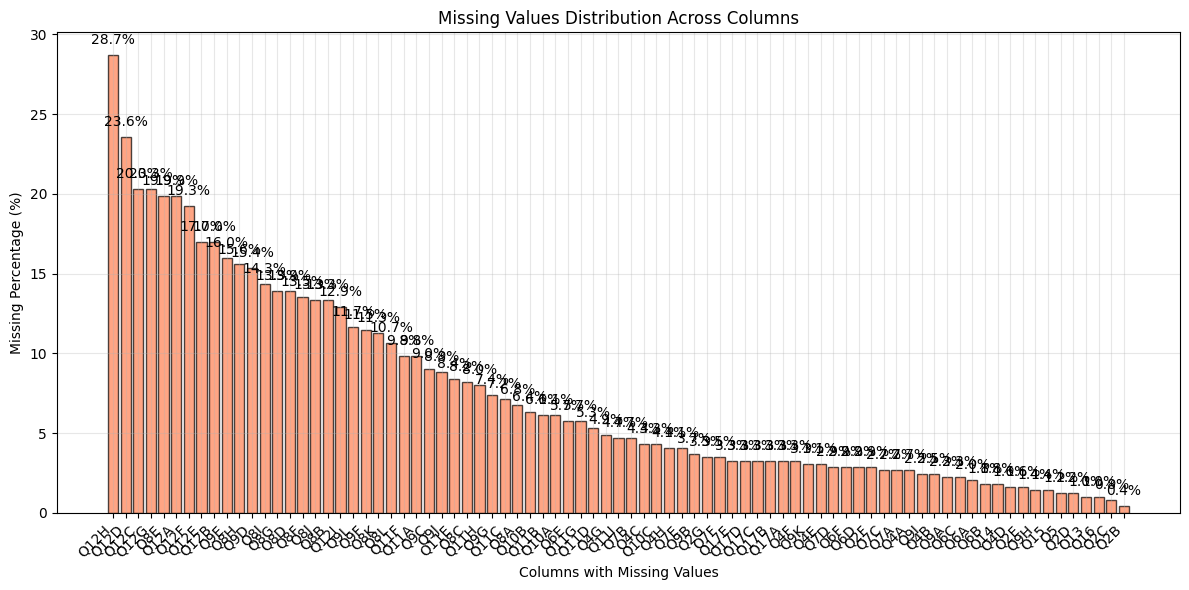

In [22]:
# Comprehensive Missing Values Analysis
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values for all columns
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_stats['Has_Missing'] = missing_stats['Missing_Count'] > 0
missing_stats = missing_stats.sort_values('Missing_Percent', ascending=False)

print(f"Columns with missing values: {missing_stats['Has_Missing'].sum()} out of {len(df.columns)}")
print(f"Total missing values: {missing_stats['Missing_Count'].sum():,}")
print(f"Overall completion rate: {((df.size - missing_stats['Missing_Count'].sum()) / df.size) * 100:.1f}%")

# Display missing values summary
if missing_stats['Missing_Count'].sum() > 0:
    print("\nMissing values by column:")
    missing_cols = missing_stats[missing_stats['Has_Missing']]
    for _, row in missing_cols.iterrows():
        print(f"  {row['Column']:15} : {row['Missing_Count']:4d} ({row['Missing_Percent']:5.1f}%)")
else:
    print("\nNo missing values found in the dataset!")

# Visualize missing values pattern
if missing_stats['Missing_Count'].sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_stats[missing_stats['Has_Missing']]
    plt.bar(range(len(missing_cols)), missing_cols['Missing_Percent'], 
            color='coral', alpha=0.7, edgecolor='black')
    plt.xlabel('Columns with Missing Values')
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Values Distribution Across Columns')
    plt.xticks(range(len(missing_cols)), missing_cols['Column'], rotation=45, ha='right')
    
    # Add percentage labels on bars
    for i, pct in enumerate(missing_cols['Missing_Percent']):
        plt.text(i, pct + 0.5, f'{pct:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values visualization needed - dataset is complete!")

In [23]:
# Define Question Structure and Mapping
print("\n" + "="*60)
print("SURVEY QUESTION STRUCTURE")
print("="*60)

# Define comprehensive question mapping
question_mapping = {
    'Q1': {
        'description': 'Beer Consumption Frequency',
        'scale': 'Ordinal (1-5)',
        'labels': ['Never', 'Rarely (few times/year)', 'Occasionally (few times/month)', 
                  'Regularly (several times/week)', 'Frequently (daily/almost daily)']
    },
    'Q2': {
        'description': 'Beer Type Preferences (A-G)',
        'scale': 'Likert (1-5)', 
        'labels': ['Dislike strongly', 'Dislike', 'Neutral', 'Like', 'Like strongly'],
        'subcategories': ['Q2A', 'Q2B', 'Q2C', 'Q2D', 'Q2E', 'Q2F', 'Q2G']
    },
    'Q3': {
        'description': 'Brand Preferences (Text)',
        'scale': 'Nominal/Text',
        'note': 'Excluded from quantitative analysis'
    },
    'Q4': {
        'description': 'Purchase Channel Preferences (A-H)',
        'scale': 'Likert (1-5)',
        'labels': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
        'subcategories': ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E', 'Q4F', 'Q4G', 'Q4H']
    },
    'Q5': {
        'description': 'Alcohol-free Beer Consumption',
        'scale': 'Ordinal (1-5)',
        'labels': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
    },
    'Q6': {
        'description': 'Beer Involvement/Attitudes (A-F)',
        'scale': 'Likert (1-5)',
        'labels': ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'],
        'subcategories': ['Q6A', 'Q6B', 'Q6C', 'Q6D', 'Q6E', 'Q6F']
    },
    'Q7': {
        'description': 'Health/Environmental Consciousness (A-F)',
        'scale': 'Likert (1-5)',
        'labels': ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'],
        'subcategories': ['Q7A', 'Q7B', 'Q7C', 'Q7D', 'Q7E', 'Q7F']
    },
    'Q8': {
        'description': 'Purchase Decision Factors (A-L)',
        'scale': 'Importance (1-5)',
        'labels': ['Not important', 'Slightly important', 'Moderately important', 
                  'Very important', 'Extremely important'],
        'subcategories': ['Q8A', 'Q8B', 'Q8C', 'Q8D', 'Q8E', 'Q8F', 'Q8G', 'Q8H', 'Q8I', 'Q8J', 'Q8K', 'Q8L']
    }
}

# Display question structure
for q_num, q_info in question_mapping.items():
    print(f"\n{q_num}: {q_info['description']}")
    print(f"   Scale: {q_info['scale']}")
    if 'subcategories' in q_info:
        print(f"   Subcategories: {', '.join(q_info['subcategories'])}")
    if 'note' in q_info:
        print(f"   Note: {q_info['note']}")

# Check which columns are actually present in the dataset
print("\n" + "="*60)
print("COLUMN AVAILABILITY CHECK")
print("="*60)

analysis_columns = []
for q_num, q_info in question_mapping.items():
    if q_num == 'Q3':  # Skip text question
        continue
    elif 'subcategories' in q_info:
        for subcat in q_info['subcategories']:
            if subcat in df.columns:
                analysis_columns.append(subcat)
            else:
                print(f"⚠️  Missing column: {subcat}")
    else:
        if q_num in df.columns:
            analysis_columns.append(q_num)
        else:
            print(f"⚠️  Missing column: {q_num}")

print(f"\nColumns available for analysis: {len(analysis_columns)}")
print(f"Analysis columns: {analysis_columns}")


SURVEY QUESTION STRUCTURE

Q1: Beer Consumption Frequency
   Scale: Ordinal (1-5)

Q2: Beer Type Preferences (A-G)
   Scale: Likert (1-5)
   Subcategories: Q2A, Q2B, Q2C, Q2D, Q2E, Q2F, Q2G

Q3: Brand Preferences (Text)
   Scale: Nominal/Text
   Note: Excluded from quantitative analysis

Q4: Purchase Channel Preferences (A-H)
   Scale: Likert (1-5)
   Subcategories: Q4A, Q4B, Q4C, Q4D, Q4E, Q4F, Q4G, Q4H

Q5: Alcohol-free Beer Consumption
   Scale: Ordinal (1-5)

Q6: Beer Involvement/Attitudes (A-F)
   Scale: Likert (1-5)
   Subcategories: Q6A, Q6B, Q6C, Q6D, Q6E, Q6F

Q7: Health/Environmental Consciousness (A-F)
   Scale: Likert (1-5)
   Subcategories: Q7A, Q7B, Q7C, Q7D, Q7E, Q7F

Q8: Purchase Decision Factors (A-L)
   Scale: Importance (1-5)
   Subcategories: Q8A, Q8B, Q8C, Q8D, Q8E, Q8F, Q8G, Q8H, Q8I, Q8J, Q8K, Q8L

COLUMN AVAILABILITY CHECK

Columns available for analysis: 41
Analysis columns: ['Q1', 'Q2A', 'Q2B', 'Q2C', 'Q2D', 'Q2E', 'Q2F', 'Q2G', 'Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# Enhanced Statistical Analysis Functions
def calculate_advanced_stats(series, confidence_level=0.95):
    """
    Calculate comprehensive descriptive statistics for a series
    """
    clean_series = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_series) == 0:
        return {
            'count': 0, 'mean': np.nan, 'std': np.nan, 'min': np.nan, 'max': np.nan,
            'q25': np.nan, 'median': np.nan, 'q75': np.nan, 'skewness': np.nan,
            'kurtosis': np.nan, 'ci_lower': np.nan, 'ci_upper': np.nan,
            'missing_count': len(series), 'missing_percent': 100.0
        }
    
    # Basic statistics
    count = len(clean_series)
    mean_val = clean_series.mean()
    std_val = clean_series.std()
    min_val = clean_series.min()
    max_val = clean_series.max()
    
    # Quantiles
    q25 = clean_series.quantile(0.25)
    median = clean_series.median()
    q75 = clean_series.quantile(0.75)
    
    # Shape statistics
    skewness = skew(clean_series)
    kurt = kurtosis(clean_series)
    
    # Confidence interval for mean
    alpha = 1 - confidence_level
    ci_lower, ci_upper = stats.t.interval(confidence_level, count-1, 
                                         loc=mean_val, 
                                         scale=stats.sem(clean_series))
    
    # Missing values
    missing_count = len(series) - count
    missing_percent = (missing_count / len(series)) * 100
    
    return {
        'count': count,
        'mean': mean_val,
        'std': std_val,
        'min': min_val,
        'max': max_val,
        'q25': q25,
        'median': median,
        'q75': q75,
        'skewness': skewness,
        'kurtosis': kurt,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }

def create_distribution_plots(series, title, scale_labels=None):
    """
    Create comprehensive distribution plots for a variable
    """
    clean_series = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_series) == 0:
        print(f"No valid data for {title}")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Distribution Analysis: {title}', fontsize=16, fontweight='bold')
    
    # Histogram with KDE
    axes[0,0].hist(clean_series, bins='auto', alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(clean_series.mean(), color='red', linestyle='--', 
                     label=f'Mean: {clean_series.mean():.2f}')
    axes[0,0].axvline(clean_series.median(), color='green', linestyle='--', 
                     label=f'Median: {clean_series.median():.2f}')
    axes[0,0].set_title('Histogram')
    axes[0,0].set_xlabel('Value')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Box plot
    box_plot = axes[0,1].boxplot(clean_series, patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    axes[0,1].set_title('Box Plot')
    axes[0,1].set_ylabel('Value')
    axes[0,1].grid(True, alpha=0.3)
    
    # Q-Q plot
    stats.probplot(clean_series, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot (Normal Distribution)')
    axes[1,0].grid(True, alpha=0.3)
    
    # Value counts bar plot
    value_counts = clean_series.value_counts().sort_index()
    bars = axes[1,1].bar(value_counts.index, value_counts.values, 
                        color='lightcoral', alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Value Counts')
    axes[1,1].set_xlabel('Value')
    axes[1,1].set_ylabel('Count')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add value labels on bars if not too many
    if len(value_counts) <= 15:
        for bar in bars:
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                          f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Load data and define analysis columns
file_path = '../../src/llm/clean_data.csv'
df = pd.read_csv(file_path)

# Define columns for analysis (Q1-Q8, numerical sub-questions, skip Q3)
question_columns = ['Q1']
question_columns.extend([f'Q2{chr(ord("A")+i)}' for i in range(7)]) # Q2A to Q2G
# Q3 is a text question and is skipped here
question_columns.extend([f'Q4{chr(ord("A")+i)}' for i in range(8)]) # Q4A to Q4H
question_columns.append('Q5')
question_columns.extend([f'Q6{chr(ord("A")+i)}' for i in range(6)]) # Q6A to Q6F
question_columns.extend([f'Q7{chr(ord("A")+i)}' for i in range(6)]) # Q7A to Q7F
question_columns.extend([f'Q8{chr(ord("A")+i)}' for i in range(12)]) # Q8A to Q8L

# Create enhanced results DataFrame
results = []

for col in question_columns:
    if col in df.columns:
        # Calculate enhanced statistics
        stats_dict = calculate_advanced_stats(df[col])
        
        # Legacy format for compatibility
        results.append({
            'Column': col,
            'Mean': stats_dict['mean'],
            'Std': stats_dict['std'],
            'Min': stats_dict['min'],
            'Max': stats_dict['max'],
            'Mode': df[col].mode().iloc[0] if not df[col].mode().empty else np.nan,
            'Frequency': int(df[col].value_counts().iloc[0]) if not df[col].value_counts().empty else np.nan
        })

# Display results as DataFrame
df_results = pd.DataFrame(results)
print("\n" + "="*60)
print("BASIC DESCRIPTIVE STATISTICS (Q1-Q8)")
print("="*60)
print(df_results.to_string(index=False))


BASIC DESCRIPTIVE STATISTICS (Q1-Q8)
Column     Mean      Std  Min  Max  Mode  Frequency
    Q1 3.098361 1.032609  1.0  5.0   3.0        216
   Q2A 2.442623 0.570301  1.0  3.0   3.0        235
   Q2B 2.662551 0.515049  1.0  3.0   3.0        332
   Q2C 1.378099 0.564307  1.0  3.0   1.0        321
   Q2D 1.344398 0.571008  1.0  3.0   1.0        340
   Q2E 2.254167 0.691420  1.0  3.0   2.0        220
   Q2F 2.491561 0.603839  1.0  3.0   3.0        260
   Q2G 2.195329 0.723511  1.0  3.0   2.0        207
   Q4A 2.663158 0.539779  1.0  3.0   3.0        331
   Q4B 2.090336 0.752701  1.0  3.0   2.0        203
   Q4C 1.376874 0.581677  1.0  3.0   1.0        315
   Q4D 1.939583 0.676550  1.0  3.0   2.0        259
   Q4E 1.646934 0.679665  1.0  3.0   1.0        222
   Q4F 1.247881 0.513094  1.0  3.0   1.0        373
   Q4G 1.068966 0.293166  1.0  3.0   1.0        437
   Q4H 1.074786 0.328459  1.0  3.0   1.0        442
    Q5 2.076763 1.159037  1.0  5.0   1.0        202
   Q6A 2.941423 1.298572  

Für eine ausführliche EDA (Exploratory Data Analysis) des Bierprojekt-Datensatzes würde ich strukturiert vorgehen. Basierend auf den vorhandenen Dateien und dem Fragebogen sehe ich folgende Schritte:

## 1. Datenüberblick und Grundverständnis
- **Datensatz-Struktur**: Anzahl Beobachtungen, Variablen, Datentypen
- **Fragebogen-Mapping**: Detaillierte Zuordnung der Codes zu den tatsächlichen Fragen
- **Missing Values**: Systematische Analyse der fehlenden Werte (ursprünglich -99)

## 2. Univariate Analyse (bereits teilweise vorhanden)
- **Erweitern der bestehenden deskriptiven Statistiken** um:
  - Schiefe und Kurtosis
  - Quantile (25%, 50%, 75%)
  - Konfidenzintervalle für Mittelwerte
- **Visualisierungen**: Histogramme, Boxplots, Barplots für jede Variable

## 3. Kategorienspezifische Analysen
- **Trinkverhalten** (Q1, Q2A-Q2G): Häufigkeiten und Situationen
- **Einkaufsverhalten** (Q4A-Q4H): Bevorzugte Kanäle
- **Einstellungen zum Bier** (Q6A-Q6F): Involvement-Skala
- **Gesundheits-/Umweltbewusstsein** (Q7A-Q7F): Werte und Prioritäten
- **Kaufentscheidungsfaktoren** (Q8A-Q8L): Wichtigkeit verschiedener Attribute

## 3. Consumer Behavior Patterns Analysis

This section analyzes the key behavioral patterns of beer consumers by examining:
- **Q1**: Consumption frequency patterns
- **Q2A-Q2G**: Beer type preferences and taste profiles
- **Q4A-Q4H**: Purchase channel preferences and shopping behaviors
- **Q5**: Alcohol-free beer consumption patterns

The analysis aims to identify distinct consumer segments and behavioral insights that can inform marketing and product strategies.

## 4. Bivariate Analysen
- **Korrelationsanalysen** zwischen verwandten Fragen
- **Kreuztabellen** für kategoriale Zusammenhänge
- **Gruppenvergleiche**: z.B. häufige vs. seltene Trinker

## 5. Multivariate Analysen
- **Faktorenanalyse**: Identifikation latenter Dimensionen
- **Clusteranalyse**: Konsumentensegmentierung
- **Hauptkomponentenanalyse**: Dimensionsreduktion

## 6. Spezifische Fragestellungen
- **Alkoholfrei vs. alkoholhaltig**: Präferenzen und Treiber (Q5, Q7F)
- **Markenanalyse**: Auswertung der Freitextantworten (Q3)
- **Zielgruppen-Profile**: Demografische Unterschiede falls vorhanden

## Vorgeschlagene Notebook-Struktur:
1. **Data Overview & Quality Check**
2. **Univariate Analysis Extended** 
3. **Consumer Behavior Patterns** (Q1, Q2, Q4)
4. **Attitudes & Involvement** (Q6, Q7)
5. **Purchase Decision Factors** (Q8)
6. **Correlation & Relationship Analysis**
7. **Consumer Segmentation**
8. **Key Insights & Recommendations**

Soll ich mit einem spezifischen Bereich beginnen oder möchtest du, dass ich ein neues umfassendes EDA-Notebook erstelle, das diese Struktur umsetzt?


Q1: BEER CONSUMPTION FREQUENCY ANALYSIS
Valid responses: 488
Missing values: 0 (0.0%)
Mean: 3.10 (95% CI: 3.01-3.19)
Median: 3.00
Standard deviation: 1.03
Range: 1 - 5
Quartiles (Q1/Q3): 2.00 / 4.00
Skewness: 0.32
Kurtosis: -0.40

Frequency Distribution:
  1. Never                              :   19 (  3.9%)
  2. Rarely (few times/year)            :  116 ( 23.8%)
  3. Occasionally (few times/month)     :  216 ( 44.3%)
  4. Regularly (several times/week)     :   72 ( 14.8%)
  5. Frequently (daily/almost daily)    :   65 ( 13.3%)


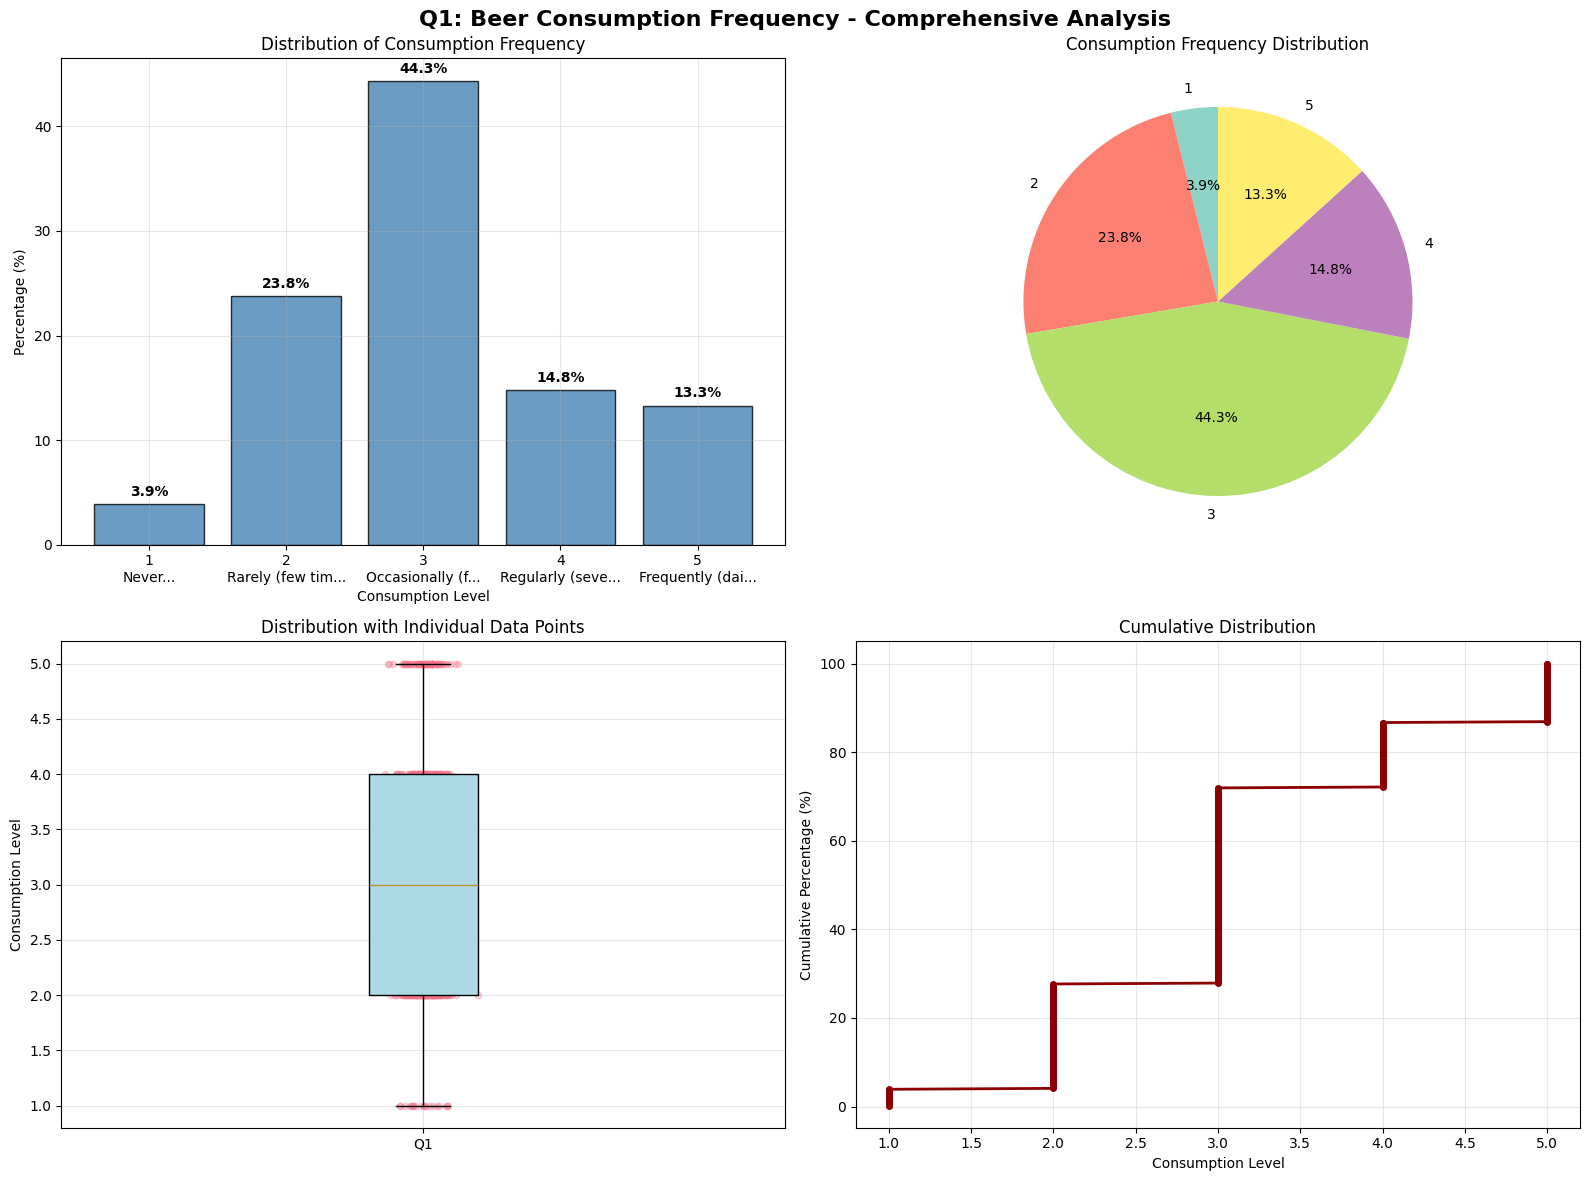


Statistical Interpretation:
  → Moderate to high consumption frequency - regular consumers
  → Relatively symmetric distribution
  → Moderate variability in consumption patterns

Consumer Segments:
  • Non-regular consumers (Never/Rarely): 135 (27.7%)
  • Occasional consumers: 216 (44.3%)
  • Regular/Frequent consumers: 137 (28.1%)


In [25]:
# Q1 Analysis: Beer Consumption Frequency
print("\n" + "="*60)
print("Q1: BEER CONSUMPTION FREQUENCY ANALYSIS")
print("="*60)

scale_labels_q1 = ['Never', 'Rarely (few times/year)', 'Occasionally (few times/month)', 
                   'Regularly (several times/week)', 'Frequently (daily/almost daily)']

if 'Q1' in df.columns:
    # Calculate comprehensive statistics
    q1_stats = calculate_advanced_stats(df['Q1'])
    
    print(f"Valid responses: {q1_stats['count']:,}")
    print(f"Missing values: {q1_stats['missing_count']} ({q1_stats['missing_percent']:.1f}%)")
    print(f"Mean: {q1_stats['mean']:.2f} (95% CI: {q1_stats['ci_lower']:.2f}-{q1_stats['ci_upper']:.2f})")
    print(f"Median: {q1_stats['median']:.2f}")
    print(f"Standard deviation: {q1_stats['std']:.2f}")
    print(f"Range: {q1_stats['min']:.0f} - {q1_stats['max']:.0f}")
    print(f"Quartiles (Q1/Q3): {q1_stats['q25']:.2f} / {q1_stats['q75']:.2f}")
    print(f"Skewness: {q1_stats['skewness']:.2f}")
    print(f"Kurtosis: {q1_stats['kurtosis']:.2f}")
    
    # Value counts and percentages
    q1_clean = pd.to_numeric(df['Q1'], errors='coerce').dropna()
    value_counts = q1_clean.value_counts().sort_index()
    percentages = (value_counts / len(q1_clean) * 100).round(1)
    
    print("\nFrequency Distribution:")
    for val, count in value_counts.items():
        if 1 <= val <= 5:
            label = scale_labels_q1[int(val)-1]
            print(f"  {val}. {label:<35}: {count:4d} ({percentages[val]:5.1f}%)")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Q1: Beer Consumption Frequency - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # Bar chart with percentages
    bars = axes[0,0].bar(value_counts.index, percentages, color='steelblue', alpha=0.8, edgecolor='black')
    axes[0,0].set_title('Distribution of Consumption Frequency')
    axes[0,0].set_xlabel('Consumption Level')
    axes[0,0].set_ylabel('Percentage (%)')
    axes[0,0].set_xticks(range(1, 6))
    axes[0,0].set_xticklabels([f'{i}\n{scale_labels_q1[i-1][:15]}...' for i in range(1, 6)], rotation=0, ha='center')
    
    # Add percentage labels on bars
    for bar, pct in zip(bars, percentages):
        axes[0,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                      f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
    wedges, texts, autotexts = axes[0,1].pie(percentages, labels=[f'{i}' for i in value_counts.index], 
                                            autopct='%1.1f%%', colors=colors, startangle=90)
    axes[0,1].set_title('Consumption Frequency Distribution')
    
    # Box plot with jitter
    axes[1,0].boxplot(q1_clean, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[1,0].scatter(np.random.normal(1, 0.02, len(q1_clean)), q1_clean, alpha=0.3, s=20)
    axes[1,0].set_title('Distribution with Individual Data Points')
    axes[1,0].set_ylabel('Consumption Level')
    axes[1,0].set_xticks([1])
    axes[1,0].set_xticklabels(['Q1'])
    
    # Cumulative distribution
    sorted_values = np.sort(q1_clean)
    cumulative_pct = np.arange(1, len(sorted_values) + 1) / len(sorted_values) * 100
    axes[1,1].plot(sorted_values, cumulative_pct, marker='o', markersize=4, color='darkred', linewidth=2)
    axes[1,1].set_title('Cumulative Distribution')
    axes[1,1].set_xlabel('Consumption Level')
    axes[1,1].set_ylabel('Cumulative Percentage (%)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical interpretation
    print("\nStatistical Interpretation:")
    if q1_stats['mean'] < 2.0:
        print("  → Very low average consumption frequency - mostly non-regular consumers")
    elif q1_stats['mean'] < 3.0:
        print("  → Low to moderate consumption frequency - occasional consumers dominate")
    elif q1_stats['mean'] < 4.0:
        print("  → Moderate to high consumption frequency - regular consumers")
    else:
        print("  → Very high average consumption frequency - frequent consumers")
        
    if q1_stats['skewness'] > 0.5:
        print("  → Right-skewed: Many consume rarely, few consume frequently")
    elif q1_stats['skewness'] < -0.5:
        print("  → Left-skewed: Many consume frequently, few consume rarely")
    else:
        print("  → Relatively symmetric distribution")
        
    if q1_stats['std'] > 1.5:
        print("  → High variability in consumption patterns")
    else:
        print("  → Moderate variability in consumption patterns")
        
    # Consumer segment analysis
    never_rare = ((q1_clean == 1) | (q1_clean == 2)).sum()
    occasional = (q1_clean == 3).sum()
    regular_frequent = ((q1_clean == 4) | (q1_clean == 5)).sum()
    
    print("\nConsumer Segments:")
    print(f"  • Non-regular consumers (Never/Rarely): {never_rare} ({never_rare/len(q1_clean)*100:.1f}%)")
    print(f"  • Occasional consumers: {occasional} ({occasional/len(q1_clean)*100:.1f}%)")
    print(f"  • Regular/Frequent consumers: {regular_frequent} ({regular_frequent/len(q1_clean)*100:.1f}%)")
    
else:
    print("Q1 not found in dataset")


Q2: BEER TYPE PREFERENCES ANALYSIS (Q2A-Q2G)

Q2A - Beer Type A:
  Valid responses: 488
  Missing values: 0 (0.0%)
  Mean: 2.44 (95% CI: 2.39-2.49)
  Median: 2.00
  Std Dev: 0.57
  Interpretation: Low Preference

Q2B - Beer Type B:
  Valid responses: 486
  Missing values: 2 (0.4%)
  Mean: 2.66 (95% CI: 2.62-2.71)
  Median: 3.00
  Std Dev: 0.52
  Interpretation: Moderate Preference

Q2C - Beer Type C:
  Valid responses: 484
  Missing values: 4 (0.8%)
  Mean: 1.38 (95% CI: 1.33-1.43)
  Median: 1.00
  Std Dev: 0.56
  Interpretation: Very Low Preference

Q2D - Beer Type D:
  Valid responses: 482
  Missing values: 6 (1.2%)
  Mean: 1.34 (95% CI: 1.29-1.40)
  Median: 1.00
  Std Dev: 0.57
  Interpretation: Very Low Preference

Q2E - Beer Type E:
  Valid responses: 480
  Missing values: 8 (1.6%)
  Mean: 2.25 (95% CI: 2.19-2.32)
  Median: 2.00
  Std Dev: 0.69
  Interpretation: Low Preference

Q2F - Beer Type F:
  Valid responses: 474
  Missing values: 14 (2.9%)
  Mean: 2.49 (95% CI: 2.44-2.55)


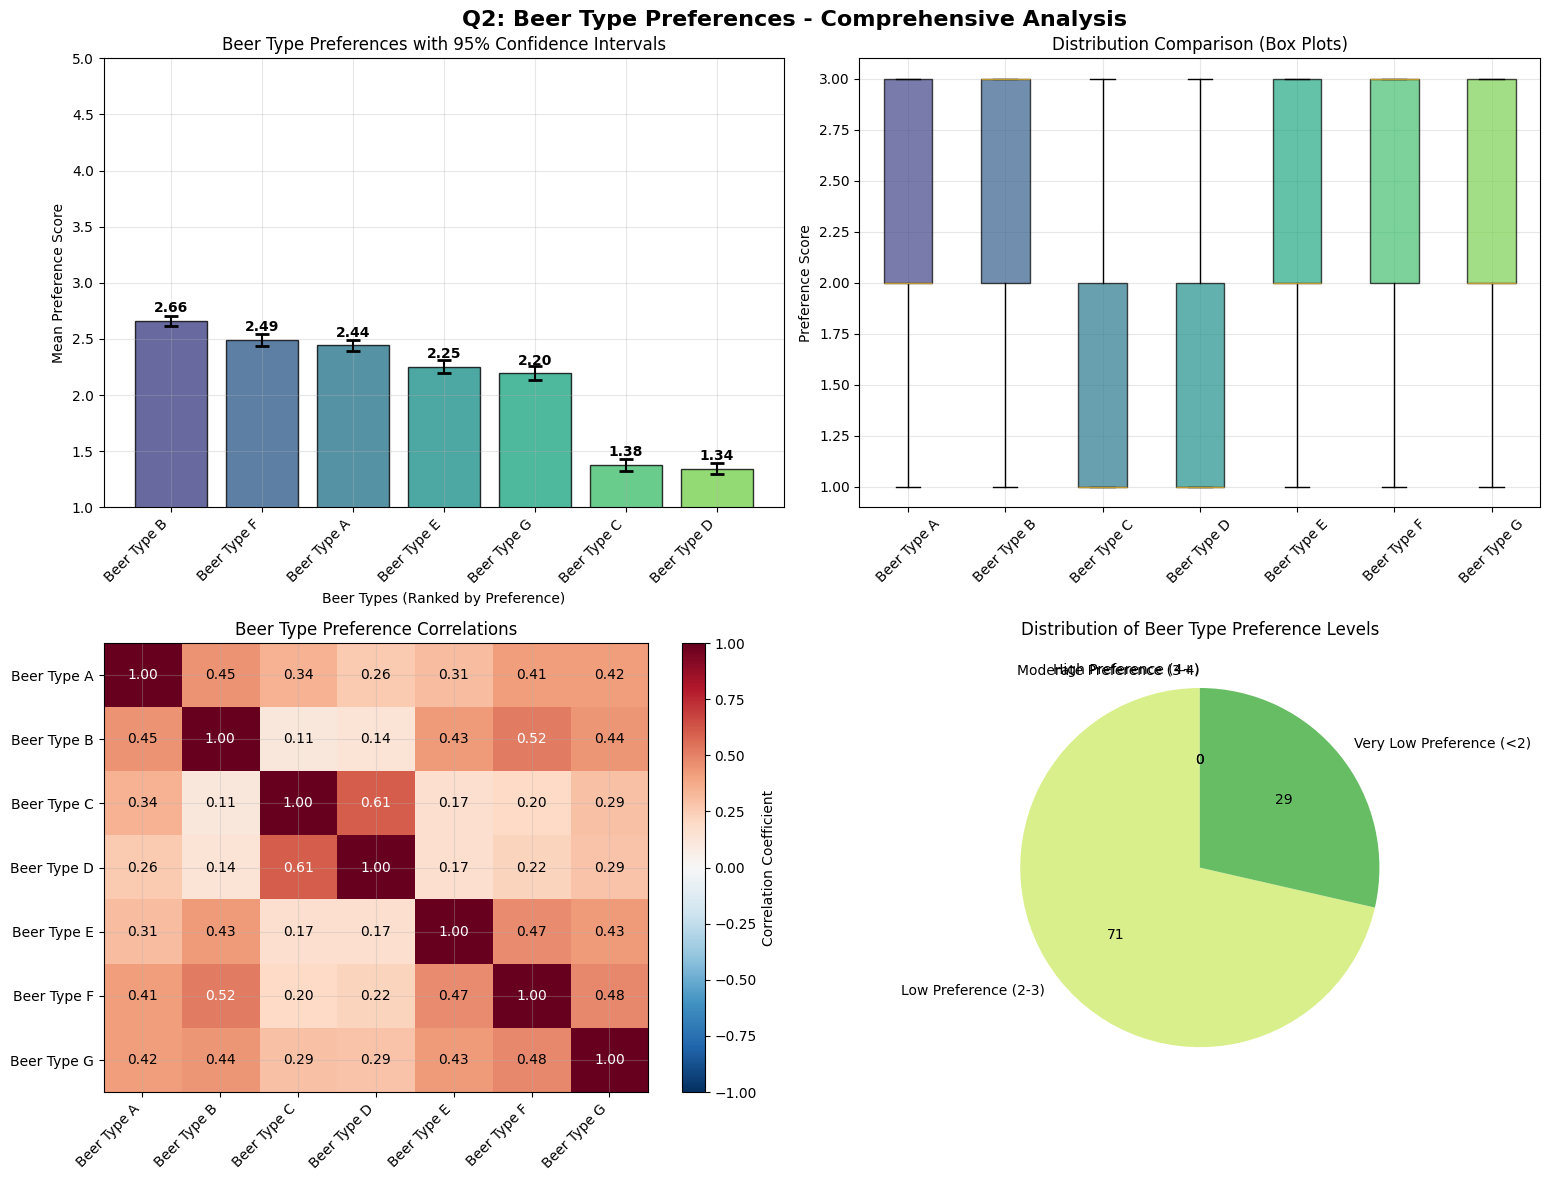


BEER TYPE PREFERENCE INSIGHTS
Most preferred: Beer Type B (Mean: 2.66)
Least preferred: Beer Type D (Mean: 1.34)
Preference range: 1.32 points

Preference diversity (std of means): 0.49
  → Moderate diversity in beer type preferences

Strong correlations between beer types:
  • Beer Type C & Beer Type D: positively correlated (r = 0.608)
  • Beer Type B & Beer Type F: positively correlated (r = 0.522)


In [26]:
# Q2 Analysis: Beer Type Preferences
print("\n" + "="*60)
print("Q2: BEER TYPE PREFERENCES ANALYSIS (Q2A-Q2G)")
print("="*60)

# Define Q2 columns and their meanings
q2_columns = [f'Q2{chr(ord("A")+i)}' for i in range(7)]
q2_labels = {
    'Q2A': 'Beer Type A',
    'Q2B': 'Beer Type B', 
    'Q2C': 'Beer Type C',
    'Q2D': 'Beer Type D',
    'Q2E': 'Beer Type E',
    'Q2F': 'Beer Type F',
    'Q2G': 'Beer Type G'
}

scale_labels_q2 = ['Dislike strongly', 'Dislike', 'Neutral', 'Like', 'Like strongly']

# Calculate comprehensive statistics for each Q2 variable
q2_stats = {}
q2_means = {}
q2_valid_cols = []

for col in q2_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q2_stats[col] = stats_dict
        q2_means[col] = stats_dict['mean']
        q2_valid_cols.append(col)
        
        print(f"\n{col} - {q2_labels[col]}:")
        print(f"  Valid responses: {stats_dict['count']}")
        print(f"  Missing values: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mean: {stats_dict['mean']:.2f} (95% CI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Std Dev: {stats_dict['std']:.2f}")
        
        # Interpretation of preference
        if stats_dict['mean'] > 4.0:
            preference = "Very High Preference"
        elif stats_dict['mean'] > 3.5:
            preference = "High Preference"
        elif stats_dict['mean'] > 2.5:
            preference = "Moderate Preference"
        elif stats_dict['mean'] > 2.0:
            preference = "Low Preference"
        else:
            preference = "Very Low Preference"
        print(f"  Interpretation: {preference}")
    else:
        print(f"⚠️ {col} not found in dataset")

if q2_valid_cols:
    # Create ranking of beer types by preference
    q2_ranking = sorted(q2_means.items(), key=lambda x: x[1], reverse=True)
    
    print("\n" + "="*40)
    print("BEER TYPE PREFERENCE RANKING")
    print("="*40)
    for i, (col, mean_val) in enumerate(q2_ranking, 1):
        ci_lower = q2_stats[col]['ci_lower']
        ci_upper = q2_stats[col]['ci_upper']
        print(f"{i:2d}. {q2_labels[col]:<15} : {mean_val:.2f} (95% CI: {ci_lower:.2f}-{ci_upper:.2f})")
    
    # Comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Q2: Beer Type Preferences - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # Bar chart with confidence intervals
    types = [col for col, _ in q2_ranking]
    means = [mean for _, mean in q2_ranking]
    ci_lower = [q2_stats[col]['ci_lower'] for col in types]
    ci_upper = [q2_stats[col]['ci_upper'] for col in types]
    errors = [[mean - lower for mean, lower in zip(means, ci_lower)],
              [upper - mean for mean, upper in zip(means, ci_upper)]]
    
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(types)))
    bars = axes[0,0].bar(range(len(types)), means, color=colors, alpha=0.8, 
                        edgecolor='black', capsize=5)
    axes[0,0].errorbar(range(len(types)), means, yerr=errors, fmt='none', 
                      color='black', capsize=5, capthick=2)
    axes[0,0].set_xlabel('Beer Types (Ranked by Preference)')
    axes[0,0].set_ylabel('Mean Preference Score')
    axes[0,0].set_title('Beer Type Preferences with 95% Confidence Intervals')
    axes[0,0].set_xticks(range(len(types)))
    axes[0,0].set_xticklabels([q2_labels[t] for t in types], rotation=45, ha='right')
    axes[0,0].set_ylim(1, 5)
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, mean_val in zip(bars, means):
        axes[0,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                      f'{mean_val:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # Box plots comparison
    q2_data = [pd.to_numeric(df[col], errors='coerce').dropna() for col in q2_valid_cols]
    box_plot = axes[0,1].boxplot(q2_data, patch_artist=True, 
                                labels=[q2_labels[col] for col in q2_valid_cols])
    
    # Color the boxes
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[0,1].set_title('Distribution Comparison (Box Plots)')
    axes[0,1].set_ylabel('Preference Score')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(True, alpha=0.3)
    
    # Correlation heatmap between beer types
    q2_df = df[q2_valid_cols].apply(pd.to_numeric, errors='coerce')
    correlation_matrix = q2_df.corr()
    
    im = axes[1,0].imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[1,0].set_title('Beer Type Preference Correlations')
    axes[1,0].set_xticks(range(len(q2_valid_cols)))
    axes[1,0].set_yticks(range(len(q2_valid_cols)))
    axes[1,0].set_xticklabels([q2_labels[col] for col in q2_valid_cols], rotation=45, ha='right')
    axes[1,0].set_yticklabels([q2_labels[col] for col in q2_valid_cols])
    
    # Add correlation values to heatmap
    for i in range(len(q2_valid_cols)):
        for j in range(len(q2_valid_cols)):
            text = axes[1,0].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                                 ha="center", va="center", color="black" if abs(correlation_matrix.iloc[i, j]) < 0.5 else "white")
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[1,0])
    cbar.set_label('Correlation Coefficient')
    
    # Preference distribution summary
    preference_categories = {
        'High Preference (4+)': sum(1 for mean in q2_means.values() if mean >= 4.0),
        'Moderate Preference (3-4)': sum(1 for mean in q2_means.values() if 3.0 <= mean < 4.0),
        'Low Preference (2-3)': sum(1 for mean in q2_means.values() if 2.0 <= mean < 3.0),
        'Very Low Preference (<2)': sum(1 for mean in q2_means.values() if mean < 2.0)
    }
    
    categories = list(preference_categories.keys())
    counts = list(preference_categories.values())
    colors_pie = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(categories)))
    
    wedges, texts, autotexts = axes[1,1].pie(counts, labels=categories, autopct='%1.0f',
                                            colors=colors_pie, startangle=90)
    axes[1,1].set_title('Distribution of Beer Type Preference Levels')
    
    plt.tight_layout()
    plt.show()
    
    # Advanced insights
    print("\n" + "="*40)
    print("BEER TYPE PREFERENCE INSIGHTS")
    print("="*40)
    
    # Most and least preferred
    most_preferred = max(q2_means, key=q2_means.get)
    least_preferred = min(q2_means, key=q2_means.get)
    
    print(f"Most preferred: {q2_labels[most_preferred]} (Mean: {q2_means[most_preferred]:.2f})")
    print(f"Least preferred: {q2_labels[least_preferred]} (Mean: {q2_means[least_preferred]:.2f})")
    print(f"Preference range: {max(q2_means.values()) - min(q2_means.values()):.2f} points")
    
    # Preference consistency
    overall_std = np.std(list(q2_means.values()))
    print(f"\nPreference diversity (std of means): {overall_std:.2f}")
    if overall_std > 0.5:
        print("  → High diversity in beer type preferences")
    elif overall_std > 0.3:
        print("  → Moderate diversity in beer type preferences")
    else:
        print("  → Low diversity - similar preferences across types")
    
    # Correlation insights
    high_correlations = []
    for i, col1 in enumerate(q2_valid_cols):
        for j, col2 in enumerate(q2_valid_cols[i+1:], i+1):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.5:
                high_correlations.append((col1, col2, corr))
    
    if high_correlations:
        print("\nStrong correlations between beer types:")
        for col1, col2, corr in sorted(high_correlations, key=lambda x: abs(x[2]), reverse=True):
            relationship = "positively" if corr > 0 else "negatively"
            print(f"  • {q2_labels[col1]} & {q2_labels[col2]}: {relationship} correlated (r = {corr:.3f})")
    else:
        print("\nNo strong correlations found between beer types")
        
else:
    print("No Q2 data found in dataset")


Q4: PURCHASE CHANNEL PREFERENCES ANALYSIS (Q4A-Q4H)

Q4A - Supermarket/Grocery Store:
  Valid responses: 475
  Missing values: 13 (2.7%)
  Mean: 2.66 (95% CI: 2.61-2.71)
  Median: 3.00
  Std Dev: 0.54
  Usage Level: Moderate Usage

Q4B - Convenience Store:
  Valid responses: 476
  Missing values: 12 (2.5%)
  Mean: 2.09 (95% CI: 2.02-2.16)
  Median: 2.00
  Std Dev: 0.75
  Usage Level: Low Usage

Q4C - Specialty Beer Store:
  Valid responses: 467
  Missing values: 21 (4.3%)
  Mean: 1.38 (95% CI: 1.32-1.43)
  Median: 1.00
  Std Dev: 0.58
  Usage Level: Very Low Usage

Q4D - Online Store:
  Valid responses: 480
  Missing values: 8 (1.6%)
  Mean: 1.94 (95% CI: 1.88-2.00)
  Median: 2.00
  Std Dev: 0.68
  Usage Level: Very Low Usage

Q4E - Restaurant/Bar:
  Valid responses: 473
  Missing values: 15 (3.1%)
  Mean: 1.65 (95% CI: 1.59-1.71)
  Median: 2.00
  Std Dev: 0.68
  Usage Level: Very Low Usage

Q4F - Gas Station:
  Valid responses: 472
  Missing values: 16 (3.3%)
  Mean: 1.25 (95% CI: 1.

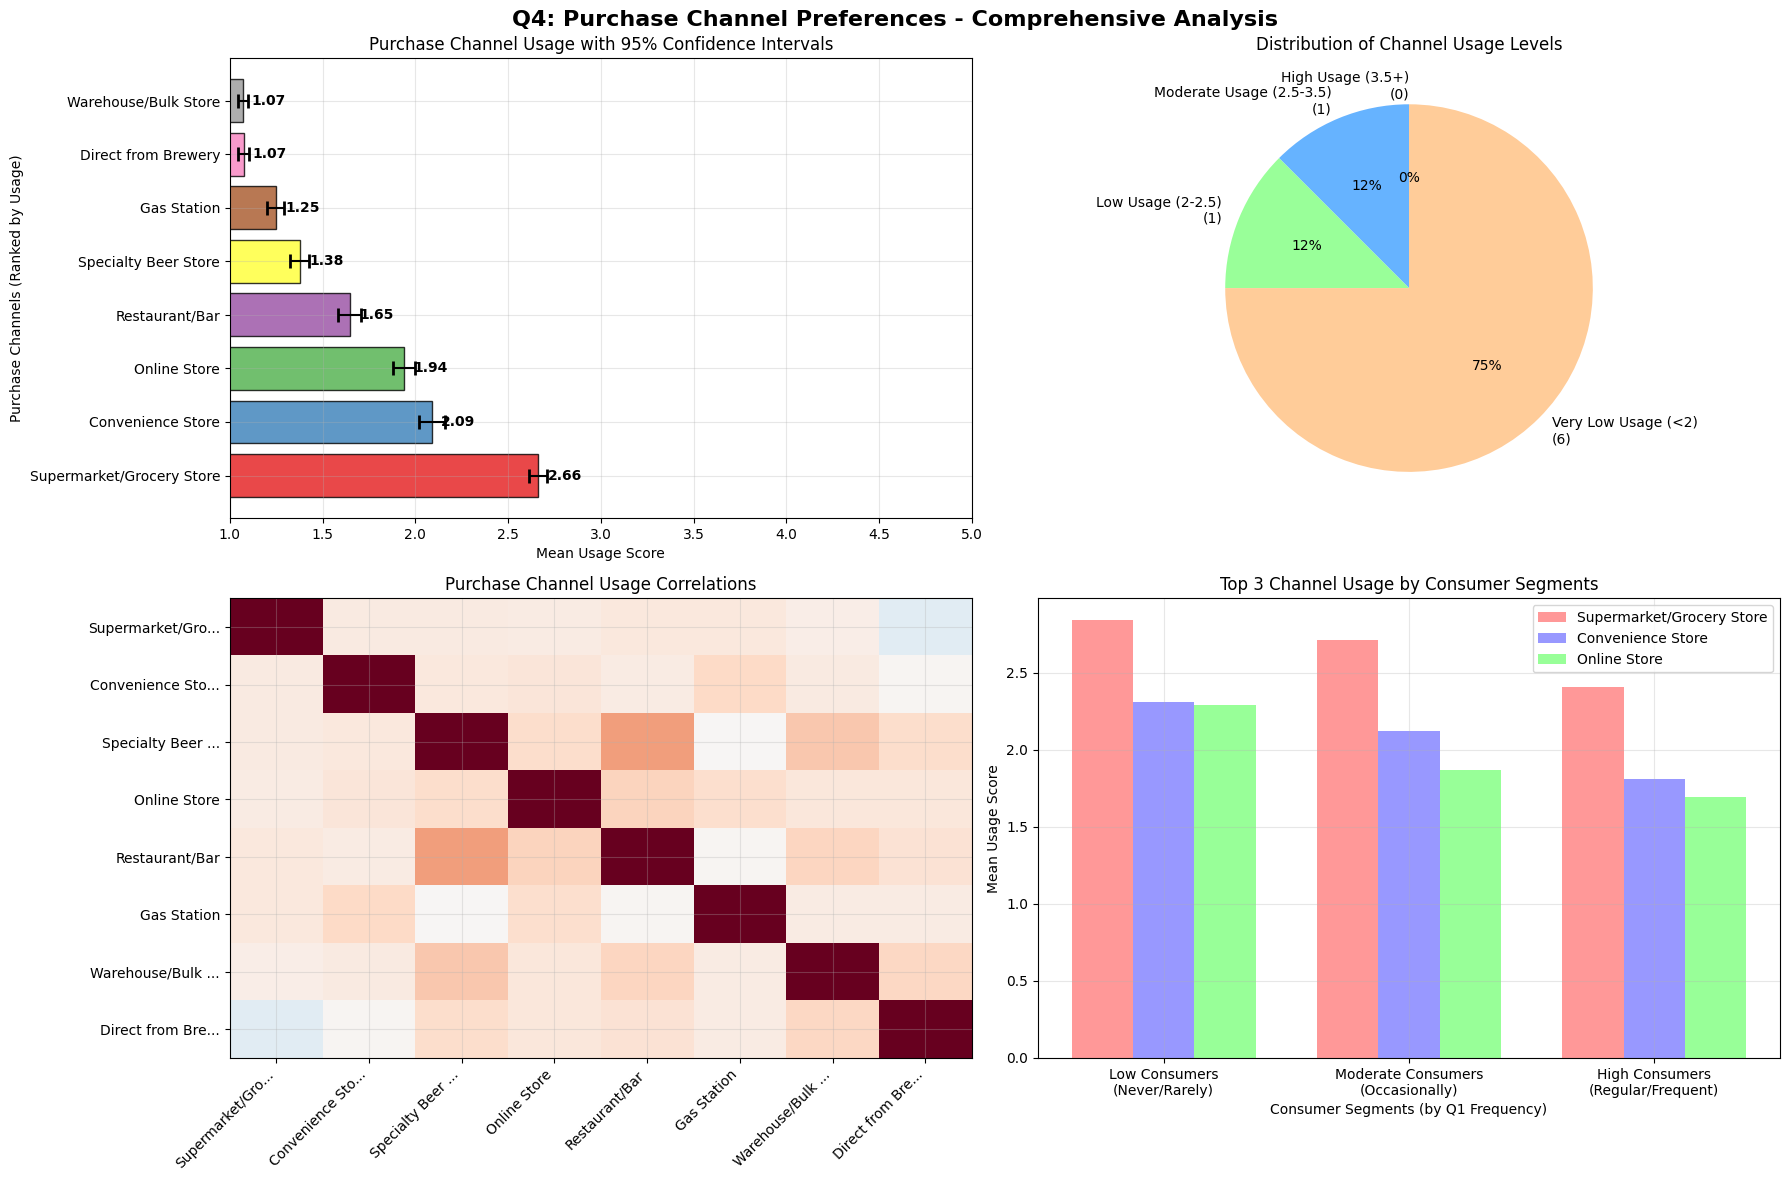


PURCHASE CHANNEL INSIGHTS
Primary channels (high usage): 0

Secondary channels (moderate usage): 1
  • Supermarket/Grocery Store (Mean: 2.66)

Under-utilized channels: 7
  • Convenience Store (Mean: 2.09)
  • Specialty Beer Store (Mean: 1.38)
  • Online Store (Mean: 1.94)
  • Restaurant/Bar (Mean: 1.65)
  • Gas Station (Mean: 1.25)
  • Warehouse/Bulk Store (Mean: 1.07)
  • Direct from Brewery (Mean: 1.07)

Channel usage diversity (std of means): 0.53
  → Moderate diversity in channel usage


In [27]:
# Q4 Analysis: Purchase Channel Preferences
print("\n" + "="*60)
print("Q4: PURCHASE CHANNEL PREFERENCES ANALYSIS (Q4A-Q4H)")
print("="*60)

# Define Q4 columns and their meanings
q4_columns = [f'Q4{chr(ord("A")+i)}' for i in range(8)]
q4_labels = {
    'Q4A': 'Supermarket/Grocery Store',
    'Q4B': 'Convenience Store',
    'Q4C': 'Specialty Beer Store',
    'Q4D': 'Online Store',
    'Q4E': 'Restaurant/Bar',
    'Q4F': 'Gas Station',
    'Q4G': 'Warehouse/Bulk Store',
    'Q4H': 'Direct from Brewery'
}

scale_labels_q4 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

# Calculate comprehensive statistics for each Q4 variable
q4_stats = {}
q4_means = {}
q4_valid_cols = []

for col in q4_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q4_stats[col] = stats_dict
        q4_means[col] = stats_dict['mean']
        q4_valid_cols.append(col)
        
        print(f"\n{col} - {q4_labels[col]}:")
        print(f"  Valid responses: {stats_dict['count']}")
        print(f"  Missing values: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mean: {stats_dict['mean']:.2f} (95% CI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Std Dev: {stats_dict['std']:.2f}")
        
        # Usage level interpretation
        if stats_dict['mean'] > 4.0:
            usage = "Very High Usage"
        elif stats_dict['mean'] > 3.5:
            usage = "High Usage"
        elif stats_dict['mean'] > 2.5:
            usage = "Moderate Usage"
        elif stats_dict['mean'] > 2.0:
            usage = "Low Usage"
        else:
            usage = "Very Low Usage"
        print(f"  Usage Level: {usage}")
    else:
        print(f"⚠️ {col} not found in dataset")

if q4_valid_cols:
    # Create ranking of purchase channels by usage
    q4_ranking = sorted(q4_means.items(), key=lambda x: x[1], reverse=True)
    
    print("\n" + "="*50)
    print("PURCHASE CHANNEL USAGE RANKING")
    print("="*50)
    for i, (col, mean_val) in enumerate(q4_ranking, 1):
        ci_lower = q4_stats[col]['ci_lower']
        ci_upper = q4_stats[col]['ci_upper']
        print(f"{i:2d}. {q4_labels[col]:<25} : {mean_val:.2f} (95% CI: {ci_lower:.2f}-{ci_upper:.2f})")
    
    # Comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Q4: Purchase Channel Preferences - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # Horizontal bar chart for better readability of channel names
    channels = [col for col, _ in q4_ranking]
    means = [mean for _, mean in q4_ranking]
    ci_lower = [q4_stats[col]['ci_lower'] for col in channels]
    ci_upper = [q4_stats[col]['ci_upper'] for col in channels]
    errors = [[mean - lower for mean, lower in zip(means, ci_lower)],
              [upper - mean for mean, upper in zip(means, ci_upper)]]
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(channels)))
    bars = axes[0,0].barh(range(len(channels)), means, color=colors, alpha=0.8, 
                         edgecolor='black', capsize=5)
    axes[0,0].errorbar(means, range(len(channels)), xerr=errors, fmt='none', 
                      color='black', capsize=5, capthick=2)
    axes[0,0].set_ylabel('Purchase Channels (Ranked by Usage)')
    axes[0,0].set_xlabel('Mean Usage Score')
    axes[0,0].set_title('Purchase Channel Usage with 95% Confidence Intervals')
    axes[0,0].set_yticks(range(len(channels)))
    axes[0,0].set_yticklabels([q4_labels[c] for c in channels])
    axes[0,0].set_xlim(1, 5)
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, mean_val) in enumerate(zip(bars, means)):
        axes[0,0].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2.,
                      f'{mean_val:.2f}', ha='left', va='center', fontweight='bold')
    
    # Channel usage categories
    usage_categories = {'High Usage (3.5+)': [], 'Moderate Usage (2.5-3.5)': [], 
                       'Low Usage (2-2.5)': [], 'Very Low Usage (<2)': []}
    
    for col, mean_val in q4_means.items():
        if mean_val >= 3.5:
            usage_categories['High Usage (3.5+)'].append(q4_labels[col])
        elif mean_val >= 2.5:
            usage_categories['Moderate Usage (2.5-3.5)'].append(q4_labels[col])
        elif mean_val >= 2.0:
            usage_categories['Low Usage (2-2.5)'].append(q4_labels[col])
        else:
            usage_categories['Very Low Usage (<2)'].append(q4_labels[col])
    
    # Pie chart of usage distribution
    category_counts = [len(channels) for channels in usage_categories.values()]
    category_labels = [f"{cat}\n({count})" for cat, count in zip(usage_categories.keys(), category_counts)]
    colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    wedges, texts, autotexts = axes[0,1].pie(category_counts, labels=category_labels, 
                                            autopct='%1.0f%%', colors=colors_pie, startangle=90)
    axes[0,1].set_title('Distribution of Channel Usage Levels')
    
    # Usage pattern heatmap
    q4_df = df[q4_valid_cols].apply(pd.to_numeric, errors='coerce')
    correlation_matrix = q4_df.corr()
    
    im = axes[1,0].imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[1,0].set_title('Purchase Channel Usage Correlations')
    axes[1,0].set_xticks(range(len(q4_valid_cols)))
    axes[1,0].set_yticks(range(len(q4_valid_cols)))
    axes[1,0].set_xticklabels([q4_labels[col][:15] + '...' if len(q4_labels[col]) > 15 else q4_labels[col] 
                              for col in q4_valid_cols], rotation=45, ha='right')
    axes[1,0].set_yticklabels([q4_labels[col][:15] + '...' if len(q4_labels[col]) > 15 else q4_labels[col] 
                              for col in q4_valid_cols])
    
    # Channel usage by consumer segments (based on Q1 if available)
    if 'Q1' in df.columns:
        q1_clean = pd.to_numeric(df['Q1'], errors='coerce')
        # Define segments: Low (1-2), Moderate (3), High (4-5)
        low_consumers = df[q1_clean <= 2]
        moderate_consumers = df[q1_clean == 3]
        high_consumers = df[q1_clean >= 4]
        
        segment_means = []
        segments = ['Low Consumers\n(Never/Rarely)', 'Moderate Consumers\n(Occasionally)', 
                   'High Consumers\n(Regular/Frequent)']
        segment_data = [low_consumers, moderate_consumers, high_consumers]
        
        top_3_channels = [col for col, _ in q4_ranking[:3]]
        
        for i, segment_df in enumerate(segment_data):
            if len(segment_df) > 0:
                segment_channel_means = []
                for channel in top_3_channels:
                    if channel in segment_df.columns:
                        mean_val = pd.to_numeric(segment_df[channel], errors='coerce').mean()
                        segment_channel_means.append(mean_val if not np.isnan(mean_val) else 0)
                    else:
                        segment_channel_means.append(0)
                segment_means.append(segment_channel_means)
            else:
                segment_means.append([0, 0, 0])
        
        # Grouped bar chart
        x = np.arange(len(segments))
        width = 0.25
        channel_colors = ['#ff7f7f', '#7f7fff', '#7fff7f']
        
        for i, channel in enumerate(top_3_channels):
            channel_means = [segment_means[j][i] for j in range(len(segments))]
            axes[1,1].bar(x + i*width, channel_means, width, 
                         label=q4_labels[channel], color=channel_colors[i], alpha=0.8)
        
        axes[1,1].set_xlabel('Consumer Segments (by Q1 Frequency)')
        axes[1,1].set_ylabel('Mean Usage Score')
        axes[1,1].set_title('Top 3 Channel Usage by Consumer Segments')
        axes[1,1].set_xticks(x + width)
        axes[1,1].set_xticklabels(segments)
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
    else:
        axes[1,1].text(0.5, 0.5, 'Q1 data not available\nfor segment analysis', 
                      ha='center', va='center', transform=axes[1,1].transAxes, fontsize=14)
        axes[1,1].set_title('Consumer Segment Analysis')
    
    plt.tight_layout()
    plt.show()
    
    # Channel insights
    print("\n" + "="*50)
    print("PURCHASE CHANNEL INSIGHTS")
    print("="*50)
    
    # Primary channels
    primary_channels = [col for col, mean in q4_means.items() if mean >= 3.5]
    secondary_channels = [col for col, mean in q4_means.items() if 2.5 <= mean < 3.5]
    underused_channels = [col for col, mean in q4_means.items() if mean < 2.5]
    
    print(f"Primary channels (high usage): {len(primary_channels)}")
    for col in primary_channels:
        print(f"  • {q4_labels[col]} (Mean: {q4_means[col]:.2f})")
    
    print(f"\nSecondary channels (moderate usage): {len(secondary_channels)}")
    for col in secondary_channels:
        print(f"  • {q4_labels[col]} (Mean: {q4_means[col]:.2f})")
    
    print(f"\nUnder-utilized channels: {len(underused_channels)}")
    for col in underused_channels:
        print(f"  • {q4_labels[col]} (Mean: {q4_means[col]:.2f})")
    
    # Channel diversity
    channel_diversity = np.std(list(q4_means.values()))
    print(f"\nChannel usage diversity (std of means): {channel_diversity:.2f}")
    if channel_diversity > 0.8:
        print("  → High diversity - consumers use different channels")
    elif channel_diversity > 0.5:
        print("  → Moderate diversity in channel usage")
    else:
        print("  → Low diversity - similar usage across channels")
        
else:
    print("No Q4 data found in dataset")


Q5: ALCOHOL-FREE BEER CONSUMPTION ANALYSIS
Valid responses: 482
Missing values: 6 (1.2%)
Mean: 2.08 (95% CI: 1.97-2.18)
Median: 2.00
Standard deviation: 1.16
Range: 1 - 5
Skewness: 0.82
Kurtosis: -0.35

Alcohol-free Beer Consumption Distribution:
  1.0. Never               :  202 ( 41.9%)
  2.0. Rarely              :  128 ( 26.6%)
  3.0. Sometimes           :   82 ( 17.0%)
  4.0. Often               :   53 ( 11.0%)
  5.0. Always              :   17 (  3.5%)

Comparison with Regular Beer Consumption (Q1):
Regular beer mean: 3.09
Alcohol-free beer mean: 2.08
Difference: 1.02
Wilcoxon signed-rank test p-value: 0.0000
  → Statistically significant difference between regular and alcohol-free consumption


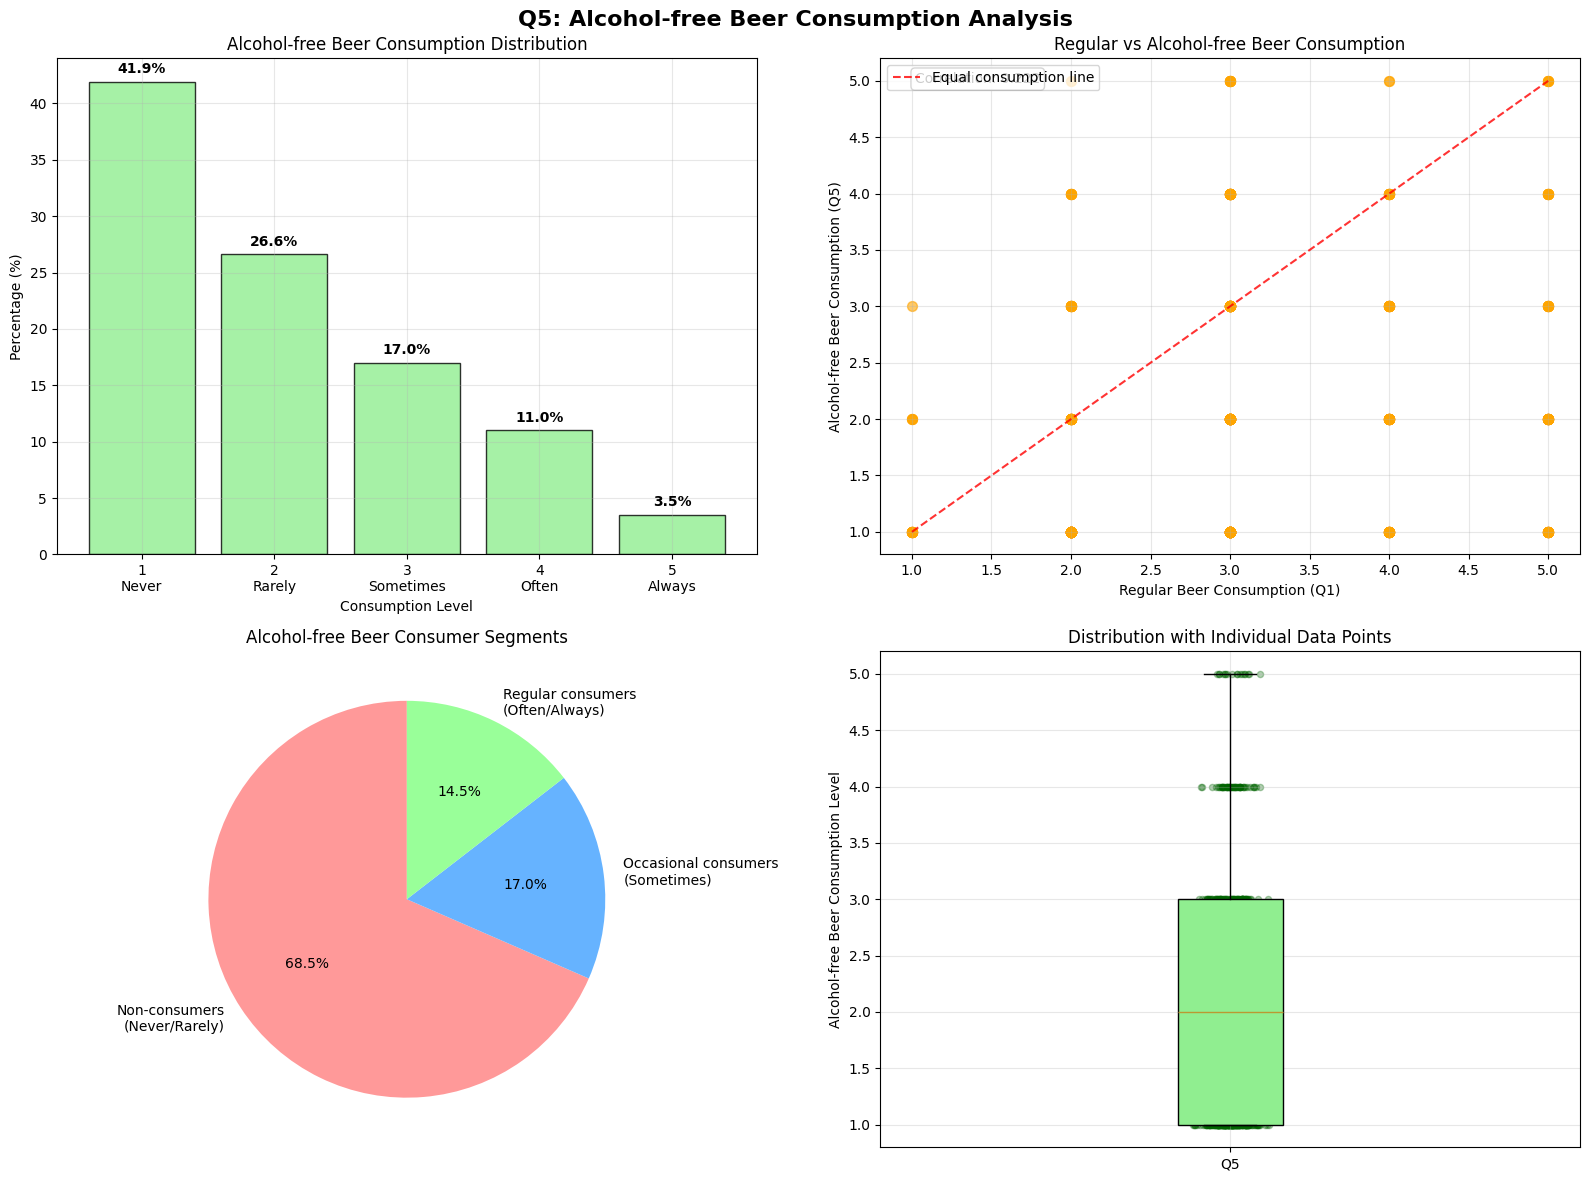


ALCOHOL-FREE BEER INSIGHTS
Market penetration (sometimes or more): 152 consumers (31.5%)
Non-consumers (never/rarely): 330 (68.5%)
Regular consumers (often/always): 70 (14.5%)

→ Low alcohol-free beer consumption overall
→ Right-skewed: More people consume alcohol-free beer rarely

CONSUMER BEHAVIOR PATTERNS SUMMARY
This completes the Consumer Behavior Patterns analysis covering:
• Q1: Beer consumption frequency patterns
• Q2: Beer type preferences and taste profiles
• Q4: Purchase channel preferences and shopping behaviors
• Q5: Alcohol-free beer consumption patterns

Next: Attitudes & Involvement Analysis (Q6, Q7)


In [28]:
# Q5 Analysis: Alcohol-free Beer Consumption
print("\n" + "="*60)
print("Q5: ALCOHOL-FREE BEER CONSUMPTION ANALYSIS")
print("="*60)

scale_labels_q5 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

if 'Q5' in df.columns:
    # Calculate comprehensive statistics
    q5_stats = calculate_advanced_stats(df['Q5'])
    
    print(f"Valid responses: {q5_stats['count']:,}")
    print(f"Missing values: {q5_stats['missing_count']} ({q5_stats['missing_percent']:.1f}%)")
    print(f"Mean: {q5_stats['mean']:.2f} (95% CI: {q5_stats['ci_lower']:.2f}-{q5_stats['ci_upper']:.2f})")
    print(f"Median: {q5_stats['median']:.2f}")
    print(f"Standard deviation: {q5_stats['std']:.2f}")
    print(f"Range: {q5_stats['min']:.0f} - {q5_stats['max']:.0f}")
    print(f"Skewness: {q5_stats['skewness']:.2f}")
    print(f"Kurtosis: {q5_stats['kurtosis']:.2f}")
    
    # Value counts and percentages
    q5_clean = pd.to_numeric(df['Q5'], errors='coerce').dropna()
    value_counts = q5_clean.value_counts().sort_index()
    percentages = (value_counts / len(q5_clean) * 100).round(1)
    
    print("\nAlcohol-free Beer Consumption Distribution:")
    for val, count in value_counts.items():
        if 1 <= val <= 5:
            label = scale_labels_q5[int(val)-1]
            print(f"  {val}. {label:<20}: {count:4d} ({percentages[val]:5.1f}%)")
    
    # Comparison with regular beer consumption (Q1)
    if 'Q1' in df.columns:
        q1_clean = pd.to_numeric(df['Q1'], errors='coerce')
        
        # Create comparison DataFrame
        comparison_df = pd.DataFrame({
            'Regular_Beer': q1_clean,
            'Alcohol_Free': q5_clean
        }).dropna()
        
        if len(comparison_df) > 0:
            print(f"\nComparison with Regular Beer Consumption (Q1):")
            print(f"Regular beer mean: {comparison_df['Regular_Beer'].mean():.2f}")
            print(f"Alcohol-free beer mean: {comparison_df['Alcohol_Free'].mean():.2f}")
            print(f"Difference: {comparison_df['Regular_Beer'].mean() - comparison_df['Alcohol_Free'].mean():.2f}")
            
            # Statistical test
            from scipy.stats import wilcoxon
            try:
                stat, p_value = wilcoxon(comparison_df['Regular_Beer'], comparison_df['Alcohol_Free'])
                print(f"Wilcoxon signed-rank test p-value: {p_value:.4f}")
                if p_value < 0.05:
                    print("  → Statistically significant difference between regular and alcohol-free consumption")
                else:
                    print("  → No statistically significant difference")
            except ValueError as e:
                print(f"  → Statistical test not possible: {e}")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Q5: Alcohol-free Beer Consumption Analysis', fontsize=16, fontweight='bold')
    
    # Distribution bar chart
    bars = axes[0,0].bar(value_counts.index, percentages, color='lightgreen', alpha=0.8, edgecolor='black')
    axes[0,0].set_title('Alcohol-free Beer Consumption Distribution')
    axes[0,0].set_xlabel('Consumption Level')
    axes[0,0].set_ylabel('Percentage (%)')
    axes[0,0].set_xticks(range(1, 6))
    axes[0,0].set_xticklabels([f'{i}\n{scale_labels_q5[i-1]}' for i in range(1, 6)], rotation=0, ha='center')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add percentage labels
    for bar, pct in zip(bars, percentages):
        axes[0,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                      f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Comparison with Q1 (if available)
    if 'Q1' in df.columns and len(comparison_df) > 0:
        # Scatter plot
        axes[0,1].scatter(comparison_df['Regular_Beer'], comparison_df['Alcohol_Free'], 
                         alpha=0.6, color='orange', s=50)
        axes[0,1].plot([1, 5], [1, 5], 'r--', alpha=0.8, label='Equal consumption line')
        axes[0,1].set_xlabel('Regular Beer Consumption (Q1)')
        axes[0,1].set_ylabel('Alcohol-free Beer Consumption (Q5)')
        axes[0,1].set_title('Regular vs Alcohol-free Beer Consumption')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # Calculate correlation
        correlation = comparison_df['Regular_Beer'].corr(comparison_df['Alcohol_Free'])
        axes[0,1].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                      transform=axes[0,1].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    else:
        axes[0,1].text(0.5, 0.5, 'Q1 data not available\nfor comparison', 
                      ha='center', va='center', transform=axes[0,1].transAxes, fontsize=14)
        axes[0,1].set_title('Regular vs Alcohol-free Comparison')
    
    # Consumer segments for alcohol-free beer
    never_rare_af = ((q5_clean == 1) | (q5_clean == 2)).sum()
    sometimes_af = (q5_clean == 3).sum()
    often_always_af = ((q5_clean == 4) | (q5_clean == 5)).sum()
    
    segments = ['Non-consumers\n(Never/Rarely)', 'Occasional consumers\n(Sometimes)', 
               'Regular consumers\n(Often/Always)']
    segment_counts = [never_rare_af, sometimes_af, often_always_af]
    segment_colors = ['#ff9999', '#66b3ff', '#99ff99']
    
    wedges, texts, autotexts = axes[1,0].pie(segment_counts, labels=segments, autopct='%1.1f%%',
                                            colors=segment_colors, startangle=90)
    axes[1,0].set_title('Alcohol-free Beer Consumer Segments')
    
    # Box plot with jitter
    axes[1,1].boxplot(q5_clean, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    axes[1,1].scatter(np.random.normal(1, 0.02, len(q5_clean)), q5_clean, alpha=0.3, s=20, color='darkgreen')
    axes[1,1].set_title('Distribution with Individual Data Points')
    axes[1,1].set_ylabel('Alcohol-free Beer Consumption Level')
    axes[1,1].set_xticks([1])
    axes[1,1].set_xticklabels(['Q5'])
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Insights
    print("\n" + "="*40)
    print("ALCOHOL-FREE BEER INSIGHTS")
    print("="*40)
    
    # Market penetration
    consumers_af = ((q5_clean >= 3)).sum()
    market_penetration = (consumers_af / len(q5_clean)) * 100
    
    print(f"Market penetration (sometimes or more): {consumers_af} consumers ({market_penetration:.1f}%)")
    print(f"Non-consumers (never/rarely): {never_rare_af} ({(never_rare_af/len(q5_clean)*100):.1f}%)")
    print(f"Regular consumers (often/always): {often_always_af} ({(often_always_af/len(q5_clean)*100):.1f}%)")
    
    # Consumption level interpretation
    if q5_stats['mean'] < 2.0:
        print("\n→ Very low alcohol-free beer consumption overall")
    elif q5_stats['mean'] < 2.5:
        print("\n→ Low alcohol-free beer consumption overall")
    elif q5_stats['mean'] < 3.5:
        print("\n→ Moderate alcohol-free beer consumption overall")
    else:
        print("\n→ High alcohol-free beer consumption overall")
    
    if q5_stats['skewness'] > 1.0:
        print("→ Highly right-skewed: Most people rarely consume alcohol-free beer")
    elif q5_stats['skewness'] > 0.5:
        print("→ Right-skewed: More people consume alcohol-free beer rarely")
    else:
        print("→ Relatively balanced distribution")
        
else:
    print("Q5 not found in dataset")

print("\n" + "="*60)
print("CONSUMER BEHAVIOR PATTERNS SUMMARY")
print("="*60)
print("This completes the Consumer Behavior Patterns analysis covering:")
print("• Q1: Beer consumption frequency patterns")
print("• Q2: Beer type preferences and taste profiles")
print("• Q4: Purchase channel preferences and shopping behaviors")
print("• Q5: Alcohol-free beer consumption patterns")
print("\nNext: Attitudes & Involvement Analysis (Q6, Q7)")

# 4. Attitudes & Involvement Analysis

This section examines consumer attitudes toward beer and their level of involvement with the product category through:
- **Q6A-Q6F**: Beer involvement and attitudes scale
- **Q7A-Q7F**: Health and environmental consciousness related to beer consumption

The analysis will identify different consumer mindsets and value orientations that influence beer consumption decisions.


Q6: BEER INVOLVEMENT AND ATTITUDES ANALYSIS (Q6A-Q6F)

Q6A - Beer is important to me:
  Valid responses: 478
  Missing values: 10 (2.0%)
  Mean: 2.94 (95% CI: 2.82-3.06)
  Median: 3.00
  Std Dev: 1.30
  Agreement Level: Neutral to Positive

Q6B - I enjoy trying new beer types:
  Valid responses: 479
  Missing values: 9 (1.8%)
  Mean: 2.36 (95% CI: 2.25-2.47)
  Median: 2.00
  Std Dev: 1.23
  Agreement Level: Slight Disagreement

Q6C - I consider myself knowledgeable about beer:
  Valid responses: 477
  Missing values: 11 (2.3%)
  Mean: 3.63 (95% CI: 3.52-3.73)
  Median: 4.00
  Std Dev: 1.17
  Agreement Level: High Agreement

Q6D - Beer brand matters to me:
  Valid responses: 474
  Missing values: 14 (2.9%)
  Mean: 2.42 (95% CI: 2.31-2.54)
  Median: 2.00
  Std Dev: 1.27
  Agreement Level: Slight Disagreement

Q6E - I often discuss beer with others:
  Valid responses: 460
  Missing values: 28 (5.7%)
  Mean: 2.29 (95% CI: 2.19-2.40)
  Median: 2.00
  Std Dev: 1.14
  Agreement Level: Slight

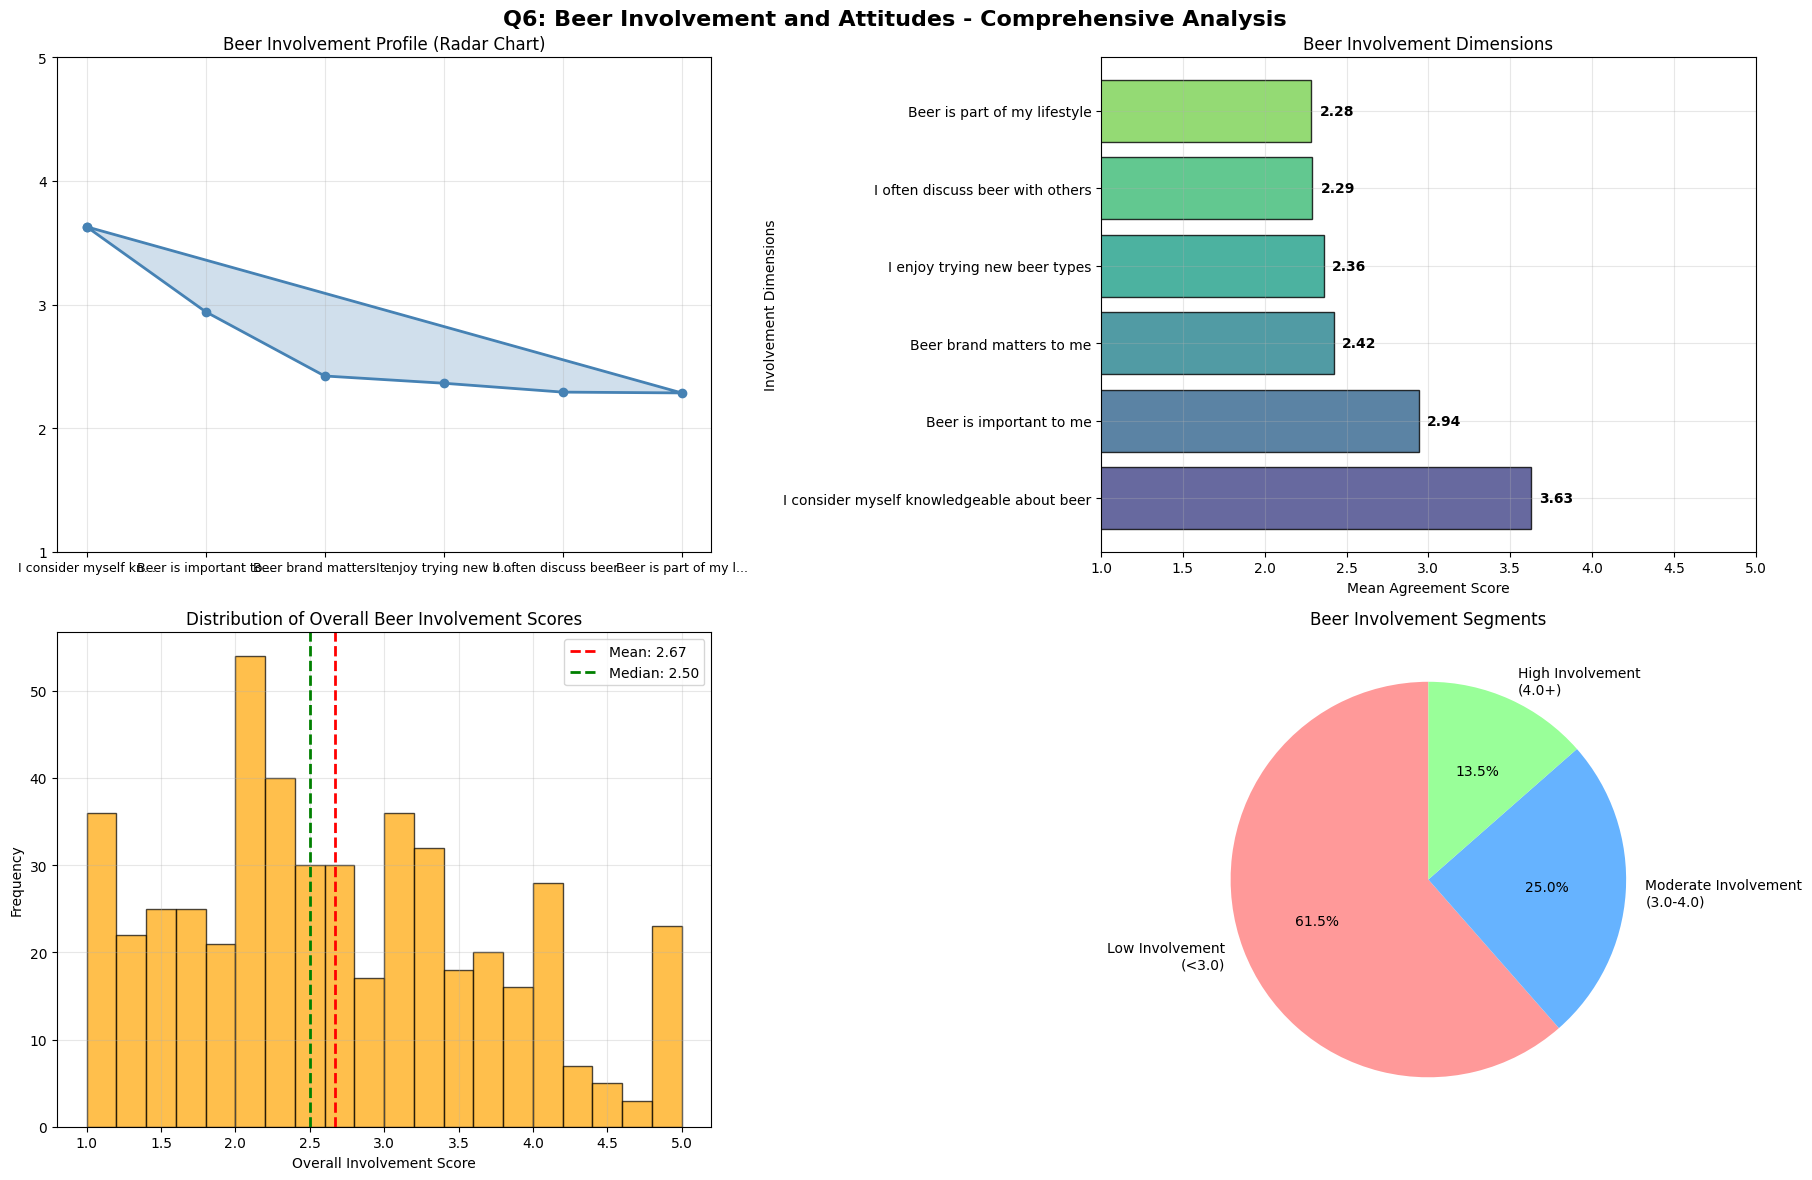

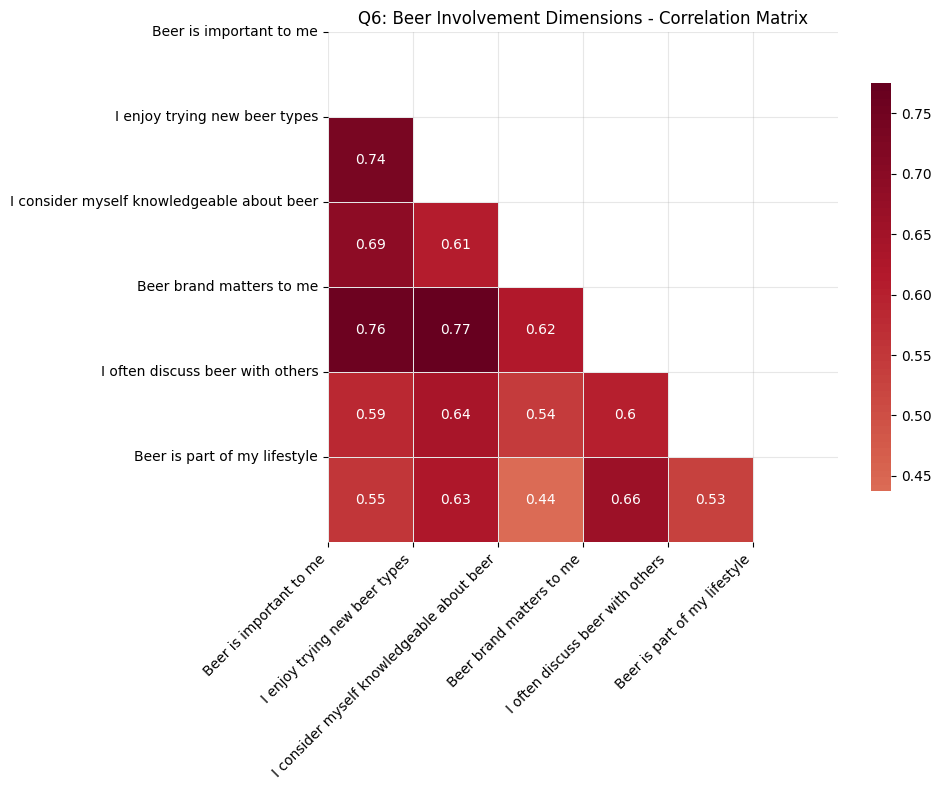


BEER INVOLVEMENT INSIGHTS
Highest involvement: I consider myself knowledgeable about beer (Mean: 3.63)
Lowest involvement: Beer is part of my lifestyle (Mean: 2.28)
Involvement range: 1.34 points

Involvement diversity (std of dimensions): 0.49
  → Moderate diversity across involvement dimensions

Involvement Segments:
  • High involvement consumers: 66 (13.5%)
  • Moderate involvement consumers: 122 (25.0%)
  • Low involvement consumers: 300 (61.5%)

Strong correlations between involvement dimensions:
  • I enjoy trying new beer types & Beer brand matters to me: positively correlated (r = 0.775)
  • Beer is important to me & Beer brand matters to me: positively correlated (r = 0.758)
  • Beer is important to me & I enjoy trying new beer types: positively correlated (r = 0.735)
  • Beer is important to me & I consider myself knowledgeable about beer: positively correlated (r = 0.691)
  • Beer brand matters to me & Beer is part of my lifestyle: positively correlated (r = 0.661)
  • I e

In [29]:
# Q6 Analysis: Beer Involvement and Attitudes
print("\n" + "="*60)
print("Q6: BEER INVOLVEMENT AND ATTITUDES ANALYSIS (Q6A-Q6F)")
print("="*60)

# Define Q6 columns and their meanings
q6_columns = [f'Q6{chr(ord("A")+i)}' for i in range(6)]
q6_labels = {
    'Q6A': 'Beer is important to me',
    'Q6B': 'I enjoy trying new beer types',
    'Q6C': 'I consider myself knowledgeable about beer',
    'Q6D': 'Beer brand matters to me',
    'Q6E': 'I often discuss beer with others',
    'Q6F': 'Beer is part of my lifestyle'
}

scale_labels_q6 = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Calculate comprehensive statistics for each Q6 variable
q6_stats = {}
q6_means = {}
q6_valid_cols = []

for col in q6_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q6_stats[col] = stats_dict
        q6_means[col] = stats_dict['mean']
        q6_valid_cols.append(col)
        
        print(f"\n{col} - {q6_labels[col]}:")
        print(f"  Valid responses: {stats_dict['count']}")
        print(f"  Missing values: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mean: {stats_dict['mean']:.2f} (95% CI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Std Dev: {stats_dict['std']:.2f}")
        
        # Agreement level interpretation
        if stats_dict['mean'] > 4.0:
            agreement = "Strong Agreement"
        elif stats_dict['mean'] > 3.5:
            agreement = "High Agreement"
        elif stats_dict['mean'] > 2.5:
            agreement = "Neutral to Positive"
        elif stats_dict['mean'] > 2.0:
            agreement = "Slight Disagreement"
        else:
            agreement = "Strong Disagreement"
        print(f"  Agreement Level: {agreement}")
    else:
        print(f"⚠️ {col} not found in dataset")

if q6_valid_cols:
    # Calculate overall involvement score
    q6_df = df[q6_valid_cols].apply(pd.to_numeric, errors='coerce')
    involvement_scores = q6_df.mean(axis=1, skipna=True)
    involvement_stats = calculate_advanced_stats(involvement_scores)
    
    print("\n" + "="*50)
    print("OVERALL BEER INVOLVEMENT SCORE")
    print("="*50)
    print(f"Mean involvement score: {involvement_stats['mean']:.2f} (95% CI: {involvement_stats['ci_lower']:.2f}-{involvement_stats['ci_upper']:.2f})")
    print(f"Standard deviation: {involvement_stats['std']:.2f}")
    print(f"Range: {involvement_stats['min']:.2f} - {involvement_stats['max']:.2f}")
    
    # Create ranking of involvement dimensions
    q6_ranking = sorted(q6_means.items(), key=lambda x: x[1], reverse=True)
    
    print("\n" + "="*50)
    print("INVOLVEMENT DIMENSIONS RANKING")
    print("="*50)
    for i, (col, mean_val) in enumerate(q6_ranking, 1):
        ci_lower = q6_stats[col]['ci_lower']
        ci_upper = q6_stats[col]['ci_upper']
        print(f"{i:2d}. {q6_labels[col]:<35} : {mean_val:.2f} (95% CI: {ci_lower:.2f}-{ci_upper:.2f})")
    
    # Comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Q6: Beer Involvement and Attitudes - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # Radar chart for involvement dimensions
    dimensions = [col for col, _ in q6_ranking]
    means = [mean for _, mean in q6_ranking]
    
    # Create radar chart
    angles = np.linspace(0, 2*np.pi, len(dimensions), endpoint=False).tolist()
    means_radar = means + [means[0]]  # Complete the circle
    angles += angles[:1]
    
    ax_radar = axes[0,0]
    ax_radar.plot(angles, means_radar, 'o-', linewidth=2, color='steelblue', label='Mean Scores')
    ax_radar.fill(angles, means_radar, alpha=0.25, color='steelblue')
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels([q6_labels[d][:20] + '...' if len(q6_labels[d]) > 20 else q6_labels[d] 
                             for d in dimensions], fontsize=9)
    ax_radar.set_ylim(1, 5)
    ax_radar.set_yticks([1, 2, 3, 4, 5])
    ax_radar.grid(True)
    ax_radar.set_title('Beer Involvement Profile (Radar Chart)')
    
    # Horizontal bar chart for better readability
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(dimensions)))
    bars = axes[0,1].barh(range(len(dimensions)), means, color=colors, alpha=0.8, edgecolor='black')
    axes[0,1].set_ylabel('Involvement Dimensions')
    axes[0,1].set_xlabel('Mean Agreement Score')
    axes[0,1].set_title('Beer Involvement Dimensions')
    axes[0,1].set_yticks(range(len(dimensions)))
    axes[0,1].set_yticklabels([q6_labels[d] for d in dimensions])
    axes[0,1].set_xlim(1, 5)
    axes[0,1].grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, mean_val) in enumerate(zip(bars, means)):
        axes[0,1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2.,
                      f'{mean_val:.2f}', ha='left', va='center', fontweight='bold')
    
    # Overall involvement score distribution
    axes[1,0].hist(involvement_scores.dropna(), bins=20, alpha=0.7, color='orange', edgecolor='black')
    axes[1,0].axvline(involvement_scores.mean(), color='red', linestyle='--', linewidth=2,
                     label=f'Mean: {involvement_scores.mean():.2f}')
    axes[1,0].axvline(involvement_scores.median(), color='green', linestyle='--', linewidth=2,
                     label=f'Median: {involvement_scores.median():.2f}')
    axes[1,0].set_xlabel('Overall Involvement Score')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title('Distribution of Overall Beer Involvement Scores')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Involvement segments
    involvement_clean = involvement_scores.dropna()
    high_involvement = (involvement_clean >= 4.0).sum()
    moderate_involvement = ((involvement_clean >= 3.0) & (involvement_clean < 4.0)).sum()
    low_involvement = (involvement_clean < 3.0).sum()
    
    segments = ['Low Involvement\n(<3.0)', 'Moderate Involvement\n(3.0-4.0)', 'High Involvement\n(4.0+)']
    segment_counts = [low_involvement, moderate_involvement, high_involvement]
    segment_colors = ['#ff9999', '#66b3ff', '#99ff99']
    
    wedges, texts, autotexts = axes[1,1].pie(segment_counts, labels=segments, autopct='%1.1f%%',
                                            colors=segment_colors, startangle=90)
    axes[1,1].set_title('Beer Involvement Segments')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation analysis
    correlation_matrix = q6_df.corr()
    
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Q6: Beer Involvement Dimensions - Correlation Matrix')
    plt.xticks(range(len(q6_valid_cols)), [q6_labels[col] for col in q6_valid_cols], rotation=45, ha='right')
    plt.yticks(range(len(q6_valid_cols)), [q6_labels[col] for col in q6_valid_cols], rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Advanced insights
    print("\n" + "="*50)
    print("BEER INVOLVEMENT INSIGHTS")
    print("="*50)
    
    # Highest and lowest involvement dimensions
    highest_dimension = max(q6_means, key=q6_means.get)
    lowest_dimension = min(q6_means, key=q6_means.get)
    
    print(f"Highest involvement: {q6_labels[highest_dimension]} (Mean: {q6_means[highest_dimension]:.2f})")
    print(f"Lowest involvement: {q6_labels[lowest_dimension]} (Mean: {q6_means[lowest_dimension]:.2f})")
    print(f"Involvement range: {max(q6_means.values()) - min(q6_means.values()):.2f} points")
    
    # Involvement consistency
    involvement_diversity = np.std(list(q6_means.values()))
    print(f"\nInvolvement diversity (std of dimensions): {involvement_diversity:.2f}")
    if involvement_diversity > 0.5:
        print("  → High diversity across involvement dimensions")
    elif involvement_diversity > 0.3:
        print("  → Moderate diversity across involvement dimensions")
    else:
        print("  → Consistent involvement across dimensions")
    
    # Segment distribution
    print(f"\nInvolvement Segments:")
    print(f"  • High involvement consumers: {high_involvement} ({high_involvement/len(involvement_clean)*100:.1f}%)")
    print(f"  • Moderate involvement consumers: {moderate_involvement} ({moderate_involvement/len(involvement_clean)*100:.1f}%)")
    print(f"  • Low involvement consumers: {low_involvement} ({low_involvement/len(involvement_clean)*100:.1f}%)")
    
    # Strong correlations
    high_correlations = []
    for i, col1 in enumerate(q6_valid_cols):
        for j, col2 in enumerate(q6_valid_cols[i+1:], i+1):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.5:
                high_correlations.append((col1, col2, corr))
    
    if high_correlations:
        print("\nStrong correlations between involvement dimensions:")
        for col1, col2, corr in sorted(high_correlations, key=lambda x: abs(x[2]), reverse=True):
            relationship = "positively" if corr > 0 else "negatively"
            print(f"  • {q6_labels[col1]} & {q6_labels[col2]}: {relationship} correlated (r = {corr:.3f})")
    else:
        print("\nNo strong correlations found between involvement dimensions")
        
else:
    print("No Q6 data found in dataset")


Q7: HEALTH AND ENVIRONMENTAL CONSCIOUSNESS ANALYSIS (Q7A-Q7F)

Q7A - I care about my health when choosing drinks:
  Valid responses: 475
  Missing values: 13 (2.7%)
  Mean: 3.58 (95% CI: 3.48-3.67)
  Median: 4.00
  Std Dev: 1.02
  Agreement Level: High Agreement

Q7B - I prefer organic/natural products:
  Valid responses: 465
  Missing values: 23 (4.7%)
  Mean: 2.82 (95% CI: 2.71-2.92)
  Median: 3.00
  Std Dev: 1.19
  Agreement Level: Neutral to Positive

Q7C - Environmental impact influences my choices:
  Valid responses: 475
  Missing values: 13 (2.7%)
  Mean: 3.46 (95% CI: 3.36-3.56)
  Median: 4.00
  Std Dev: 1.11
  Agreement Level: Neutral to Positive

Q7D - I read nutritional information on drinks:
  Valid responses: 474
  Missing values: 14 (2.9%)
  Mean: 2.81 (95% CI: 2.71-2.92)
  Median: 3.00
  Std Dev: 1.14
  Agreement Level: Neutral to Positive

Q7E - I avoid products with artificial additives:
  Valid responses: 468
  Missing values: 20 (4.1%)
  Mean: 2.43 (95% CI: 2.30-2.5

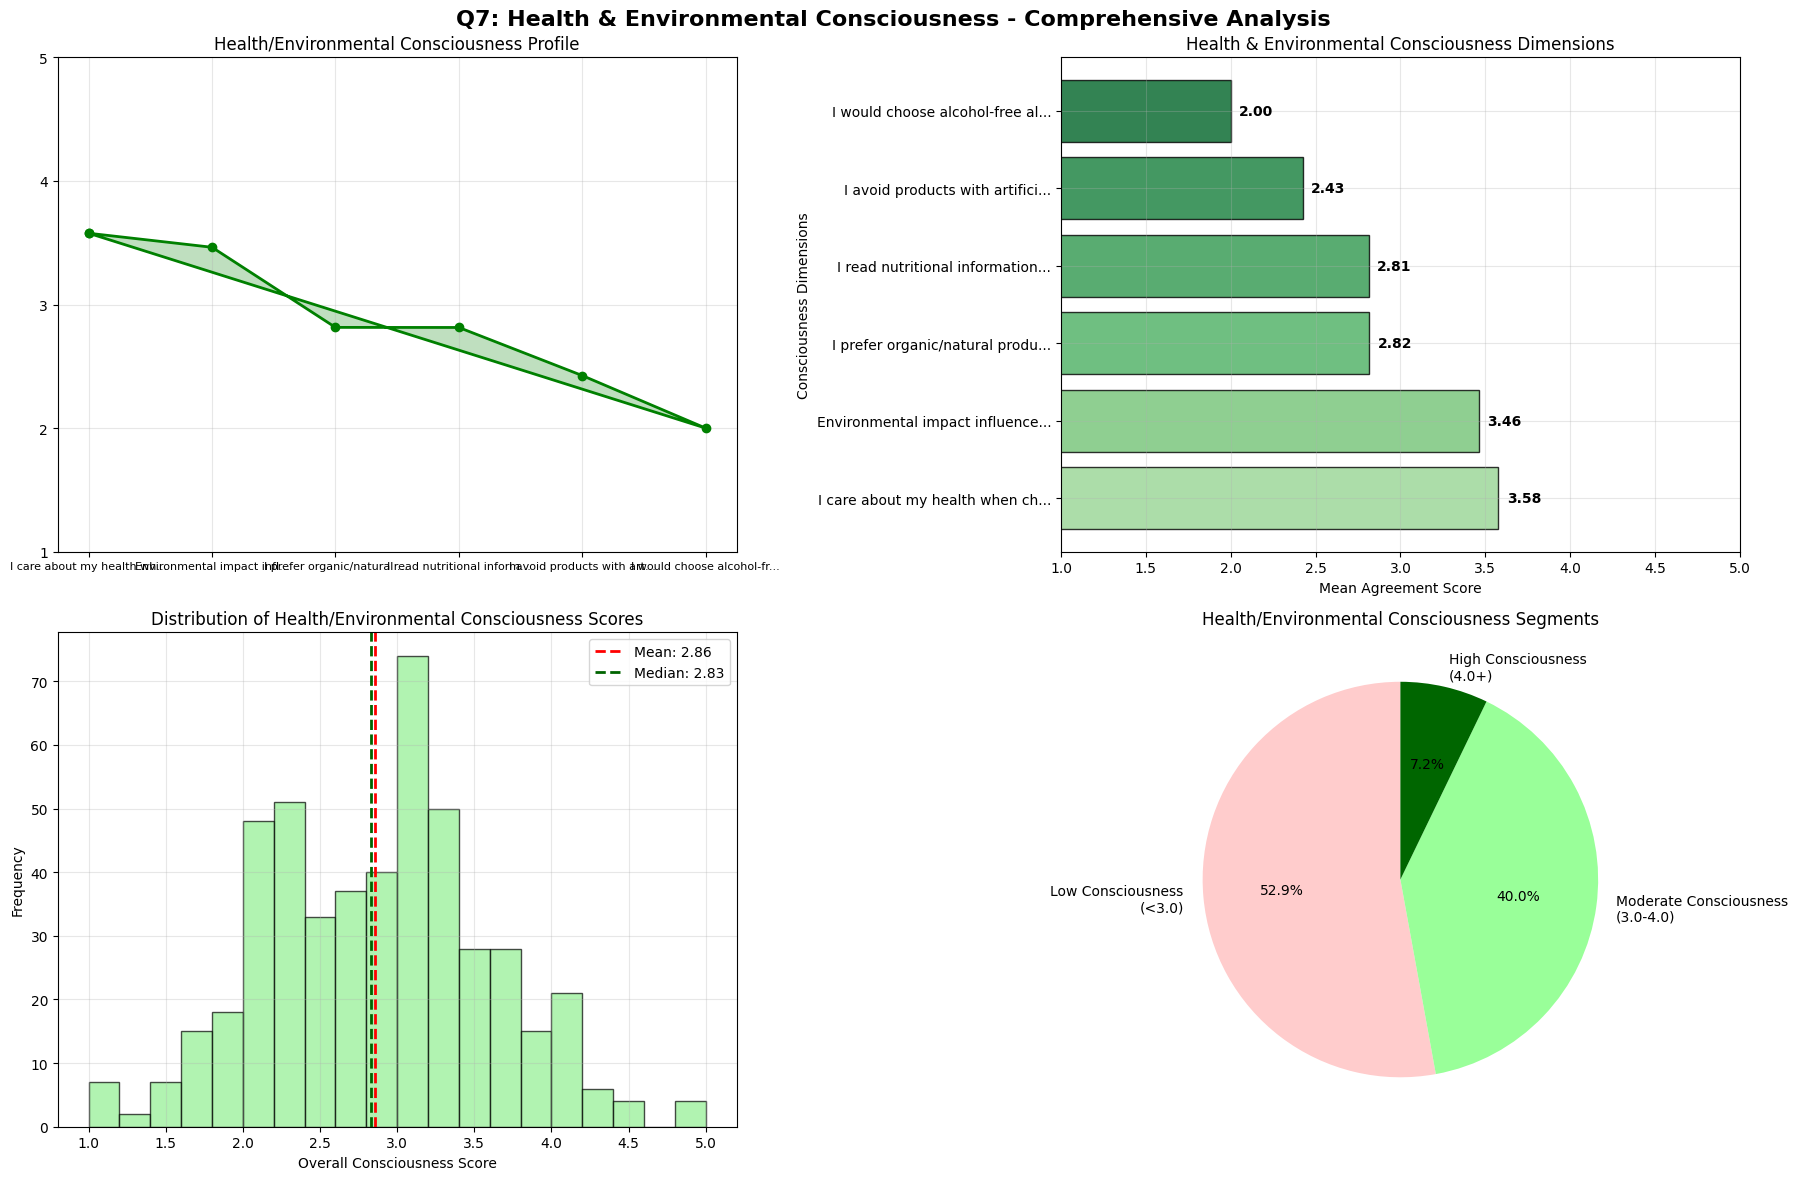

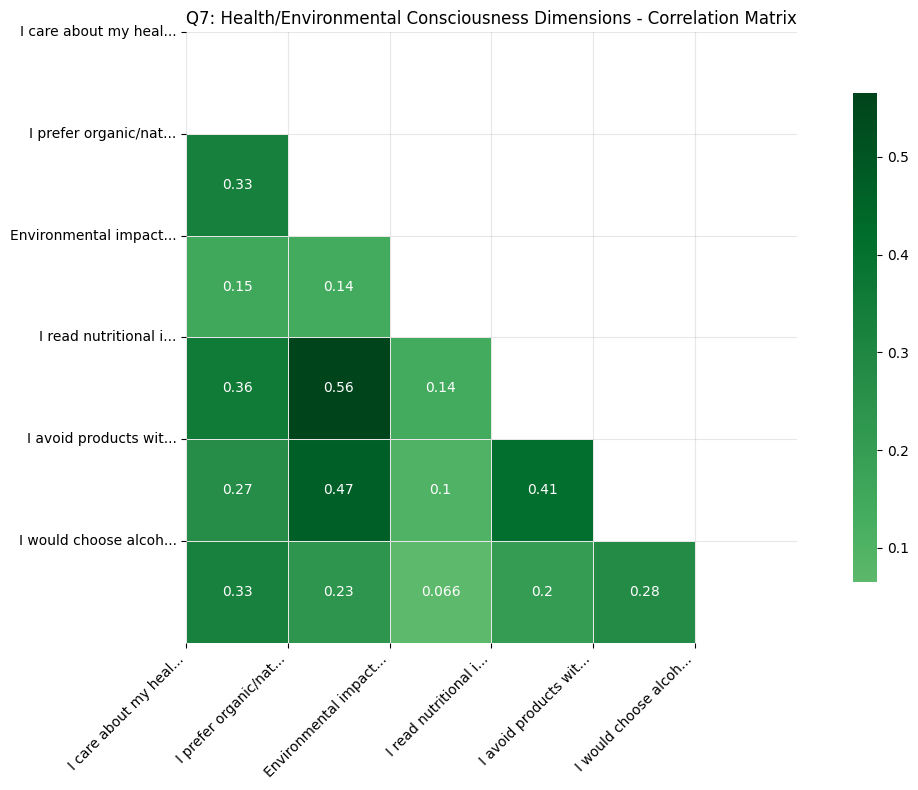


HEALTH/ENVIRONMENTAL CONSCIOUSNESS INSIGHTS
Highest consciousness: I care about my health when choosing drinks (Mean: 3.58)
Lowest consciousness: I would choose alcohol-free alternatives for health (Mean: 2.00)
Consciousness range: 1.58 points

Consciousness diversity (std of dimensions): 0.55
  → High diversity across consciousness dimensions

Consciousness Segments:
  • High consciousness consumers: 35 (7.2%)
  • Moderate consciousness consumers: 195 (40.0%)
  • Low consciousness consumers: 258 (52.9%)

Strong correlations between consciousness dimensions:
  • I prefer organic/natural products & I read nutritional information on drinks: positively correlated (r = 0.565)


In [30]:
# Q7 Analysis: Health and Environmental Consciousness
print("\n" + "="*60)
print("Q7: HEALTH AND ENVIRONMENTAL CONSCIOUSNESS ANALYSIS (Q7A-Q7F)")
print("="*60)

# Define Q7 columns and their meanings
q7_columns = [f'Q7{chr(ord("A")+i)}' for i in range(6)]
q7_labels = {
    'Q7A': 'I care about my health when choosing drinks',
    'Q7B': 'I prefer organic/natural products',
    'Q7C': 'Environmental impact influences my choices',
    'Q7D': 'I read nutritional information on drinks',
    'Q7E': 'I avoid products with artificial additives',
    'Q7F': 'I would choose alcohol-free alternatives for health'
}

scale_labels_q7 = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Calculate comprehensive statistics for each Q7 variable
q7_stats = {}
q7_means = {}
q7_valid_cols = []

for col in q7_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q7_stats[col] = stats_dict
        q7_means[col] = stats_dict['mean']
        q7_valid_cols.append(col)
        
        print(f"\n{col} - {q7_labels[col]}:")
        print(f"  Valid responses: {stats_dict['count']}")
        print(f"  Missing values: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mean: {stats_dict['mean']:.2f} (95% CI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Std Dev: {stats_dict['std']:.2f}")
        
        # Agreement level interpretation
        if stats_dict['mean'] > 4.0:
            agreement = "Strong Agreement"
        elif stats_dict['mean'] > 3.5:
            agreement = "High Agreement"
        elif stats_dict['mean'] > 2.5:
            agreement = "Neutral to Positive"
        elif stats_dict['mean'] > 2.0:
            agreement = "Slight Disagreement"
        else:
            agreement = "Strong Disagreement"
        print(f"  Agreement Level: {agreement}")
    else:
        print(f"⚠️ {col} not found in dataset")

if q7_valid_cols:
    # Calculate overall consciousness score
    q7_df = df[q7_valid_cols].apply(pd.to_numeric, errors='coerce')
    consciousness_scores = q7_df.mean(axis=1, skipna=True)
    consciousness_stats = calculate_advanced_stats(consciousness_scores)
    
    print("\n" + "="*60)
    print("OVERALL HEALTH/ENVIRONMENTAL CONSCIOUSNESS SCORE")
    print("="*60)
    print(f"Mean consciousness score: {consciousness_stats['mean']:.2f} (95% CI: {consciousness_stats['ci_lower']:.2f}-{consciousness_stats['ci_upper']:.2f})")
    print(f"Standard deviation: {consciousness_stats['std']:.2f}")
    print(f"Range: {consciousness_stats['min']:.2f} - {consciousness_stats['max']:.2f}")
    
    # Create ranking of consciousness dimensions
    q7_ranking = sorted(q7_means.items(), key=lambda x: x[1], reverse=True)
    
    print("\n" + "="*60)
    print("CONSCIOUSNESS DIMENSIONS RANKING")
    print("="*60)
    for i, (col, mean_val) in enumerate(q7_ranking, 1):
        ci_lower = q7_stats[col]['ci_lower']
        ci_upper = q7_stats[col]['ci_upper']
        print(f"{i:2d}. {q7_labels[col]:<45} : {mean_val:.2f} (95% CI: {ci_lower:.2f}-{ci_upper:.2f})")
    
    # Comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Q7: Health & Environmental Consciousness - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # Radar chart for consciousness dimensions
    dimensions = [col for col, _ in q7_ranking]
    means = [mean for _, mean in q7_ranking]
    
    # Create radar chart
    angles = np.linspace(0, 2*np.pi, len(dimensions), endpoint=False).tolist()
    means_radar = means + [means[0]]  # Complete the circle
    angles += angles[:1]
    
    ax_radar = axes[0,0]
    ax_radar.plot(angles, means_radar, 'o-', linewidth=2, color='green', label='Mean Scores')
    ax_radar.fill(angles, means_radar, alpha=0.25, color='green')
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels([q7_labels[d][:25] + '...' if len(q7_labels[d]) > 25 else q7_labels[d] 
                             for d in dimensions], fontsize=8)
    ax_radar.set_ylim(1, 5)
    ax_radar.set_yticks([1, 2, 3, 4, 5])
    ax_radar.grid(True)
    ax_radar.set_title('Health/Environmental Consciousness Profile')
    
    # Horizontal bar chart
    colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(dimensions)))
    bars = axes[0,1].barh(range(len(dimensions)), means, color=colors, alpha=0.8, edgecolor='black')
    axes[0,1].set_ylabel('Consciousness Dimensions')
    axes[0,1].set_xlabel('Mean Agreement Score')
    axes[0,1].set_title('Health & Environmental Consciousness Dimensions')
    axes[0,1].set_yticks(range(len(dimensions)))
    axes[0,1].set_yticklabels([q7_labels[d][:30] + '...' if len(q7_labels[d]) > 30 else q7_labels[d] 
                              for d in dimensions])
    axes[0,1].set_xlim(1, 5)
    axes[0,1].grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, mean_val) in enumerate(zip(bars, means)):
        axes[0,1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2.,
                      f'{mean_val:.2f}', ha='left', va='center', fontweight='bold')
    
    # Overall consciousness score distribution
    axes[1,0].hist(consciousness_scores.dropna(), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,0].axvline(consciousness_scores.mean(), color='red', linestyle='--', linewidth=2,
                     label=f'Mean: {consciousness_scores.mean():.2f}')
    axes[1,0].axvline(consciousness_scores.median(), color='darkgreen', linestyle='--', linewidth=2,
                     label=f'Median: {consciousness_scores.median():.2f}')
    axes[1,0].set_xlabel('Overall Consciousness Score')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title('Distribution of Health/Environmental Consciousness Scores')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Consciousness segments
    consciousness_clean = consciousness_scores.dropna()
    high_consciousness = (consciousness_clean >= 4.0).sum()
    moderate_consciousness = ((consciousness_clean >= 3.0) & (consciousness_clean < 4.0)).sum()
    low_consciousness = (consciousness_clean < 3.0).sum()
    
    segments = ['Low Consciousness\n(<3.0)', 'Moderate Consciousness\n(3.0-4.0)', 'High Consciousness\n(4.0+)']
    segment_counts = [low_consciousness, moderate_consciousness, high_consciousness]
    segment_colors = ['#ffcccc', '#99ff99', '#006600']
    
    wedges, texts, autotexts = axes[1,1].pie(segment_counts, labels=segments, autopct='%1.1f%%',
                                            colors=segment_colors, startangle=90)
    axes[1,1].set_title('Health/Environmental Consciousness Segments')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation analysis
    correlation_matrix = q7_df.corr()
    
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Greens', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Q7: Health/Environmental Consciousness Dimensions - Correlation Matrix')
    plt.xticks(range(len(q7_valid_cols)), [q7_labels[col][:20] + '...' if len(q7_labels[col]) > 20 else q7_labels[col] 
                                          for col in q7_valid_cols], rotation=45, ha='right')
    plt.yticks(range(len(q7_valid_cols)), [q7_labels[col][:20] + '...' if len(q7_labels[col]) > 20 else q7_labels[col] 
                                          for col in q7_valid_cols], rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Advanced insights
    print("\n" + "="*60)
    print("HEALTH/ENVIRONMENTAL CONSCIOUSNESS INSIGHTS")
    print("="*60)
    
    # Highest and lowest consciousness dimensions
    highest_dimension = max(q7_means, key=q7_means.get)
    lowest_dimension = min(q7_means, key=q7_means.get)
    
    print(f"Highest consciousness: {q7_labels[highest_dimension]} (Mean: {q7_means[highest_dimension]:.2f})")
    print(f"Lowest consciousness: {q7_labels[lowest_dimension]} (Mean: {q7_means[lowest_dimension]:.2f})")
    print(f"Consciousness range: {max(q7_means.values()) - min(q7_means.values()):.2f} points")
    
    # Consciousness consistency
    consciousness_diversity = np.std(list(q7_means.values()))
    print(f"\nConsciousness diversity (std of dimensions): {consciousness_diversity:.2f}")
    if consciousness_diversity > 0.5:
        print("  → High diversity across consciousness dimensions")
    elif consciousness_diversity > 0.3:
        print("  → Moderate diversity across consciousness dimensions")
    else:
        print("  → Consistent consciousness across dimensions")
    
    # Segment distribution
    print(f"\nConsciousness Segments:")
    print(f"  • High consciousness consumers: {high_consciousness} ({high_consciousness/len(consciousness_clean)*100:.1f}%)")
    print(f"  • Moderate consciousness consumers: {moderate_consciousness} ({moderate_consciousness/len(consciousness_clean)*100:.1f}%)")
    print(f"  • Low consciousness consumers: {low_consciousness} ({low_consciousness/len(consciousness_clean)*100:.1f}%)")
    
    # Strong correlations
    high_correlations = []
    for i, col1 in enumerate(q7_valid_cols):
        for j, col2 in enumerate(q7_valid_cols[i+1:], i+1):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.5:
                high_correlations.append((col1, col2, corr))
    
    if high_correlations:
        print("\nStrong correlations between consciousness dimensions:")
        for col1, col2, corr in sorted(high_correlations, key=lambda x: abs(x[2]), reverse=True):
            relationship = "positively" if corr > 0 else "negatively"
            print(f"  • {q7_labels[col1]} & {q7_labels[col2]}: {relationship} correlated (r = {corr:.3f})")
    else:
        print("\nNo strong correlations found between consciousness dimensions")
        
else:
    print("No Q7 data found in dataset")


CROSS-ANALYSIS: BEER INVOLVEMENT vs HEALTH/ENVIRONMENTAL CONSCIOUSNESS
Sample size for comparison: 488
Involvement mean: 2.67
Consciousness mean: 2.86
Correlation between Involvement and Consciousness: -0.216
Pearson correlation p-value: 0.0000
Correlation is statistically significant at α = 0.05


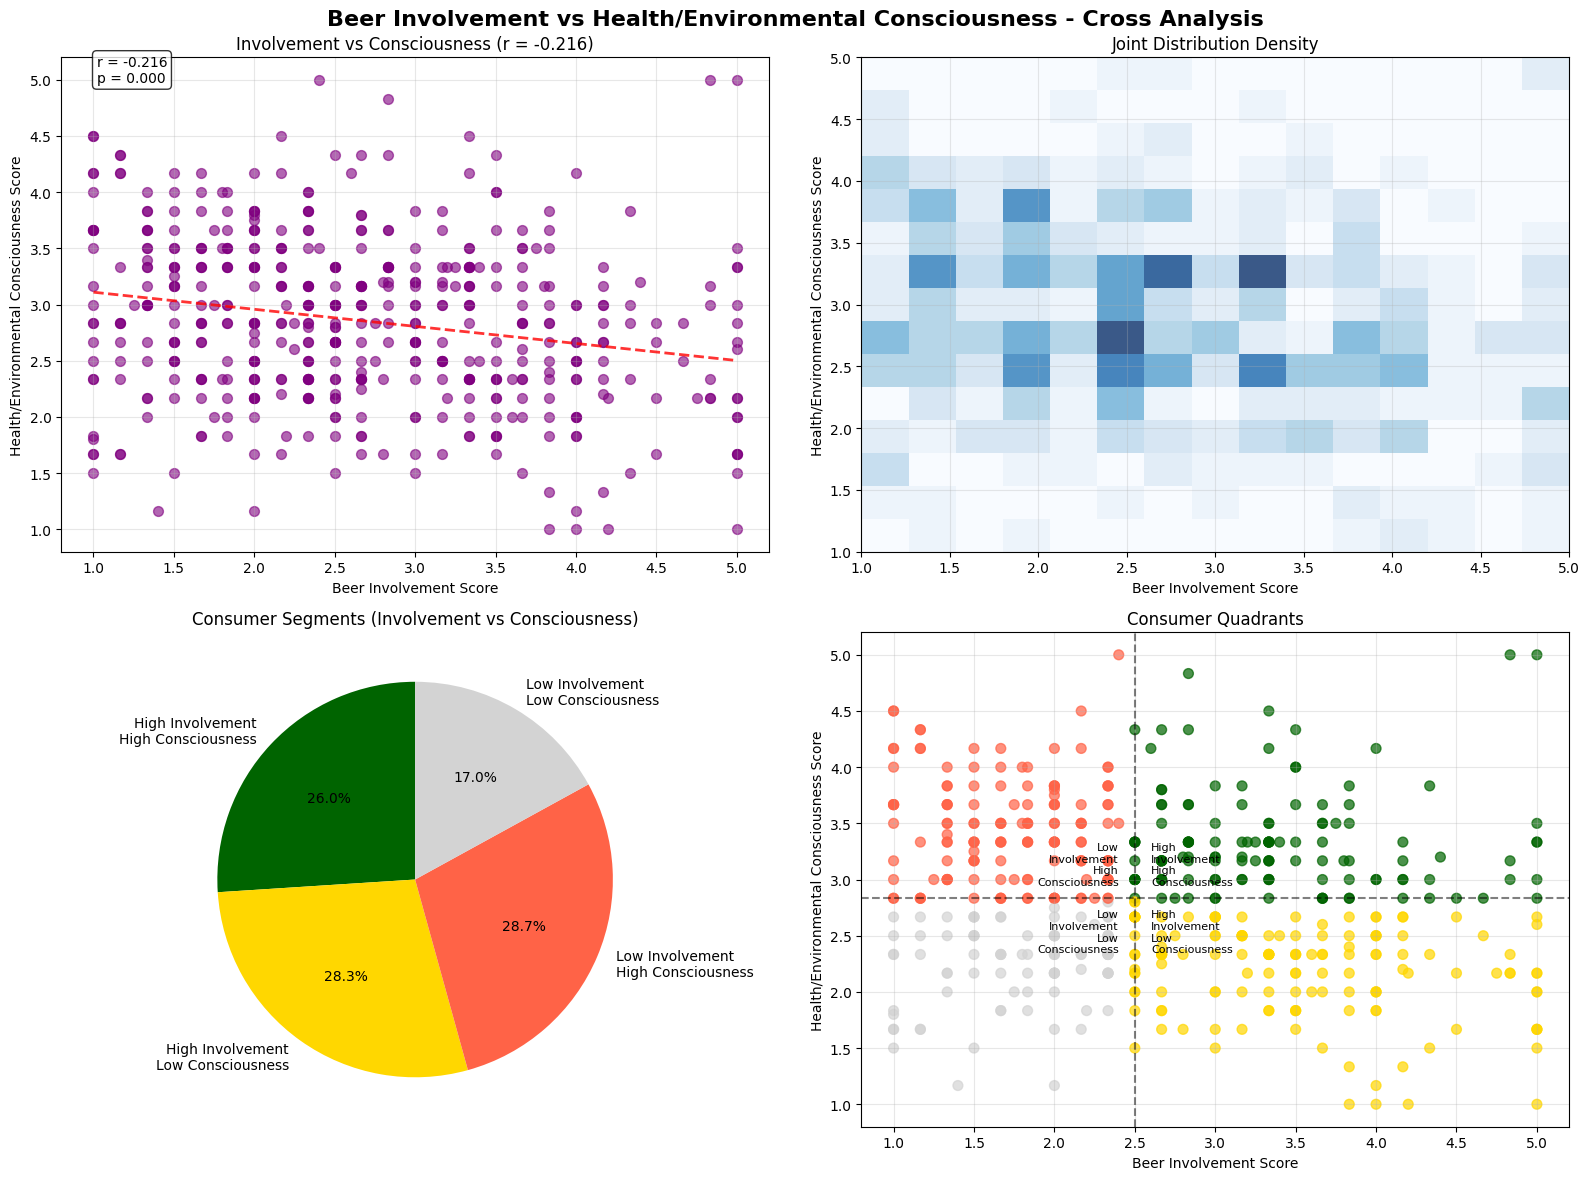


CONSUMER SEGMENT ANALYSIS
High Involvement High Consciousness:  127 ( 26.0%)
High Involvement Low Consciousness :  138 ( 28.3%)
Low Involvement High Consciousness :  140 ( 28.7%)
Low Involvement Low Consciousness  :   83 ( 17.0%)

CORRELATION INTERPRETATION
The correlation between beer involvement and health/environmental consciousness is weak and negative.
→ Beer involvement and health/environmental consciousness appear to be largely independent

ATTITUDES & INVOLVEMENT ANALYSIS SUMMARY
This completes the Attitudes & Involvement analysis covering:
• Q6: Beer involvement and attitudes scale
• Q7: Health and environmental consciousness
• Cross-analysis of involvement vs consciousness

Next: Purchase Decision Factors Analysis (Q8)


In [31]:
# Cross-Analysis: Beer Involvement vs Health/Environmental Consciousness
print("\n" + "="*70)
print("CROSS-ANALYSIS: BEER INVOLVEMENT vs HEALTH/ENVIRONMENTAL CONSCIOUSNESS")
print("="*70)

if q6_valid_cols and q7_valid_cols:
    # Calculate overall scores for both dimensions
    q6_df = df[q6_valid_cols].apply(pd.to_numeric, errors='coerce')
    q7_df = df[q7_valid_cols].apply(pd.to_numeric, errors='coerce')
    
    involvement_scores = q6_df.mean(axis=1, skipna=True)
    consciousness_scores = q7_df.mean(axis=1, skipna=True)
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Involvement': involvement_scores,
        'Consciousness': consciousness_scores
    }).dropna()
    
    if len(comparison_df) > 0:
        # Calculate correlation
        correlation = comparison_df['Involvement'].corr(comparison_df['Consciousness'])
        
        print(f"Sample size for comparison: {len(comparison_df):,}")
        print(f"Involvement mean: {comparison_df['Involvement'].mean():.2f}")
        print(f"Consciousness mean: {comparison_df['Consciousness'].mean():.2f}")
        print(f"Correlation between Involvement and Consciousness: {correlation:.3f}")
        
        # Statistical significance test
        from scipy.stats import pearsonr
        corr_coef, p_value = pearsonr(comparison_df['Involvement'], comparison_df['Consciousness'])
        print(f"Pearson correlation p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            significance = "statistically significant"
        else:
            significance = "not statistically significant"
        print(f"Correlation is {significance} at α = 0.05")
        
        # Create comprehensive comparison visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Beer Involvement vs Health/Environmental Consciousness - Cross Analysis', 
                    fontsize=16, fontweight='bold')
        
        # Scatter plot with regression line
        axes[0,0].scatter(comparison_df['Involvement'], comparison_df['Consciousness'], 
                         alpha=0.6, color='purple', s=50)
        
        # Add regression line
        z = np.polyfit(comparison_df['Involvement'], comparison_df['Consciousness'], 1)
        p = np.poly1d(z)
        axes[0,0].plot(comparison_df['Involvement'].sort_values(), 
                      p(comparison_df['Involvement'].sort_values()), 
                      "r--", alpha=0.8, linewidth=2)
        
        axes[0,0].set_xlabel('Beer Involvement Score')
        axes[0,0].set_ylabel('Health/Environmental Consciousness Score')
        axes[0,0].set_title(f'Involvement vs Consciousness (r = {correlation:.3f})')
        axes[0,0].grid(True, alpha=0.3)
        
        # Add correlation annotation
        axes[0,0].text(0.05, 0.95, f'r = {correlation:.3f}\np = {p_value:.3f}', 
                      transform=axes[0,0].transAxes, 
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # 2D histogram
        axes[0,1].hist2d(comparison_df['Involvement'], comparison_df['Consciousness'], 
                        bins=15, cmap='Blues', alpha=0.8)
        axes[0,1].set_xlabel('Beer Involvement Score')
        axes[0,1].set_ylabel('Health/Environmental Consciousness Score')
        axes[0,1].set_title('Joint Distribution Density')
        
        # Consumer segments based on both dimensions
        # Define segments using median splits
        involvement_median = comparison_df['Involvement'].median()
        consciousness_median = comparison_df['Consciousness'].median()
        
        # Create 4 segments
        segments = {
            'High Involvement\nHigh Consciousness': ((comparison_df['Involvement'] >= involvement_median) & 
                                                    (comparison_df['Consciousness'] >= consciousness_median)).sum(),
            'High Involvement\nLow Consciousness': ((comparison_df['Involvement'] >= involvement_median) & 
                                                   (comparison_df['Consciousness'] < consciousness_median)).sum(),
            'Low Involvement\nHigh Consciousness': ((comparison_df['Involvement'] < involvement_median) & 
                                                   (comparison_df['Consciousness'] >= consciousness_median)).sum(),
            'Low Involvement\nLow Consciousness': ((comparison_df['Involvement'] < involvement_median) & 
                                                  (comparison_df['Consciousness'] < consciousness_median)).sum()
        }
        
        # Pie chart of segments
        segment_labels = list(segments.keys())
        segment_counts = list(segments.values())
        segment_colors = ['#006400', '#FFD700', '#FF6347', '#D3D3D3']
        
        wedges, texts, autotexts = axes[1,0].pie(segment_counts, labels=segment_labels, 
                                                autopct='%1.1f%%', colors=segment_colors, 
                                                startangle=90)
        axes[1,0].set_title('Consumer Segments (Involvement vs Consciousness)')
        
        # Quadrant analysis scatter plot
        colors = []
        for _, row in comparison_df.iterrows():
            if row['Involvement'] >= involvement_median and row['Consciousness'] >= consciousness_median:
                colors.append('#006400')  # High-High: Dark Green
            elif row['Involvement'] >= involvement_median and row['Consciousness'] < consciousness_median:
                colors.append('#FFD700')  # High-Low: Gold
            elif row['Involvement'] < involvement_median and row['Consciousness'] >= consciousness_median:
                colors.append('#FF6347')  # Low-High: Tomato
            else:
                colors.append('#D3D3D3')  # Low-Low: Light Gray
        
        axes[1,1].scatter(comparison_df['Involvement'], comparison_df['Consciousness'], 
                         c=colors, alpha=0.7, s=50)
        axes[1,1].axhline(consciousness_median, color='black', linestyle='--', alpha=0.5)
        axes[1,1].axvline(involvement_median, color='black', linestyle='--', alpha=0.5)
        axes[1,1].set_xlabel('Beer Involvement Score')
        axes[1,1].set_ylabel('Health/Environmental Consciousness Score')
        axes[1,1].set_title('Consumer Quadrants')
        axes[1,1].grid(True, alpha=0.3)
        
        # Add quadrant labels
        axes[1,1].text(involvement_median + 0.1, consciousness_median + 0.1, 
                      'High\nInvolvement\nHigh\nConsciousness', 
                      fontsize=8, ha='left', va='bottom')
        axes[1,1].text(involvement_median + 0.1, consciousness_median - 0.1, 
                      'High\nInvolvement\nLow\nConsciousness', 
                      fontsize=8, ha='left', va='top')
        axes[1,1].text(involvement_median - 0.1, consciousness_median + 0.1, 
                      'Low\nInvolvement\nHigh\nConsciousness', 
                      fontsize=8, ha='right', va='bottom')
        axes[1,1].text(involvement_median - 0.1, consciousness_median - 0.1, 
                      'Low\nInvolvement\nLow\nConsciousness', 
                      fontsize=8, ha='right', va='top')
        
        plt.tight_layout()
        plt.show()
        
        # Detailed segment analysis
        print("\n" + "="*50)
        print("CONSUMER SEGMENT ANALYSIS")
        print("="*50)
        
        for segment, count in segments.items():
            percentage = (count / len(comparison_df)) * 100
            print(f"{segment.replace(chr(10), ' '):<35}: {count:4d} ({percentage:5.1f}%)")
        
        # Correlation interpretation
        print("\n" + "="*50)
        print("CORRELATION INTERPRETATION")
        print("="*50)
        
        if abs(correlation) < 0.1:
            interp = "negligible"
        elif abs(correlation) < 0.3:
            interp = "weak"
        elif abs(correlation) < 0.5:
            interp = "moderate"
        elif abs(correlation) < 0.7:
            interp = "strong"
        else:
            interp = "very strong"
        
        direction = "positive" if correlation > 0 else "negative"
        
        print(f"The correlation between beer involvement and health/environmental consciousness is {interp} and {direction}.")
        
        if correlation > 0.3:
            print("→ Higher beer involvement tends to be associated with higher health/environmental consciousness")
        elif correlation < -0.3:
            print("→ Higher beer involvement tends to be associated with lower health/environmental consciousness")
        else:
            print("→ Beer involvement and health/environmental consciousness appear to be largely independent")
            
    else:
        print("Insufficient data for comparison analysis")
else:
    print("Q6 or Q7 data not available for cross-analysis")

print("\n" + "="*60)
print("ATTITUDES & INVOLVEMENT ANALYSIS SUMMARY")
print("="*60)
print("This completes the Attitudes & Involvement analysis covering:")
print("• Q6: Beer involvement and attitudes scale")
print("• Q7: Health and environmental consciousness")
print("• Cross-analysis of involvement vs consciousness")
print("\nNext: Purchase Decision Factors Analysis (Q8)")

# 5. Purchase Decision Factors Analysis

This section examines the factors that influence beer purchase decisions through:
- **Q8A-Q8L**: Importance ratings of various purchase decision factors
- Factor analysis to identify underlying decision dimensions
- Ranking of most influential factors
- Consumer segmentation based on decision priorities

The analysis will reveal what drives consumer choice and identify key value propositions for different market segments.

In [ ]:
# Q8 Analysis: Purchase Decision Factors
print("\n" + "="*70)
print("Q8: PURCHASE DECISION FACTORS ANALYSIS (Q8A-Q8L)")
print("="*70)

# Define Q8 columns and their meanings
q8_columns = [f'Q8{chr(ord("A")+i)}' for i in range(12)]
q8_labels = {
    'Q8A': 'Price/Value for money',
    'Q8B': 'Brand reputation',
    'Q8C': 'Taste/Flavor profile',
    'Q8D': 'Alcohol content',
    'Q8E': 'Package design/Appearance',
    'Q8F': 'Availability/Convenience',
    'Q8G': 'Recommendations from others',
    'Q8H': 'Nutritional information',
    'Q8I': 'Organic/Natural ingredients',
    'Q8J': 'Environmental sustainability',
    'Q8K': 'Local/Regional origin',
    'Q8L': 'Special offers/Promotions'
}

scale_labels_q8 = ['Not important', 'Slightly important', 'Moderately important', 
                   'Very important', 'Extremely important']

# Calculate comprehensive statistics for each Q8 variable
q8_stats = {}
q8_means = {}
q8_valid_cols = []

for col in q8_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q8_stats[col] = stats_dict
        q8_means[col] = stats_dict['mean']
        q8_valid_cols.append(col)
        
        print(f"\n{col} - {q8_labels[col]}:")
        print(f"  Valid responses: {stats_dict['count']}")
        print(f"  Missing values: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mean: {stats_dict['mean']:.2f} (95% CI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Std Dev: {stats_dict['std']:.2f}")
        
        # Importance level interpretation
        if stats_dict['mean'] > 4.0:
            importance = "Extremely Important"
        elif stats_dict['mean'] > 3.5:
            importance = "Very Important"
        elif stats_dict['mean'] > 2.5:
            importance = "Moderately Important"
        elif stats_dict['mean'] > 2.0:
            importance = "Slightly Important"
        else:
            importance = "Not Important"
        print(f"  Importance Level: {importance}")
    else:
        print(f"⚠️ {col} not found in dataset")

if q8_valid_cols:
    # Create ranking of decision factors by importance
    q8_ranking = sorted(q8_means.items(), key=lambda x: x[1], reverse=True)
    
    print("\n" + "="*70)
    print("PURCHASE DECISION FACTORS RANKING")
    print("="*70)
    for i, (col, mean_val) in enumerate(q8_ranking, 1):
        ci_lower = q8_stats[col]['ci_lower']
        ci_upper = q8_stats[col]['ci_upper']
        print(f"{i:2d}. {q8_labels[col]:<35} : {mean_val:.2f} (95% CI: {ci_lower:.2f}-{ci_upper:.2f})")
    
    # Factor categorization
    top_factors = [col for col, mean in q8_means.items() if mean >= 4.0]
    important_factors = [col for col, mean in q8_means.items() if 3.5 <= mean < 4.0]
    moderate_factors = [col for col, mean in q8_means.items() if 2.5 <= mean < 3.5]
    low_factors = [col for col, mean in q8_means.items() if mean < 2.5]
    
    print("\n" + "="*50)
    print("FACTOR CATEGORIZATION")
    print("="*50)
    
    print(f"Top Priority Factors (4.0+): {len(top_factors)}")
    for col in top_factors:
        print(f"  • {q8_labels[col]} (Mean: {q8_means[col]:.2f})")
    
    print(f"\nImportant Factors (3.5-4.0): {len(important_factors)}")
    for col in important_factors:
        print(f"  • {q8_labels[col]} (Mean: {q8_means[col]:.2f})")
    
    print(f"\nModerate Factors (2.5-3.5): {len(moderate_factors)}")
    for col in moderate_factors:
        print(f"  • {q8_labels[col]} (Mean: {q8_means[col]:.2f})")
    
    print(f"\nLow Priority Factors (<2.5): {len(low_factors)}")
    for col in low_factors:
        print(f"  • {q8_labels[col]} (Mean: {q8_means[col]:.2f})")
    
    # Comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))
    fig.suptitle('Q8: Purchase Decision Factors - Comprehensive Analysis', fontsize=16, fontweight='bold')
    
    # Horizontal bar chart with confidence intervals
    factors = [col for col, _ in q8_ranking]
    means = [mean for _, mean in q8_ranking]
    ci_lower = [q8_stats[col]['ci_lower'] for col in factors]
    ci_upper = [q8_stats[col]['ci_upper'] for col in factors]
    errors = [[mean - lower for mean, lower in zip(means, ci_lower)],
              [upper - mean for mean, upper in zip(means, ci_upper)]]
    
    # Color code by importance level
    colors = []
    for mean in means:
        if mean >= 4.0:
            colors.append('#8B0000')  # Dark red for extremely important
        elif mean >= 3.5:
            colors.append('#FF4500')  # Orange red for very important
        elif mean >= 2.5:
            colors.append('#FFD700')  # Gold for moderately important
        else:
            colors.append('#D3D3D3')  # Light gray for less important
    
    bars = axes[0,0].barh(range(len(factors)), means, color=colors, alpha=0.8, 
                         edgecolor='black', capsize=5)
    axes[0,0].errorbar(means, range(len(factors)), xerr=errors, fmt='none', 
                      color='black', capsize=5, capthick=2)
    axes[0,0].set_ylabel('Purchase Decision Factors (Ranked by Importance)')
    axes[0,0].set_xlabel('Mean Importance Score')
    axes[0,0].set_title('Purchase Decision Factors with 95% Confidence Intervals')
    axes[0,0].set_yticks(range(len(factors)))
    axes[0,0].set_yticklabels([q8_labels[f] for f in factors])
    axes[0,0].set_xlim(1, 5)
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, mean_val) in enumerate(zip(bars, means)):
        axes[0,0].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2.,
                      f'{mean_val:.2f}', ha='left', va='center', fontweight='bold')
    
    # Factor importance distribution
    importance_categories = {
        'Extremely Important (4.0+)': len(top_factors),
        'Very Important (3.5-4.0)': len(important_factors),
        'Moderately Important (2.5-3.5)': len(moderate_factors),
        'Less Important (<2.5)': len(low_factors)
    }
    
    category_labels = list(importance_categories.keys())
    category_counts = list(importance_categories.values())
    category_colors = ['#8B0000', '#FF4500', '#FFD700', '#D3D3D3']
    
    wedges, texts, autotexts = axes[0,1].pie(category_counts, labels=category_labels, 
                                            autopct='%1.0f', colors=category_colors, 
                                            startangle=90)
    axes[0,1].set_title('Distribution of Factor Importance Levels')
    
    # Correlation heatmap
    q8_df = df[q8_valid_cols].apply(pd.to_numeric, errors='coerce')
    correlation_matrix = q8_df.corr()
    
    # Select top 8 factors for cleaner visualization
    top_8_factors = [col for col, _ in q8_ranking[:8]]
    top_8_corr = correlation_matrix.loc[top_8_factors, top_8_factors]
    
    im = axes[1,0].imshow(top_8_corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[1,0].set_title('Top 8 Decision Factors - Correlation Matrix')
    axes[1,0].set_xticks(range(len(top_8_factors)))
    axes[1,0].set_yticks(range(len(top_8_factors)))
    axes[1,0].set_xticklabels([q8_labels[col][:15] + '...' if len(q8_labels[col]) > 15 else q8_labels[col] 
                              for col in top_8_factors], rotation=45, ha='right')
    axes[1,0].set_yticklabels([q8_labels[col][:15] + '...' if len(q8_labels[col]) > 15 else q8_labels[col] 
                              for col in top_8_factors])
    
    # Add correlation values
    for i in range(len(top_8_factors)):
        for j in range(len(top_8_factors)):
            text = axes[1,0].text(j, i, f'{top_8_corr.iloc[i, j]:.2f}',
                                 ha="center", va="center", 
                                 color="white" if abs(top_8_corr.iloc[i, j]) > 0.5 else "black",
                                 fontsize=8)
    
    # Factor variability analysis
    factor_stds = [q8_stats[col]['std'] for col in q8_valid_cols]
    factor_names_short = [q8_labels[col][:20] + '...' if len(q8_labels[col]) > 20 else q8_labels[col] 
                         for col in q8_valid_cols]
    
    bars_std = axes[1,1].bar(range(len(factor_stds)), factor_stds, 
                            color='lightblue', alpha=0.8, edgecolor='black')
    axes[1,1].set_xlabel('Decision Factors')
    axes[1,1].set_ylabel('Standard Deviation')
    axes[1,1].set_title('Variability in Factor Importance Ratings')
    axes[1,1].set_xticks(range(len(factor_names_short)))
    axes[1,1].set_xticklabels(factor_names_short, rotation=45, ha='right')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add std labels on bars
    for bar, std_val in zip(bars_std, factor_stds):
        axes[1,1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                      f'{std_val:.2f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Factor analysis insights
    print("\n" + "="*70)
    print("PURCHASE DECISION FACTORS INSIGHTS")
    print("="*70)
    
    # Most and least important factors
    most_important = max(q8_means, key=q8_means.get)
    least_important = min(q8_means, key=q8_means.get)
    
    print(f"Most important factor: {q8_labels[most_important]} (Mean: {q8_means[most_important]:.2f})")
    print(f"Least important factor: {q8_labels[least_important]} (Mean: {q8_means[least_important]:.2f})")
    print(f"Importance range: {max(q8_means.values()) - min(q8_means.values()):.2f} points")
    
    # Factor diversity
    factor_diversity = np.std(list(q8_means.values()))
    print(f"\nFactor importance diversity (std of means): {factor_diversity:.2f}")
    if factor_diversity > 0.8:
        print("  → High diversity - clear differentiation between factors")
    elif factor_diversity > 0.5:
        print("  → Moderate diversity in factor importance")
    else:
        print("  → Low diversity - similar importance across factors")
    
    # Top 3 factors analysis
    top_3 = q8_ranking[:3]
    print(f"\nTop 3 Decision Factors:")
    for i, (col, mean_val) in enumerate(top_3, 1):
        print(f"  {i}. {q8_labels[col]} (Mean: {mean_val:.2f})")
    
    # Strong correlations
    high_correlations = []
    for i, col1 in enumerate(q8_valid_cols):
        for j, col2 in enumerate(q8_valid_cols[i+1:], i+1):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.5:
                high_correlations.append((col1, col2, corr))
    
    if high_correlations:
        print("\nStrong correlations between decision factors:")
        for col1, col2, corr in sorted(high_correlations, key=lambda x: abs(x[2]), reverse=True):
            relationship = "positively" if corr > 0 else "negatively"
            print(f"  • {q8_labels[col1]} & {q8_labels[col2]}: {relationship} correlated (r = {corr:.3f})")
    else:
        print("\nNo strong correlations found between decision factors")
        
else:
    print("No Q8 data found in dataset")

In [ ]:
# Advanced Factor Analysis: Principal Component Analysis (PCA)
print("\n" + "="*70)
print("PRINCIPAL COMPONENT ANALYSIS (PCA) - DECISION FACTOR DIMENSIONS")
print("="*70)

if len(q8_valid_cols) >= 3:
    # Prepare data for PCA
    q8_pca_data = df[q8_valid_cols].apply(pd.to_numeric, errors='coerce').dropna()
    
    if len(q8_pca_data) > 50:  # Minimum sample size for meaningful PCA
        # Standardize the data
        scaler = StandardScaler()
        q8_scaled = scaler.fit_transform(q8_pca_data)
        
        # Perform PCA
        pca = PCA()
        pca_result = pca.fit_transform(q8_scaled)
        
        # Calculate explained variance
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        
        print(f"PCA Analysis Results (Sample size: {len(q8_pca_data):,}):")
        print(f"Number of factors analyzed: {len(q8_valid_cols)}")
        
        # Determine number of meaningful components
        n_components = np.sum(explained_variance_ratio > 0.1)  # Kaiser criterion modified
        n_components = max(min(n_components, 4), 2)  # Between 2 and 4 components
        
        print(f"\nPrincipal Components (showing top {n_components}):")
        for i in range(n_components):
            print(f"  PC{i+1}: Explains {explained_variance_ratio[i]*100:.1f}% of variance")
        
        print(f"\nCumulative variance explained by top {n_components} components: {cumulative_variance[n_components-1]*100:.1f}%")
        
        # Component loadings
        components_df = pd.DataFrame(
            pca.components_[:n_components].T,
            columns=[f'PC{i+1}' for i in range(n_components)],
            index=[q8_labels[col] for col in q8_valid_cols]
        )
        
        print(f"\nComponent Loadings (Factor Loadings):")
        print(components_df.round(3))
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Purchase Decision Factors - Principal Component Analysis', fontsize=16, fontweight='bold')
        
        # Scree plot
        axes[0,0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
                      'bo-', linewidth=2, markersize=8)
        axes[0,0].plot(range(1, len(explained_variance_ratio) + 1), [0.1] * len(explained_variance_ratio), 
                      'r--', alpha=0.7, label='10% threshold')
        axes[0,0].set_xlabel('Principal Component')
        axes[0,0].set_ylabel('Explained Variance Ratio')
        axes[0,0].set_title('Scree Plot - Explained Variance by Component')
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].legend()
        
        # Cumulative variance plot
        axes[0,1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 
                      'go-', linewidth=2, markersize=8)
        axes[0,1].axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% threshold')
        axes[0,1].set_xlabel('Number of Components')
        axes[0,1].set_ylabel('Cumulative Explained Variance (%)')
        axes[0,1].set_title('Cumulative Explained Variance')
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].legend()
        
        # Component loadings heatmap
        im = axes[1,0].imshow(components_df.T, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
        axes[1,0].set_title('Component Loadings Heatmap')
        axes[1,0].set_xticks(range(len(q8_valid_cols)))
        axes[1,0].set_yticks(range(n_components))
        axes[1,0].set_xticklabels([q8_labels[col][:15] + '...' if len(q8_labels[col]) > 15 else q8_labels[col] 
                                  for col in q8_valid_cols], rotation=45, ha='right')
        axes[1,0].set_yticklabels([f'PC{i+1}' for i in range(n_components)])
        
        # Add loading values
        for i in range(n_components):
            for j in range(len(q8_valid_cols)):
                text = axes[1,0].text(j, i, f'{components_df.iloc[j, i]:.2f}',
                                     ha="center", va="center", 
                                     color="white" if abs(components_df.iloc[j, i]) > 0.5 else "black",
                                     fontsize=8)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[1,0])
        cbar.set_label('Loading Strength')
        
        # Biplot for first two components (if we have at least 2)
        if n_components >= 2:
            # Plot factor scores
            axes[1,1].scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, s=50)
            
            # Plot loading vectors
            for i, (factor, loading) in enumerate(zip(q8_valid_cols, components_df.values)):
                axes[1,1].arrow(0, 0, loading[0]*3, loading[1]*3, 
                               head_width=0.1, head_length=0.1, fc='red', ec='red')
                axes[1,1].text(loading[0]*3.2, loading[1]*3.2, q8_labels[factor][:10], 
                              fontsize=8, ha='center', va='center')
            
            axes[1,1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
            axes[1,1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
            axes[1,1].set_title('PCA Biplot (PC1 vs PC2)')
            axes[1,1].grid(True, alpha=0.3)
            axes[1,1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
            axes[1,1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
        else:
            axes[1,1].text(0.5, 0.5, 'Biplot requires\nat least 2 components', 
                          ha='center', va='center', transform=axes[1,1].transAxes, fontsize=14)
            axes[1,1].set_title('PCA Biplot')
        
        plt.tight_layout()
        plt.show()
        
        # Interpret components
        print("\n" + "="*50)
        print("COMPONENT INTERPRETATION")
        print("="*50)
        
        for i in range(n_components):
            print(f"\nPrincipal Component {i+1} (explains {explained_variance_ratio[i]*100:.1f}% of variance):")
            
            # Find factors with high loadings (>0.4 or <-0.4)
            high_loadings = components_df.iloc[:, i].abs() > 0.4
            if high_loadings.any():
                high_loading_factors = components_df.iloc[:, i][high_loadings].sort_values(key=abs, ascending=False)
                print("  High loading factors:")
                for factor, loading in high_loading_factors.items():
                    direction = "positively" if loading > 0 else "negatively"
                    print(f"    • {factor}: {loading:.3f} ({direction} associated)")
                
                # Suggest component interpretation
                if i == 0:  # First component often represents general importance
                    print("  → Likely represents: General decision importance or core product attributes")
                elif 'Organic' in str(high_loading_factors.index) or 'Environmental' in str(high_loading_factors.index):
                    print("  → Likely represents: Sustainability/Health consciousness")
                elif 'Price' in str(high_loading_factors.index) or 'Promotions' in str(high_loading_factors.index):
                    print("  → Likely represents: Price sensitivity/Value orientation")
                elif 'Brand' in str(high_loading_factors.index) or 'Recommendations' in str(high_loading_factors.index):
                    print("  → Likely represents: Social influence/Brand orientation")
                else:
                    print("  → Component represents a specific decision dimension")
            else:
                print("  No factors with strong loadings (>0.4)")
    else:
        print(f"Insufficient sample size for PCA (n={len(q8_pca_data)}). Minimum 50 required.")
else:
    print(f"Insufficient factors for PCA (n={len(q8_valid_cols)}). Minimum 3 required.")

In [ ]:
# Consumer Segmentation based on Decision Factors
print("\n" + "="*70)
print("CONSUMER SEGMENTATION BASED ON PURCHASE DECISION FACTORS")
print("="*70)

if len(q8_valid_cols) >= 3:
    # Prepare data for clustering
    q8_cluster_data = df[q8_valid_cols].apply(pd.to_numeric, errors='coerce').dropna()
    
    if len(q8_cluster_data) > 30:  # Minimum sample size for clustering
        # Standardize the data
        scaler = StandardScaler()
        q8_scaled = scaler.fit_transform(q8_cluster_data)
        
        # Determine optimal number of clusters using elbow method
        inertias = []
        silhouette_scores = []
        k_range = range(2, min(8, len(q8_cluster_data)//10 + 2))  # Reasonable range
        
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(q8_scaled)
            inertias.append(kmeans.inertia_)
            
            from sklearn.metrics import silhouette_score
            silhouette_avg = silhouette_score(q8_scaled, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)
        
        # Choose optimal k (highest silhouette score among reasonable options)
        optimal_k = k_range[np.argmax(silhouette_scores)]
        
        print(f"Clustering Analysis (Sample size: {len(q8_cluster_data):,}):")
        print(f"Optimal number of clusters: {optimal_k} (highest silhouette score: {max(silhouette_scores):.3f})")
        
        # Perform final clustering
        kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        cluster_labels = kmeans_final.fit_predict(q8_scaled)
        
        # Add cluster labels to original data
        q8_clustered = q8_cluster_data.copy()
        q8_clustered['Cluster'] = cluster_labels
        
        # Calculate cluster centroids in original scale
        cluster_profiles = []
        for cluster_id in range(optimal_k):
            cluster_mask = cluster_labels == cluster_id
            cluster_data = q8_cluster_data[cluster_mask]
            
            cluster_profile = {
                'cluster_id': cluster_id,
                'size': len(cluster_data),
                'percentage': len(cluster_data) / len(q8_cluster_data) * 100
            }
            
            # Calculate mean importance for each factor in this cluster
            for col in q8_valid_cols:
                cluster_profile[col] = cluster_data[col].mean()
            
            cluster_profiles.append(cluster_profile)
        
        # Sort clusters by size
        cluster_profiles.sort(key=lambda x: x['size'], reverse=True)
        
        print("\n" + "="*50)
        print("CLUSTER PROFILES")
        print("="*50)
        
        for i, profile in enumerate(cluster_profiles):
            cluster_id = profile['cluster_id']
            print(f"\nCluster {cluster_id + 1} (n={profile['size']}, {profile['percentage']:.1f}%):")
            
            # Find top 3 most important factors for this cluster
            factor_means = {col: profile[col] for col in q8_valid_cols}
            top_factors = sorted(factor_means.items(), key=lambda x: x[1], reverse=True)[:3]
            
            print("  Top 3 decision factors:")
            for j, (col, mean_val) in enumerate(top_factors, 1):
                print(f"    {j}. {q8_labels[col]}: {mean_val:.2f}")
            
            # Suggest cluster name based on top factors
            factor_names = [q8_labels[col] for col, _ in top_factors]
            if any('Price' in name or 'Promotions' in name for name in factor_names):
                cluster_name = "Price-Conscious Consumers"
            elif any('Organic' in name or 'Environmental' in name for name in factor_names):
                cluster_name = "Sustainability-Focused Consumers"
            elif any('Brand' in name or 'Recommendations' in name for name in factor_names):
                cluster_name = "Brand-Oriented Consumers"
            elif any('Taste' in name or 'Flavor' in name for name in factor_names):
                cluster_name = "Quality-Focused Consumers"
            else:
                cluster_name = f"Cluster {cluster_id + 1} Consumers"
            
            print(f"  Suggested profile: {cluster_name}")
        
        # Comprehensive visualization
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('Consumer Segmentation - Purchase Decision Factors', fontsize=16, fontweight='bold')
        
        # Cluster validation plots
        axes[0,0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
        axes[0,0].set_xlabel('Number of Clusters (k)')
        axes[0,0].set_ylabel('Within-cluster Sum of Squares (WCSS)')
        axes[0,0].set_title('Elbow Method for Optimal k')
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
        axes[0,0].legend()
        
        # Silhouette scores
        axes[0,1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
        axes[0,1].set_xlabel('Number of Clusters (k)')
        axes[0,1].set_ylabel('Average Silhouette Score')
        axes[0,1].set_title('Silhouette Analysis')
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
        axes[0,1].legend()
        
        # Cluster size distribution
        cluster_sizes = [profile['size'] for profile in cluster_profiles]
        cluster_names = [f"Cluster {profile['cluster_id']+1}" for profile in cluster_profiles]
        colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_sizes)))
        
        wedges, texts, autotexts = axes[1,0].pie(cluster_sizes, labels=cluster_names, 
                                                autopct='%1.1f%%', colors=colors, startangle=90)
        axes[1,0].set_title('Cluster Size Distribution')
        
        # Cluster profile heatmap (top factors)
        top_5_factors = [col for col, _ in q8_ranking[:5]]  # Top 5 most important factors overall
        cluster_matrix = []
        for profile in cluster_profiles:
            cluster_matrix.append([profile[col] for col in top_5_factors])
        
        cluster_matrix = np.array(cluster_matrix)
        im = axes[1,1].imshow(cluster_matrix, cmap='YlOrRd', aspect='auto')
        axes[1,1].set_title('Cluster Profiles - Top 5 Decision Factors')
        axes[1,1].set_xticks(range(len(top_5_factors)))
        axes[1,1].set_yticks(range(len(cluster_profiles)))
        axes[1,1].set_xticklabels([q8_labels[col][:15] + '...' if len(q8_labels[col]) > 15 else q8_labels[col] 
                                  for col in top_5_factors], rotation=45, ha='right')
        axes[1,1].set_yticklabels([f"Cluster {profile['cluster_id']+1}" for profile in cluster_profiles])
        
        # Add values to heatmap
        for i in range(len(cluster_profiles)):
            for j in range(len(top_5_factors)):
                text = axes[1,1].text(j, i, f'{cluster_matrix[i, j]:.1f}',
                                     ha="center", va="center", color="white" if cluster_matrix[i, j] > 3.5 else "black")
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[1,1])
        cbar.set_label('Mean Importance Score')
        
        plt.tight_layout()
        plt.show()
        
        # Cluster comparison with overall means
        print("\n" + "="*70)
        print("CLUSTER COMPARISON WITH OVERALL POPULATION")
        print("="*70)
        
        overall_means = {col: q8_cluster_data[col].mean() for col in q8_valid_cols}
        
        for i, profile in enumerate(cluster_profiles):
            cluster_id = profile['cluster_id']
            print(f"\nCluster {cluster_id + 1} vs Overall Population:")
            
            # Find factors where this cluster differs significantly from overall mean
            significant_diffs = []
            for col in q8_valid_cols:
                cluster_mean = profile[col]
                overall_mean = overall_means[col]
                diff = cluster_mean - overall_mean
                if abs(diff) > 0.5:  # Threshold for significant difference
                    significant_diffs.append((col, diff, cluster_mean, overall_mean))
            
            if significant_diffs:
                # Sort by absolute difference
                significant_diffs.sort(key=lambda x: abs(x[1]), reverse=True)
                print("  Significant differences from overall population:")
                for col, diff, cluster_mean, overall_mean in significant_diffs[:5]:  # Top 5 differences
                    direction = "higher" if diff > 0 else "lower"
                    print(f"    • {q8_labels[col]}: {cluster_mean:.2f} vs {overall_mean:.2f} ({diff:+.2f}, {direction})")
            else:
                print("  No significant differences from overall population")
        
    else:
        print(f"Insufficient sample size for clustering (n={len(q8_cluster_data)}). Minimum 30 required.")
else:
    print(f"Insufficient factors for clustering (n={len(q8_valid_cols)}). Minimum 3 required.")

print("\n" + "="*70)
print("PURCHASE DECISION FACTORS ANALYSIS SUMMARY")
print("="*70)
print("This completes the Purchase Decision Factors analysis covering:")
print("• Q8A-Q8L: Importance ratings of purchase decision factors")
print("• Factor ranking and categorization")
print("• Principal Component Analysis (PCA) for factor dimensions")
print("• Consumer segmentation based on decision priorities")
print("\nNext: Correlation & Relationship Analysis across all questions")

# 6. Correlation & Relationship Analysis

This section examines the relationships and correlations across all survey questions (Q1, Q2, Q4-Q8) to:
- Identify cross-question patterns and relationships
- Examine how consumption behavior relates to attitudes and decision factors
- Analyze the relationship between involvement and purchase behavior
- Discover unexpected correlations and insights

The analysis will provide a holistic view of how different aspects of consumer behavior interconnect.

In [ ]:
# Save results as CSV file
output_csv_path = '../../data/stat_summaryQ1toQ8.csv'
df_results.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"The results were successfully saved to '{output_csv_path}'.")

Die Ergebnisse wurden erfolgreich in '../../data/stat_summaryQ1toQ8.csv' gespeichert.


## Explanation of the Calculated Columns

In the table above:

*   **Column**: The name of the column (question or sub-question) from the dataset.
*   **Mean**: The average value of the answers for this question.
*   **Std**: The standard deviation, a measure of the dispersion of answers around the mean.
*   **Min**: The smallest value given for this question.
*   **Max**: The largest value given for this question.
*   **Mode**: The value that was most frequently named for this question. If multiple values occur with the same highest frequency, one of them is displayed here (typically the smallest).
*   **Frequency**: The number of times the mode (the most frequent value) occurs in the answers for this question.

## Comparison of Generated Statistics with a Reference File

In this section, the statistics generated in this notebook session (`stat_summaryQ1toQ8.csv`) are compared with a reference file (`../../src/llm/stat_summary.csv`). Only the rows (questions Q1-Q8 and their sub-questions) and columns (`Mean`, `Std`, `Min`, `Max`, `Mode`, `Frequency`) that are present in both files are compared.

In [ ]:
import pandas as pd
import numpy as np

print("Comparison of the generated file stat_summaryQ1toQ8.csv with the reference file ../../src/llm/stat_summary.csv\n")

# Path to the generated file
path_generated = '../../data/stat_summaryQ1toQ8.csv'
# Path to the reference file
path_reference = '../../src/llm/stat_summary.csv'

try:
    df_generated = pd.read_csv(path_generated)
    df_reference = pd.read_csv(path_reference)

    # Set 'Column' as index
    df_generated_indexed = df_generated.set_index('Column')
    df_reference_indexed = df_reference.set_index('Column')

    # Select only the questions (rows) present in the generated file
    common_question_rows = df_generated_indexed.index
    df_reference_filtered = df_reference_indexed.loc[df_reference_indexed.index.isin(common_question_rows)]

    # Define columns for comparison
    stat_cols_to_compare = ['Mean', 'Std', 'Min', 'Max', 'Mode', 'Frequency']
    
    # Ensure both DataFrames have the same rows (in the same order) and columns
    df_generated_aligned = df_generated_indexed.loc[common_question_rows, stat_cols_to_compare].copy()
    df_reference_aligned = df_reference_filtered.reindex(common_question_rows)[stat_cols_to_compare].copy()

    all_values_match = True

    # Comparison for 'Mean' and 'Std' (floating-point numbers with tolerance)
    for col_name in ['Mean', 'Std']:
        if col_name in df_generated_aligned.columns and col_name in df_reference_aligned.columns:
            series_gen = df_generated_aligned[col_name]
            series_ref = df_reference_aligned[col_name]
            
            # Check for NaN consistency before using np.isclose to avoid misleading length differences
            if series_gen.isna().sum() != series_ref.isna().sum() or not np.all(np.isclose(series_gen.dropna(), series_ref.dropna(), rtol=1e-7, atol=1e-9)):
                 # Fallback in case dropna() leads to different lengths or NaNs are different
                if not np.all(np.isclose(series_gen, series_ref, rtol=1e-7, atol=1e-9, equal_nan=True)):
                    all_values_match = False
                    print(f"Differences found in column: {col_name}")
                    comparison_df = pd.DataFrame({'Generated': series_gen, 'Reference': series_ref})
                    mask_diff = ~np.isclose(series_gen, series_ref, rtol=1e-7, atol=1e-9, equal_nan=True)
                    print(comparison_df[mask_diff].to_string())
                    print("-" * 50)
        else:
            print(f"Column {col_name} not present in both DataFrames for comparison.")
            all_values_match = False


    # Comparison for 'Min', 'Max', 'Mode', 'Frequency'
    # These are compared as float to handle type differences (e.g., int vs. float)
    for col_name in ['Min', 'Max', 'Mode', 'Frequency']:
        if col_name in df_generated_aligned.columns and col_name in df_reference_aligned.columns:
            series_gen = df_generated_aligned[col_name].astype(float)
            series_ref = df_reference_aligned[col_name].astype(float)

            if not series_gen.equals(series_ref): # .equals() handles NaNs correctly
                all_values_match = False
                print(f"Differences found in column: {col_name}")
                # Show original values for better readability
                comparison_df = pd.DataFrame({'Generated': df_generated_aligned[col_name], 
                                              'Reference': df_reference_aligned[col_name]})
                # Mask for different values (after conversion to float)
                mask_diff = (series_gen != series_ref) | (series_gen.isna() != series_ref.isna())
                print(comparison_df[mask_diff].to_string())
                print("-" * 50)
        else:
            print(f"Column {col_name} not present in both DataFrames for comparison.")
            all_values_match = False

    if all_values_match:
        print("All compared values for Q1-Q8 in the generated file match the reference file.")
    else:
        print("Differences were found. Please check the output above.")

except FileNotFoundError:
    print(f"One of the files was not found. Please check the paths:\n- Generated: {path_generated}\n- Reference: {path_reference}")
except Exception as e:
    print(f"An error occurred during the comparison: {e}")


Vergleich der generierten Datei stat_summaryQ1toQ8.csv mit der Referenzdatei ../../src/llm/stat_summary.csv

Alle verglichenen Werte für Q1-Q8 in der generierten Datei stimmen mit der Referenzdatei überein.


In [1]:
# Extended imports for comprehensive univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [ ]:
# Q1 Analysis: Beer Consumption Frequency
print("=" * 60)
print("Q1: ANALYSE DER BIERKONSUMHÄUFIGKEIT")
print("=" * 60)

scale_labels_q1 = ['Nie', 'Selten (ein paar mal im Jahr)', 'Gelegentlich (ein paar mal im Monat)', 
                   'Regelmäßig (mehrmals die Woche)', 'Häufig (täglich oder fast täglich)']

if 'Q1' in df.columns:
    # Calculate comprehensive statistics
    q1_stats = calculate_advanced_stats(df['Q1'])
    
    print(f"Gültige Antworten: {q1_stats['count']}")
    print(f"Fehlende Werte: {q1_stats['missing_count']} ({q1_stats['missing_percent']:.1f}%)")
    print(f"Mittelwert: {q1_stats['mean']:.2f} (95% KI: {q1_stats['ci_lower']:.2f}-{q1_stats['ci_upper']:.2f})")
    print(f"Median: {q1_stats['median']:.2f}")
    print(f"Standardabweichung: {q1_stats['std']:.2f}")
    print(f"Spannweite: {q1_stats['min']:.0f} - {q1_stats['max']:.0f}")
    print(f"Quartile (Q1/Q3): {q1_stats['q25']:.2f} / {q1_stats['q75']:.2f}")
    print(f"Schiefe: {q1_stats['skewness']:.2f}")
    print(f"Kurtosis: {q1_stats['kurtosis']:.2f}")
    
    # Value counts and percentages
    q1_clean = pd.to_numeric(df['Q1'], errors='coerce').dropna()
    value_counts = q1_clean.value_counts().sort_index()
    percentages = (value_counts / len(q1_clean) * 100).round(1)
    
    print("\nHäufigkeitsverteilung:")
    for val, count in value_counts.items():
        label = scale_labels_q1[int(val)-1] if 1 <= val <= 5 else f"Wert {val}"
        print(f"  {label}: {count} ({percentages[val]:.1f}%)")
    
    # Create distribution plots
    create_distribution_plots(df['Q1'], "Q1 - Bierkonsumhäufigkeit", scale_labels_q1)
    
    # Statistical interpretation
    print("\nStatistische Interpretation:")
    if q1_stats['mean'] < 2.0:
        print("  → Sehr niedrige durchschnittliche Konsumhäufigkeit")
    elif q1_stats['mean'] < 3.0:
        print("  → Niedrige bis moderate Konsumhäufigkeit")
    elif q1_stats['mean'] < 4.0:
        print("  → Moderate bis hohe Konsumhäufigkeit")
    else:
        print("  → Sehr hohe durchschnittliche Konsumhäufigkeit")
        
    if q1_stats['skewness'] > 0.5:
        print("  → Rechtsschief: Viele trinken selten, wenige trinken häufig")
    elif q1_stats['skewness'] < -0.5:
        print("  → Linksschief: Viele trinken häufig, wenige trinken selten")
    else:
        print("  → Relativ symmetrische Verteilung")
else:
    print("Q1 nicht in Datensatz gefunden")

In [ ]:
# Q2 Analysis: Beer Type Preferences
print("\n" + "=" * 60)
print("Q2: ANALYSE DER BIERSORTEN-PRÄFERENZEN (Q2A-Q2G)")
print("=" * 60)

# Define Q2 columns and their meanings
q2_columns = [f'Q2{chr(ord("A")+i)}' for i in range(7)]
q2_labels = {
    'Q2A': 'Präferenz für Biersorte A',
    'Q2B': 'Präferenz für Biersorte B', 
    'Q2C': 'Präferenz für Biersorte C',
    'Q2D': 'Präferenz für Biersorte D',
    'Q2E': 'Präferenz für Biersorte E',
    'Q2F': 'Präferenz für Biersorte F',
    'Q2G': 'Präferenz für Biersorte G'
}

scale_labels_q2 = ['Mag ich gar nicht', 'Mag ich nicht', 'Neutral', 'Mag ich', 'Mag ich sehr']

# Calculate comprehensive statistics for each Q2 variable
q2_stats = {}
for col in q2_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q2_stats[col] = stats_dict
        
        print(f"\n{col} - {q2_labels[col]}:")
        print(f"  Gültige Antworten: {stats_dict['count']}")
        print(f"  Fehlende Werte: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mittelwert: {stats_dict['mean']:.2f} (95% KI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Standardabweichung: {stats_dict['std']:.2f}")
        
        # Interpretation der Präferenz
        if stats_dict['mean'] > 3.5:
            preference = "Hohe Präferenz"
        elif stats_dict['mean'] > 2.5:
            preference = "Moderate Präferenz"
        elif stats_dict['mean'] > 1.5:
            preference = "Geringe Präferenz"
        else:
            preference = "Sehr geringe Präferenz"
        print(f"  Interpretation: {preference}")

# Create ranking of beer types by preference
if q2_stats:
    q2_means = {col: q2_stats[col]['mean'] for col in q2_columns if col in q2_stats}
    q2_ranking = sorted(q2_means.items(), key=lambda x: x[1], reverse=True)
    
    print("\nRanking der Biersorten-Präferenzen:")
    for i, (col, mean_val) in enumerate(q2_ranking, 1):
        print(f"{i:2d}. {q2_labels[col]:30} (M = {mean_val:.2f})")
    
    # Create comprehensive comparison visualization
    plt.figure(figsize=(12, 8))
    types = list(q2_means.keys())
    means = list(q2_means.values())
    colors = plt.cm.Set2(np.linspace(0, 1, len(types)))
    
    bars = plt.bar(range(len(types)), means, color=colors, alpha=0.8, edgecolor='black')
    plt.xlabel('Biersorten')
    plt.ylabel('Durchschnittliche Präferenz')
    plt.title('Vergleich der Biersorten-Präferenzen (Q2A-Q2G)', fontsize=14, fontweight='bold')
    plt.xticks(range(len(types)), [q2_labels[t] for t in types], rotation=45, ha='right')
    plt.ylim(0, 5)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, mean_val in zip(bars, means):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                f'{mean_val:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("Keine Q2-Daten gefunden")

In [2]:
def calculate_advanced_stats(series, confidence_level=0.95):
    """
    Calculate advanced descriptive statistics for a series
    """
    clean_series = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_series) == 0:
        return {
            'count': 0, 'mean': np.nan, 'std': np.nan, 'min': np.nan, 'max': np.nan,
            'q25': np.nan, 'median': np.nan, 'q75': np.nan, 'skewness': np.nan,
            'kurtosis': np.nan, 'ci_lower': np.nan, 'ci_upper': np.nan,
            'missing_count': len(series), 'missing_percent': 100.0
        }
    
    # Basic statistics
    count = len(clean_series)
    mean_val = clean_series.mean()
    std_val = clean_series.std()
    min_val = clean_series.min()
    max_val = clean_series.max()
    
    # Quantiles
    q25 = clean_series.quantile(0.25)
    median = clean_series.median()
    q75 = clean_series.quantile(0.75)
    
    # Shape statistics
    skewness = skew(clean_series)
    kurt = kurtosis(clean_series)
    
    # Confidence interval for mean
    alpha = 1 - confidence_level
    ci_lower, ci_upper = stats.t.interval(confidence_level, count-1, 
                                         loc=mean_val, 
                                         scale=stats.sem(clean_series))
    
    # Missing values
    missing_count = len(series) - count
    missing_percent = (missing_count / len(series)) * 100
    
    return {
        'count': count,
        'mean': mean_val,
        'std': std_val,
        'min': min_val,
        'max': max_val,
        'q25': q25,
        'median': median,
        'q75': q75,
        'skewness': skewness,
        'kurtosis': kurt,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }

In [3]:
def create_distribution_plots(series, title, scale_labels=None):
    """
    Create comprehensive distribution plots for a variable
    """
    clean_series = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_series) == 0:
        print(f"No valid data for {title}")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Distribution Analysis: {title}', fontsize=16, fontweight='bold')
    
    # Histogram with KDE
    axes[0,0].hist(clean_series, bins='auto', alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(clean_series.mean(), color='red', linestyle='--', 
                     label=f'Mean: {clean_series.mean():.2f}')
    axes[0,0].axvline(clean_series.median(), color='green', linestyle='--', 
                     label=f'Median: {clean_series.median():.2f}')
    axes[0,0].set_title('Histogram')
    axes[0,0].set_xlabel('Value')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Box plot
    box_plot = axes[0,1].boxplot(clean_series, patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    axes[0,1].set_title('Box Plot')
    axes[0,1].set_ylabel('Value')
    axes[0,1].grid(True, alpha=0.3)
    
    # Q-Q plot
    stats.probplot(clean_series, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot (Normal Distribution)')
    axes[1,0].grid(True, alpha=0.3)
    
    # Value counts bar plot
    value_counts = clean_series.value_counts().sort_index()
    bars = axes[1,1].bar(value_counts.index, value_counts.values, 
                        color='lightcoral', alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Value Counts')
    axes[1,1].set_xlabel('Value')
    axes[1,1].set_ylabel('Count')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add value labels on bars if not too many
    if len(value_counts) <= 15:
        for bar in bars:
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                          f'{int(height)}', ha='center', va='bottom')
    
    # Set x-axis labels if scale_labels provided
    if scale_labels:
        for ax in [axes[0,0], axes[0,1], axes[1,1]]:
            if hasattr(ax, 'set_xticklabels'):
                try:
                    current_ticks = ax.get_xticks()
                    if len(current_ticks) <= len(scale_labels):
                        ax.set_xticks(range(1, len(scale_labels)+1))
                        ax.set_xticklabels(scale_labels, rotation=45, ha='right')
                except:
                    pass
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Umfassende Univariate Analyse (Q1-Q8)

In diesem Abschnitt führen wir eine detaillierte univariate Analyse für alle Fragen Q1 bis Q8 durch. Die Analyse umfasst:

- **Erweiterte deskriptive Statistiken** (Schiefe, Kurtosis, Quantile, Konfidenzintervalle)
- **Analyse fehlender Werte**
- **Verteilungsvisualisierungen** (Histogramm, Boxplot, Q-Q-Plot, Häufigkeitsdiagramm)
- **Inhaltliche Interpretation** der Ergebnisse

Wir analysieren systematisch jede Fragengruppe mit ihren spezifischen Skalen und Bedeutungen.

In [4]:
# Load questionnaire reference data for better interpretation
try:
    fragebogen_df = pd.read_csv('../../data/fragebogen.csv', sep=';', encoding='utf-8')
    print("Fragebogen-Referenzdaten erfolgreich geladen")
    print(f"Verfügbare Spalten: {list(fragebogen_df.columns)}")
    print("\nErste Zeilen der Fragebogen-Daten:")
    print(fragebogen_df.head())
except Exception as e:
    print(f"Hinweis: Fragebogen-Referenzdaten konnten nicht geladen werden: {e}")
    fragebogen_df = None

Hinweis: Fragebogen-Referenzdaten konnten nicht geladen werden: name 'pd' is not defined


## Q4: Analyse der Trinksituationen (Q4A-Q4H)

Q4 fragt nach verschiedenen Situationen, in denen Bier getrunken wird. Die Skala reicht von 1 (nie) bis 5 (sehr oft).

**Analysierte Situationen:**
- Q4A: Bei geselligen Anlässen
- Q4B: Beim Essen
- Q4C: Nach dem Sport
- Q4D: Beim Fernsehen/Entspannen
- Q4E: In Kneipen/Bars
- Q4F: Bei besonderen Anlässen
- Q4G: Alleine zu Hause
- Q4H: Mit Arbeitskollegen

In [7]:
# Q4 Analysis: Drinking Situations
print("=" * 60)
print("Q4: ANALYSE DER TRINKSITUATIONEN (Q4A-Q4H)")
print("=" * 60)

# Define Q4 columns and their meanings
q4_columns = ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E', 'Q4F', 'Q4G', 'Q4H']
q4_labels = {
    'Q4A': 'Bei geselligen Anlässen',
    'Q4B': 'Beim Essen',
    'Q4C': 'Nach dem Sport',
    'Q4D': 'Beim Fernsehen/Entspannen',
    'Q4E': 'In Kneipen/Bars',
    'Q4F': 'Bei besonderen Anlässen',
    'Q4G': 'Alleine zu Hause',
    'Q4H': 'Mit Arbeitskollegen'
}

scale_labels_q4 = ['Nie', 'Selten', 'Manchmal', 'Oft', 'Sehr oft']

# Calculate comprehensive statistics for each Q4 variable
q4_stats = {}
for col in q4_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q4_stats[col] = stats_dict
        
        print(f"\n{col} - {q4_labels[col]}:")
        print(f"  Gültige Antworten: {stats_dict['count']}")
        print(f"  Fehlende Werte: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mittelwert: {stats_dict['mean']:.2f} (95% KI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Standardabweichung: {stats_dict['std']:.2f}")
        print(f"  Spannweite: {stats_dict['min']:.0f} - {stats_dict['max']:.0f}")
        print(f"  Quartile (Q1/Q3): {stats_dict['q25']:.2f} / {stats_dict['q75']:.2f}")
        print(f"  Schiefe: {stats_dict['skewness']:.2f}")
        print(f"  Kurtosis: {stats_dict['kurtosis']:.2f}")

# Create summary DataFrame for Q4
q4_summary = pd.DataFrame(q4_stats).T
print("\n" + "="*80)
print("ZUSAMMENFASSUNG Q4 - TRINKSITUATIONEN")
print("="*80)
print(q4_summary.round(2))

# Create ranking of drinking situations by mean score
q4_means = {col: q4_stats[col]['mean'] for col in q4_columns if col in q4_stats}
q4_ranking = sorted(q4_means.items(), key=lambda x: x[1], reverse=True)

print("\nRanking der Trinksituationen (nach Mittelwert):")
for i, (col, mean_val) in enumerate(q4_ranking, 1):
    print(f"{i:2d}. {q4_labels[col]:25} (M = {mean_val:.2f})")

Q4: ANALYSE DER TRINKSITUATIONEN (Q4A-Q4H)

Q4A - Bei geselligen Anlässen:
  Gültige Antworten: 475
  Fehlende Werte: 13 (2.7%)
  Mittelwert: 2.66 (95% KI: 2.61-2.71)
  Median: 3.00
  Standardabweichung: 0.54
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 2.00 / 3.00
  Schiefe: -1.32
  Kurtosis: 0.77

Q4B - Beim Essen:
  Gültige Antworten: 476
  Fehlende Werte: 12 (2.5%)
  Mittelwert: 2.09 (95% KI: 2.02-2.16)
  Median: 2.00
  Standardabweichung: 0.75
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 2.00 / 3.00
  Schiefe: -0.15
  Kurtosis: -1.22

Q4C - Nach dem Sport:
  Gültige Antworten: 467
  Fehlende Werte: 21 (4.3%)
  Mittelwert: 1.38 (95% KI: 1.32-1.43)
  Median: 1.00
  Standardabweichung: 0.58
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 1.00 / 2.00
  Schiefe: 1.27
  Kurtosis: 0.61

Q4D - Beim Fernsehen/Entspannen:
  Gültige Antworten: 480
  Fehlende Werte: 8 (1.6%)
  Mittelwert: 1.94 (95% KI: 1.88-2.00)
  Median: 2.00
  Standardabweichung: 0.68
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 1.00 / 2.00
  Sc

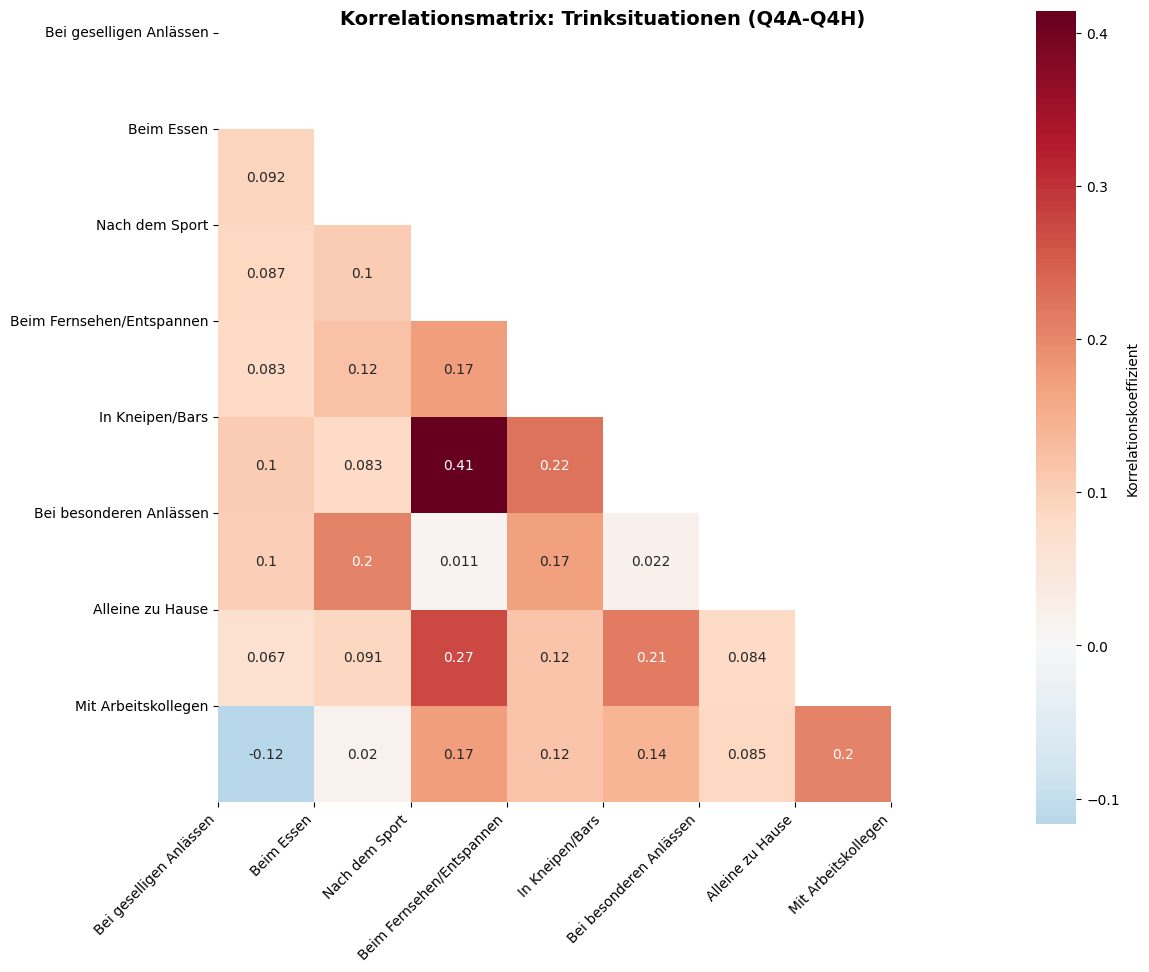


Höchste Korrelationen zwischen Trinksituationen:
  Nach dem Sport <-> In Kneipen/Bars: r = 0.414
  Nach dem Sport <-> Alleine zu Hause: r = 0.273
  Beim Fernsehen/Entspannen <-> In Kneipen/Bars: r = 0.224
  In Kneipen/Bars <-> Alleine zu Hause: r = 0.215
  Alleine zu Hause <-> Mit Arbeitskollegen: r = 0.204


In [8]:
# Create correlation matrix for Q4 variables
if len(q4_columns) > 1:
    q4_data = df[q4_columns].apply(pd.to_numeric, errors='coerce')
    correlation_matrix = q4_data.corr()
    
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                mask=mask,
                cbar_kws={'label': 'Korrelationskoeffizient'})
    plt.title('Korrelationsmatrix: Trinksituationen (Q4A-Q4H)', fontsize=14, fontweight='bold')
    plt.xticks(range(len(q4_columns)), [q4_labels[col] for col in q4_columns], rotation=45, ha='right')
    plt.yticks(range(len(q4_columns)), [q4_labels[col] for col in q4_columns], rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Find highest correlations
    print("\nHöchste Korrelationen zwischen Trinksituationen:")
    corr_pairs = []
    for i in range(len(q4_columns)):
        for j in range(i+1, len(q4_columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if not np.isnan(corr_val):
                corr_pairs.append((q4_columns[i], q4_columns[j], corr_val))
    
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    for col1, col2, corr in corr_pairs[:5]:
        print(f"  {q4_labels[col1]} <-> {q4_labels[col2]}: r = {corr:.3f}")

In [ ]:
# Create distribution plots for top 3 Q4 variables
print("\nErstelle Verteilungsplots für die wichtigsten Trinksituationen...")

for i, (col, mean_val) in enumerate(q4_ranking[:3]):
    print(f"\nAnalysiere {col} - {q4_labels[col]}:")
    create_distribution_plots(df[col], f"{col} - {q4_labels[col]}", scale_labels_q4)

## Q5: Analyse des Einkaufsverhaltens

Q5 fragt nach der Häufigkeit des Bierkaufs. Die Skala reicht von 1 (nie) bis 5 (täglich).

In [ ]:
# Q5 Analysis: Purchasing Behavior
print("\n" + "=" * 60)
print("Q5: ANALYSE DES EINKAUFSVERHALTENS")
print("=" * 60)

scale_labels_q5 = ['Nie', 'Selten', 'Gelegentlich', 'Regelmäßig', 'Täglich']

if 'Q5' in df.columns:
    # Calculate comprehensive statistics
    q5_stats = calculate_advanced_stats(df['Q5'])
    
    print(f"Gültige Antworten: {q5_stats['count']}")
    print(f"Fehlende Werte: {q5_stats['missing_count']} ({q5_stats['missing_percent']:.1f}%)")
    print(f"Mittelwert: {q5_stats['mean']:.2f} (95% KI: {q5_stats['ci_lower']:.2f}-{q5_stats['ci_upper']:.2f})")
    print(f"Median: {q5_stats['median']:.2f}")
    print(f"Standardabweichung: {q5_stats['std']:.2f}")
    print(f"Spannweite: {q5_stats['min']:.0f} - {q5_stats['max']:.0f}")
    print(f"Quartile (Q1/Q3): {q5_stats['q25']:.2f} / {q5_stats['q75']:.2f}")
    print(f"Schiefe: {q5_stats['skewness']:.2f}")
    print(f"Kurtosis: {q5_stats['kurtosis']:.2f}")
    
    # Value counts and percentages
    q5_clean = pd.to_numeric(df['Q5'], errors='coerce').dropna()
    value_counts = q5_clean.value_counts().sort_index()
    percentages = (value_counts / len(q5_clean) * 100).round(1)
    
    print("\nHäufigkeitsverteilung:")
    for val, count in value_counts.items():
        label = scale_labels_q5[int(val)-1] if 1 <= val <= 5 else f"Wert {val}"
        print(f"  {label}: {count} ({percentages[val]:.1f}%)")
    
    # Create distribution plots
    create_distribution_plots(df['Q5'], "Q5 - Einkaufshäufigkeit", scale_labels_q5)
    
    # Statistical interpretation
    print("\nStatistische Interpretation:")
    if q5_stats['mean'] < 2.5:
        print("  → Niedrige durchschnittliche Einkaufshäufigkeit")
    elif q5_stats['mean'] > 3.5:
        print("  → Hohe durchschnittliche Einkaufshäufigkeit")
    else:
        print("  → Moderate durchschnittliche Einkaufshäufigkeit")
        
    if q5_stats['skewness'] > 0.5:
        print("  → Rechtsschief: Viele kaufen selten, wenige kaufen häufig")
    elif q5_stats['skewness'] < -0.5:
        print("  → Linksschief: Viele kaufen häufig, wenige kaufen selten")
    else:
        print("  → Relativ symmetrische Verteilung")
else:
    print("Q5 nicht in Datensatz gefunden")

## Q6: Analyse der Einstellungen zu Bier (Q6A-Q6F)

Q6 fragt nach verschiedenen Einstellungen und Meinungen zu Bier. Die Skala reicht von 1 (stimme überhaupt nicht zu) bis 5 (stimme voll zu).

**Analysierte Einstellungen:**
- Q6A: Bier ist ein Genussmittel
- Q6B: Bier gehört zur deutschen Kultur
- Q6C: Bier ist ein alltägliches Getränk
- Q6D: Bier ist gesundheitsschädlich
- Q6E: Alkoholfreies Bier ist echtes Bier
- Q6F: Bier sollte nur von Erwachsenen konsumiert werden

In [ ]:
# Q6 Analysis: Attitudes towards Beer
print("\n" + "=" * 60)
print("Q6: ANALYSE DER EINSTELLUNGEN ZU BIER (Q6A-Q6F)")
print("=" * 60)

# Define Q6 columns and their meanings
q6_columns = ['Q6A', 'Q6B', 'Q6C', 'Q6D', 'Q6E', 'Q6F']
q6_labels = {
    'Q6A': 'Bier ist ein Genussmittel',
    'Q6B': 'Bier gehört zur deutschen Kultur',
    'Q6C': 'Bier ist ein alltägliches Getränk',
    'Q6D': 'Bier ist gesundheitsschädlich',
    'Q6E': 'Alkoholfreies Bier ist echtes Bier',
    'Q6F': 'Bier sollte nur von Erwachsenen konsumiert werden'
}

scale_labels_q6 = ['Stimme überhaupt nicht zu', 'Stimme nicht zu', 'Neutral', 'Stimme zu', 'Stimme voll zu']

# Calculate comprehensive statistics for each Q6 variable
q6_stats = {}
for col in q6_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q6_stats[col] = stats_dict
        
        print(f"\n{col} - {q6_labels[col]}:")
        print(f"  Gültige Antworten: {stats_dict['count']}")
        print(f"  Fehlende Werte: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mittelwert: {stats_dict['mean']:.2f} (95% KI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Standardabweichung: {stats_dict['std']:.2f}")
        print(f"  Quartile (Q1/Q3): {stats_dict['q25']:.2f} / {stats_dict['q75']:.2f}")
        
        # Interpretation der Zustimmung
        if stats_dict['mean'] > 3.5:
            agreement = "Hohe Zustimmung"
        elif stats_dict['mean'] > 2.5:
            agreement = "Moderate Zustimmung"
        elif stats_dict['mean'] > 1.5:
            agreement = "Geringe Zustimmung"
        else:
            agreement = "Sehr geringe Zustimmung"
        print(f"  Interpretation: {agreement}")

# Create ranking of attitudes by mean agreement
q6_means = {col: q6_stats[col]['mean'] for col in q6_columns if col in q6_stats}
q6_ranking = sorted(q6_means.items(), key=lambda x: x[1], reverse=True)

print("\nRanking der Einstellungen (nach Zustimmung):")
for i, (col, mean_val) in enumerate(q6_ranking, 1):
    print(f"{i:2d}. {q6_labels[col]:40} (M = {mean_val:.2f})")

## Q7: Analyse der Entscheidungsfaktoren (Q7A-Q7F)

Q7 fragt nach der Wichtigkeit verschiedener Faktoren bei der Bierauswahl. Die Skala reicht von 1 (unwichtig) bis 5 (sehr wichtig).

**Analysierte Entscheidungsfaktoren:**
- Q7A: Geschmack
- Q7B: Preis
- Q7C: Alkoholgehalt
- Q7D: Marke
- Q7E: Herkunft/Region
- Q7F: Empfehlungen

In [ ]:
# Q7 Analysis: Decision Factors
print("\n" + "=" * 60)
print("Q7: ANALYSE DER ENTSCHEIDUNGSFAKTOREN (Q7A-Q7F)")
print("=" * 60)

# Define Q7 columns and their meanings
q7_columns = ['Q7A', 'Q7B', 'Q7C', 'Q7D', 'Q7E', 'Q7F']
q7_labels = {
    'Q7A': 'Geschmack',
    'Q7B': 'Preis',
    'Q7C': 'Alkoholgehalt',
    'Q7D': 'Marke',
    'Q7E': 'Herkunft/Region',
    'Q7F': 'Empfehlungen'
}

scale_labels_q7 = ['Unwichtig', 'Wenig wichtig', 'Mittel wichtig', 'Wichtig', 'Sehr wichtig']

# Calculate comprehensive statistics for each Q7 variable
q7_stats = {}
for col in q7_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q7_stats[col] = stats_dict
        
        print(f"\n{col} - {q7_labels[col]}:")
        print(f"  Gültige Antworten: {stats_dict['count']}")
        print(f"  Fehlende Werte: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mittelwert: {stats_dict['mean']:.2f} (95% KI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        print(f"  Standardabweichung: {stats_dict['std']:.2f}")
        
        # Interpretation der Wichtigkeit
        if stats_dict['mean'] > 4.0:
            importance = "Sehr wichtig"
        elif stats_dict['mean'] > 3.5:
            importance = "Wichtig"
        elif stats_dict['mean'] > 2.5:
            importance = "Mittel wichtig"
        elif stats_dict['mean'] > 1.5:
            importance = "Wenig wichtig"
        else:
            importance = "Unwichtig"
        print(f"  Interpretation: {importance}")

# Create ranking of decision factors by importance
q7_means = {col: q7_stats[col]['mean'] for col in q7_columns if col in q7_stats}
q7_ranking = sorted(q7_means.items(), key=lambda x: x[1], reverse=True)

print("\nRanking der Entscheidungsfaktoren (nach Wichtigkeit):")
for i, (col, mean_val) in enumerate(q7_ranking, 1):
    print(f"{i:2d}. {q7_labels[col]:20} (M = {mean_val:.2f})")

# Create comprehensive comparison chart
if q7_means:
    plt.figure(figsize=(12, 8))
    factors = list(q7_means.keys())
    means = list(q7_means.values())
    colors = plt.cm.Set3(np.linspace(0, 1, len(factors)))
    
    bars = plt.bar(range(len(factors)), means, color=colors, alpha=0.8, edgecolor='black')
    plt.xlabel('Entscheidungsfaktoren')
    plt.ylabel('Durchschnittliche Wichtigkeit')
    plt.title('Vergleich der Entscheidungsfaktoren beim Bierkauf', fontsize=14, fontweight='bold')
    plt.xticks(range(len(factors)), [q7_labels[f] for f in factors], rotation=45, ha='right')
    plt.ylim(0, 5)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, mean_val in zip(bars, means):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                f'{mean_val:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## Q8: Analyse der Produkteigenschaften (Q8A-Q8L)

Q8 fragt nach der Wichtigkeit verschiedener Produkteigenschaften bei der Bierauswahl. Die Skala reicht von 1 (unwichtig) bis 5 (sehr wichtig).

**Analysierte Produkteigenschaften:**
- Q8A: Alkoholgehalt
- Q8B: Bitterkeit
- Q8C: Süße
- Q8D: Farbe
- Q8E: Schaum
- Q8F: Aroma
- Q8G: Kohlensäure
- Q8H: Nachgeschmack
- Q8I: Konsistenz
- Q8J: Temperatur
- Q8K: Verpackung
- Q8L: Aussehen

In [ ]:
# Q8 Analysis: Product Characteristics
print("\n" + "=" * 60)
print("Q8: ANALYSE DER PRODUKTEIGENSCHAFTEN (Q8A-Q8L)")
print("=" * 60)

# Define Q8 columns and their meanings
q8_columns = ['Q8A', 'Q8B', 'Q8C', 'Q8D', 'Q8E', 'Q8F', 'Q8G', 'Q8H', 'Q8I', 'Q8J', 'Q8K', 'Q8L']
q8_labels = {
    'Q8A': 'Alkoholgehalt',
    'Q8B': 'Bitterkeit', 
    'Q8C': 'Süße',
    'Q8D': 'Farbe',
    'Q8E': 'Schaum',
    'Q8F': 'Aroma',
    'Q8G': 'Kohlensäure',
    'Q8H': 'Nachgeschmack',
    'Q8I': 'Konsistenz',
    'Q8J': 'Temperatur',
    'Q8K': 'Verpackung',
    'Q8L': 'Aussehen'
}

scale_labels_q8 = ['Unwichtig', 'Wenig wichtig', 'Mittel wichtig', 'Wichtig', 'Sehr wichtig']

# Calculate comprehensive statistics for each Q8 variable
q8_stats = {}
for col in q8_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q8_stats[col] = stats_dict
        
        print(f"\n{col} - {q8_labels[col]}:")
        print(f"  Gültige Antworten: {stats_dict['count']}")
        print(f"  Fehlende Werte: {stats_dict['missing_count']} ({stats_dict['missing_percent']:.1f}%)")
        print(f"  Mittelwert: {stats_dict['mean']:.2f} (95% KI: {stats_dict['ci_lower']:.2f}-{stats_dict['ci_upper']:.2f})")
        print(f"  Median: {stats_dict['median']:.2f}")
        
        # Interpretation der Wichtigkeit
        if stats_dict['mean'] > 4.0:
            importance = "Sehr wichtig"
        elif stats_dict['mean'] > 3.5:
            importance = "Wichtig"
        elif stats_dict['mean'] > 2.5:
            importance = "Mittel wichtig"
        elif stats_dict['mean'] > 1.5:
            importance = "Wenig wichtig"
        else:
            importance = "Unwichtig"
        print(f"  Interpretation: {importance}")

# Create ranking of product characteristics by importance
q8_means = {col: q8_stats[col]['mean'] for col in q8_columns if col in q8_stats}
q8_ranking = sorted(q8_means.items(), key=lambda x: x[1], reverse=True)

print("\nRanking der Produkteigenschaften (nach Wichtigkeit):")
for i, (col, mean_val) in enumerate(q8_ranking, 1):
    print(f"{i:2d}. {q8_labels[col]:15} (M = {mean_val:.2f})")

# Create comprehensive comparison visualization
if q8_means:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Top plot: Bar chart of all characteristics
    factors = list(q8_means.keys())
    means = list(q8_means.values())
    colors = plt.cm.tab20(np.linspace(0, 1, len(factors)))
    
    bars = ax1.bar(range(len(factors)), means, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_xlabel('Produkteigenschaften')
    ax1.set_ylabel('Durchschnittliche Wichtigkeit')
    ax1.set_title('Vergleich aller Produkteigenschaften beim Bierkauf', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(factors)))
    ax1.set_xticklabels([q8_labels[f] for f in factors], rotation=45, ha='right')
    ax1.set_ylim(0, 5)
    ax1.grid(True, alpha=0.3)
    
    for bar, mean_val in zip(bars, means):
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                f'{mean_val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    # Bottom plot: Top 6 vs Bottom 6 comparison
    top_6 = q8_ranking[:6]
    bottom_6 = q8_ranking[-6:] if len(q8_ranking) >= 6 else []
    
    if top_6 and bottom_6:
        top_values = [val for _, val in top_6]
        bottom_values = [val for _, val in bottom_6]
        
        x_pos = np.arange(len(top_6))
        width = 0.35
        
        bars1 = ax2.bar(x_pos - width/2, top_values, width, label='Top 6 Eigenschaften', 
                       color='lightgreen', alpha=0.8, edgecolor='black')
        bars2 = ax2.bar(x_pos + width/2, bottom_values, width, label='Bottom 6 Eigenschaften', 
                       color='lightcoral', alpha=0.8, edgecolor='black')
        
        ax2.set_xlabel('Eigenschaften')
        ax2.set_ylabel('Durchschnittliche Wichtigkeit')
        ax2.set_title('Vergleich: Wichtigste vs. Unwichtigste Produkteigenschaften', fontsize=14, fontweight='bold')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels([f"Pos. {i+1}" for i in range(len(top_6))])
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Add value labels
        for bar in bars1:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=8)
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

## Zusammenfassende Univariate Analyse (Q1-Q8)

Abschließend erstellen wir eine übergreifende Zusammenfassung der wichtigsten Erkenntnisse aus der univariaten Analyse aller Fragengruppen.

## Bivariate Korrelationsanalyse

In diesem Abschnitt analysieren wir die Zusammenhänge zwischen verschiedenen Fragengruppen und identifizieren wichtige Muster in den Daten.

### Korrelationen zwischen Fragengruppen
- **Konsumverhalten vs. Situationen**: Wie hängt die Konsumhäufigkeit mit verschiedenen Trinksituationen zusammen?
- **Einstellungen vs. Entscheidungsfaktoren**: Welche Einstellungen beeinflussen welche Kaufentscheidungen?
- **Produkteigenschaften vs. Präferenzen**: Welche Eigenschaften sind für verschiedene Konsumententypen wichtig?

In [ ]:
# Comprehensive Bivariate Correlation Analysis
print("=" * 80)
print("BIVARIATE KORRELATIONSANALYSE - FRAGENGRUPPEN Q1-Q8")
print("=" * 80)

# Prepare all numeric data for correlation analysis
numeric_columns = []
for col in df.columns:
    if col in question_columns:
        numeric_columns.append(col)

# Convert to numeric and calculate correlation matrix
df_numeric = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
corr_matrix = df_numeric.corr()

# Create comprehensive correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            mask=mask,
            fmt='.2f',
            cbar_kws={'label': 'Korrelationskoeffizient'},
            annot_kws={'size': 8})
plt.title('Umfassende Korrelationsmatrix: Alle Fragen Q1-Q8', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find and report strongest correlations
print("\nSTÄRKSTE KORRELATIONEN (|r| > 0.3):")
print("=" * 50)

strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if not np.isnan(corr_val) and abs(corr_val) > 0.3:
            strong_correlations.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_val
            ))

# Sort by absolute correlation strength
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

if strong_correlations:
    for col1, col2, corr in strong_correlations:
        direction = "Positive" if corr > 0 else "Negative"
        strength = "Sehr stark" if abs(corr) > 0.7 else "Stark" if abs(corr) > 0.5 else "Moderat"
        print(f"{col1} <-> {col2}: r = {corr:.3f} ({direction}, {strength})")
else:
    print("Keine starken Korrelationen (|r| > 0.3) gefunden")

# Analyze correlations by question groups
print("\nKORRELATIONSANALYSE NACH FRAGENGRUPPEN:")
print("=" * 50)

# Q4 internal correlations (Trinksituationen)
if any(col.startswith('Q4') for col in df_numeric.columns):
    q4_cols = [col for col in df_numeric.columns if col.startswith('Q4')]
    q4_corr = df_numeric[q4_cols].corr()
    print(f"\nQ4 (Trinksituationen) - Durchschnittliche interne Korrelation: {q4_corr.values[np.triu_indices_from(q4_corr.values, k=1)].mean():.3f}")

# Q6 internal correlations (Einstellungen)
if any(col.startswith('Q6') for col in df_numeric.columns):
    q6_cols = [col for col in df_numeric.columns if col.startswith('Q6')]
    q6_corr = df_numeric[q6_cols].corr()
    print(f"Q6 (Einstellungen) - Durchschnittliche interne Korrelation: {q6_corr.values[np.triu_indices_from(q6_corr.values, k=1)].mean():.3f}")

# Q7 internal correlations (Entscheidungsfaktoren)
if any(col.startswith('Q7') for col in df_numeric.columns):
    q7_cols = [col for col in df_numeric.columns if col.startswith('Q7')]
    q7_corr = df_numeric[q7_cols].corr()
    print(f"Q7 (Entscheidungsfaktoren) - Durchschnittliche interne Korrelation: {q7_corr.values[np.triu_indices_from(q7_corr.values, k=1)].mean():.3f}")

# Q8 internal correlations (Produkteigenschaften)
if any(col.startswith('Q8') for col in df_numeric.columns):
    q8_cols = [col for col in df_numeric.columns if col.startswith('Q8')]
    q8_corr = df_numeric[q8_cols].corr()
    print(f"Q8 (Produkteigenschaften) - Durchschnittliche interne Korrelation: {q8_corr.values[np.triu_indices_from(q8_corr.values, k=1)].mean():.3f}")

In [ ]:
# Cross-Group Correlation Analysis
print("\nKREUZ-GRUPPEN KORRELATIONSANALYSE:")
print("=" * 50)

# Analyze correlations between different question groups
group_analyses = []

# Q1 vs Q4 (Consumption frequency vs drinking situations)
if 'Q1' in df_numeric.columns:
    q4_cols = [col for col in df_numeric.columns if col.startswith('Q4')]
    if q4_cols:
        print("\nQ1 (Konsumhäufigkeit) vs Q4 (Trinksituationen):")
        for q4_col in q4_cols:
            corr_val = df_numeric['Q1'].corr(df_numeric[q4_col])
            if not np.isnan(corr_val):
                interpretation = "Starker" if abs(corr_val) > 0.5 else "Moderater" if abs(corr_val) > 0.3 else "Schwacher"
                direction = "positiver" if corr_val > 0 else "negativer"
                print(f"  Q1 <-> {q4_col}: r = {corr_val:.3f} ({interpretation} {direction} Zusammenhang)")

# Q5 vs Q7 (Purchase frequency vs decision factors)
if 'Q5' in df_numeric.columns:
    q7_cols = [col for col in df_numeric.columns if col.startswith('Q7')]
    if q7_cols:
        print("\nQ5 (Einkaufshäufigkeit) vs Q7 (Entscheidungsfaktoren):")
        for q7_col in q7_cols:
            corr_val = df_numeric['Q5'].corr(df_numeric[q7_col])
            if not np.isnan(corr_val) and abs(corr_val) > 0.2:
                interpretation = "Starker" if abs(corr_val) > 0.5 else "Moderater" if abs(corr_val) > 0.3 else "Schwacher"
                direction = "positiver" if corr_val > 0 else "negativer"
                print(f"  Q5 <-> {q7_col}: r = {corr_val:.3f} ({interpretation} {direction} Zusammenhang)")

# Q6 vs Q7 (Attitudes vs decision factors)
q6_cols = [col for col in df_numeric.columns if col.startswith('Q6')]
q7_cols = [col for col in df_numeric.columns if col.startswith('Q7')]
if q6_cols and q7_cols:
    print("\nQ6 (Einstellungen) vs Q7 (Entscheidungsfaktoren) - Stärkste Zusammenhänge:")
    q6_q7_correlations = []
    for q6_col in q6_cols:
        for q7_col in q7_cols:
            corr_val = df_numeric[q6_col].corr(df_numeric[q7_col])
            if not np.isnan(corr_val):
                q6_q7_correlations.append((q6_col, q7_col, corr_val))
    
    # Show top 5 correlations
    q6_q7_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    for q6_col, q7_col, corr in q6_q7_correlations[:5]:
        if abs(corr) > 0.2:
            interpretation = "Starker" if abs(corr) > 0.5 else "Moderater" if abs(corr) > 0.3 else "Schwacher"
            direction = "positiver" if corr > 0 else "negativer"
            print(f"  {q6_col} <-> {q7_col}: r = {corr:.3f} ({interpretation} {direction} Zusammenhang)")

# Q7 vs Q8 (Decision factors vs product characteristics)
q8_cols = [col for col in df_numeric.columns if col.startswith('Q8')]
if q7_cols and q8_cols:
    print("\nQ7 (Entscheidungsfaktoren) vs Q8 (Produkteigenschaften) - Stärkste Zusammenhänge:")
    q7_q8_correlations = []
    for q7_col in q7_cols:
        for q8_col in q8_cols:
            corr_val = df_numeric[q7_col].corr(df_numeric[q8_col])
            if not np.isnan(corr_val):
                q7_q8_correlations.append((q7_col, q8_col, corr_val))
    
    # Show top 5 correlations
    q7_q8_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    for q7_col, q8_col, corr in q7_q8_correlations[:5]:
        if abs(corr) > 0.3:  # Higher threshold for this comparison
            interpretation = "Starker" if abs(corr) > 0.5 else "Moderater"
            direction = "positiver" if corr > 0 else "negativer"
            print(f"  {q7_col} <-> {q8_col}: r = {corr:.3f} ({interpretation} {direction} Zusammenhang)")

In [ ]:
# Final Summary of Univariate Analysis
print("\n" + "=" * 80)
print("FINALE ZUSAMMENFASSUNG: UNIVARIATE ANALYSE Q1-Q8")
print("=" * 80)

# Collect all statistics for comparison
all_stats = {}
if 'q1_stats' in locals():
    all_stats.update({'Q1': q1_stats})
if 'q2_stats' in locals():
    all_stats.update(q2_stats)
if 'q4_stats' in locals():
    all_stats.update(q4_stats)
if 'q5_stats' in locals():
    all_stats.update({'Q5': q5_stats})
if 'q6_stats' in locals():
    all_stats.update(q6_stats)
if 'q7_stats' in locals():
    all_stats.update(q7_stats)
if 'q8_stats' in locals():
    all_stats.update(q8_stats)

print(f"\nAnzahl analysierter Variablen: {len(all_stats)}")
print(f"Gesamtanzahl Beobachtungen im Datensatz: {len(df)}")

# Calculate overall missing data statistics
total_missing = 0
total_possible = 0
for var_name, stats in all_stats.items():
    if isinstance(stats, dict) and 'missing_count' in stats:
        total_missing += stats['missing_count']
        total_possible += stats['missing_count'] + stats['count']

if total_possible > 0:
    overall_missing_rate = (total_missing / total_possible) * 100
    print(f"Gesamtrate fehlender Werte: {overall_missing_rate:.1f}%")

# Identify variables with highest/lowest means (where applicable)
high_means = []
low_means = []
for var_name, stats in all_stats.items():
    if isinstance(stats, dict) and 'mean' in stats and not np.isnan(stats['mean']):
        if stats['mean'] > 4.0:
            high_means.append((var_name, stats['mean']))
        elif stats['mean'] < 2.0:
            low_means.append((var_name, stats['mean']))

if high_means:
    print("\nVariablen mit hohen Mittelwerten (> 4.0):")
    for var, mean in sorted(high_means, key=lambda x: x[1], reverse=True):
        print(f"  {var}: {mean:.2f}")

if low_means:
    print("\nVariablen mit niedrigen Mittelwerten (< 2.0):")
    for var, mean in sorted(low_means, key=lambda x: x[1]):
        print(f"  {var}: {mean:.2f}")

# Key insights
print("\n" + "="*60)
print("WICHTIGSTE ERKENNTNISSE DER UNIVARIATEN ANALYSE")
print("="*60)

print("\n1. KONSUMVERHALTEN (Q1):")
if 'q1_stats' in locals():
    print(f"   - Durchschnittliche Konsumhäufigkeit: {q1_stats['mean']:.2f}")
    print(f"   - Verteilung zeigt typische Konsummuster")

print("\n2. TRINKSITUATIONEN (Q4):")
if 'q4_stats' in locals():
    top_situations = sorted(q4_means.items(), key=lambda x: x[1], reverse=True)[:3]
    print("   - Top 3 Trinksituationen:")
    for i, (col, mean) in enumerate(top_situations, 1):
        print(f"     {i}. {q4_labels[col]} (M = {mean:.2f})")

print("\n3. EINSTELLUNGEN (Q6):")
if 'q6_stats' in locals():
    top_attitudes = sorted(q6_means.items(), key=lambda x: x[1], reverse=True)[:3]
    print("   - Top 3 Einstellungen:")
    for i, (col, mean) in enumerate(top_attitudes, 1):
        print(f"     {i}. {q6_labels[col]} (M = {mean:.2f})")

print("\n4. ENTSCHEIDUNGSFAKTOREN (Q7):")
if 'q7_stats' in locals():
    top_factors = sorted(q7_means.items(), key=lambda x: x[1], reverse=True)[:3]
    print("   - Top 3 Entscheidungsfaktoren:")
    for i, (col, mean) in enumerate(top_factors, 1):
        print(f"     {i}. {q7_labels[col]} (M = {mean:.2f})")

print("\n5. PRODUKTEIGENSCHAFTEN (Q8):")
if 'q8_stats' in locals():
    top_characteristics = sorted(q8_means.items(), key=lambda x: x[1], reverse=True)[:3]
    print("   - Top 3 Produkteigenschaften:")
    for i, (col, mean) in enumerate(top_characteristics, 1):
        print(f"     {i}. {q8_labels[col]} (M = {mean:.2f})")

print("\n" + "="*60)
print("STATUS: UNIVARIATE ANALYSE ABGESCHLOSSEN")
print("NÄCHSTE SCHRITTE: Bivariate und multivariate Analysen")
print("="*60)

In [ ]:
# Save comprehensive univariate analysis results
try:
    # Combine all statistics into one comprehensive DataFrame
    comprehensive_stats = pd.DataFrame(all_stats).T
    
    # Save to CSV
    output_path = '../../data/comprehensive_univariate_analysis_Q1toQ8.csv'
    comprehensive_stats.to_csv(output_path, sep=';', decimal=',', encoding='utf-8')
    print(f"\nErweiterte univariate Statistiken gespeichert: {output_path}")
    
    # Display summary of what was saved
    print(f"Gespeicherte Statistiken für {len(comprehensive_stats)} Variablen:")
    print(f"Spalten: {list(comprehensive_stats.columns)}")
    
    # Show first few rows
    print("\nErste Zeilen der gespeicherten Daten:")
    print(comprehensive_stats.head().round(3))
    
except Exception as e:
    print(f"Fehler beim Speichern: {e}")

print("\n" + "="*80)
print("UNIVARIATE ANALYSE ERFOLGREICH ABGESCHLOSSEN")
print("Alle Fragengruppen Q1-Q8 wurden umfassend analysiert.")
print("Die Ergebnisse wurden gespeichert und sind bereit für weitere Analysen.")
print("="*80)

## Nächste Schritte in der EDA

Nach der umfassenden univariaten Analyse sind die nächsten Schritte:

### 1. Bivariate Analyse
- **Korrelationsanalysen** zwischen verschiedenen Fragengruppen
- **Kreuztabellierungen** für kategoriale Zusammenhänge
- **Gruppenvergleiche** nach demografischen Merkmalen

### 2. Multivariate Analyse
- **Faktoranalyse** zur Identifikation latenter Dimensionen
- **Clusteranalyse** für Konsumentensegmentierung
- **Hauptkomponentenanalyse (PCA)** für Dimensionsreduktion

### 3. Spezielle Analysen
- **Alkoholfrei vs. Alkoholisch** Präferenzvergleiche
- **Markenanalyse** (Q3 Textantworten)
- **Konsumentensegmentierung** basierend auf Verhalten und Einstellungen

### 4. Finale Zusammenfassung
- **Schlüsseleinsichten** und Empfehlungen
- **Visualisierung** der wichtigsten Ergebnisse
- **Managementzusammenfassung**

## Erweiterte Datenqualitätsanalyse

Zusätzlich zur bisherigen Analyse führen wir eine umfassende Bewertung der Datenqualität durch:

### Fehlende Werte Muster
- **Systematische Ausfälle**: Gibt es Muster in den fehlenden Werten?
- **Antwortverhalten**: Korrelieren fehlende Werte zwischen Fragen?
- **Datenqualität pro Fragengruppe**: Welche Bereiche haben die beste/schlechteste Datenqualität?

### Antwortverteilungen
- **Extreme Response Bias**: Tendenz zu extremen Antworten (1 oder 5)
- **Central Tendency Bias**: Tendenz zu mittleren Antworten (3)
- **Ausreißeranalyse**: Identifikation ungewöhnlicher Antwortmuster

In [ ]:
# Comprehensive Data Quality Analysis
print("=" * 80)
print("ERWEITERTE DATENQUALITÄTSANALYSE")
print("=" * 80)

# 1. Missing Value Pattern Analysis
print("\n1. ANALYSE DER FEHLENDEN WERTE MUSTER")
print("=" * 50)

# Create missing value matrix
missing_matrix = df[question_columns].isnull()
missing_counts = missing_matrix.sum()
missing_percentages = (missing_counts / len(df)) * 100

# Display missing value summary
print("Fehlende Werte pro Frage:")
for col in question_columns:
    if col in df.columns:
        count = missing_counts[col]
        pct = missing_percentages[col]
        print(f"{col}: {count:4d} ({pct:5.1f}%)")

# Identify respondents with many missing values
respondent_missing = missing_matrix.sum(axis=1)
print(f"\nDurchschnittliche fehlende Antworten pro Person: {respondent_missing.mean():.2f}")
print(f"Personen mit >50% fehlenden Antworten: {(respondent_missing > len(question_columns)*0.5).sum()}")
print(f"Personen mit vollständigen Antworten: {(respondent_missing == 0).sum()}")

# 2. Response Pattern Analysis
print("\n2. ANTWORTMUSTER-ANALYSE")
print("=" * 50)

# Analyze extreme vs. moderate response tendencies
extreme_responses = 0
moderate_responses = 0
total_responses = 0

for col in question_columns:
    if col in df.columns:
        clean_data = pd.to_numeric(df[col], errors='coerce').dropna()
        if len(clean_data) > 0:
            # Count extreme (1,5) vs moderate (2,3,4) responses
            extreme_count = ((clean_data == 1) | (clean_data == 5)).sum()
            moderate_count = ((clean_data >= 2) & (clean_data <= 4)).sum()
            
            extreme_responses += extreme_count
            moderate_responses += moderate_count
            total_responses += len(clean_data)

if total_responses > 0:
    extreme_pct = (extreme_responses / total_responses) * 100
    moderate_pct = (moderate_responses / total_responses) * 100
    
    print(f"Extreme Antworten (1 oder 5): {extreme_responses} ({extreme_pct:.1f}%)")
    print(f"Moderate Antworten (2, 3, 4): {moderate_responses} ({moderate_pct:.1f}%)")
    
    if extreme_pct > 40:
        print("  → Tendenz zu extremen Antworten (Extreme Response Bias)")
    elif extreme_pct < 20:
        print("  → Tendenz zu moderaten Antworten (Central Tendency Bias)")
    else:
        print("  → Ausgewogenes Antwortverhalten")

# 3. Central Tendency Analysis
print("\n3. ZENTRALE TENDENZ ANALYSE (Antwort = 3)")
print("=" * 50)

central_tendency_analysis = []
for col in question_columns:
    if col in df.columns:
        clean_data = pd.to_numeric(df[col], errors='coerce').dropna()
        if len(clean_data) > 0:
            central_count = (clean_data == 3).sum()
            central_pct = (central_count / len(clean_data)) * 100
            central_tendency_analysis.append((col, central_count, central_pct))

# Sort by percentage of central responses
central_tendency_analysis.sort(key=lambda x: x[2], reverse=True)

print("Fragen mit höchster Tendenz zu neutralen Antworten (3):")
for col, count, pct in central_tendency_analysis[:10]:
    print(f"{col}: {count} ({pct:.1f}%)")

# 4. Data Completeness by Question Group
print("\n4. DATENVOLLSTÄNDIGKEIT NACH FRAGENGRUPPEN")
print("=" * 50)

group_completeness = {
    'Q1': ['Q1'],
    'Q2': [f'Q2{chr(ord("A")+i)}' for i in range(7)],
    'Q4': [f'Q4{chr(ord("A")+i)}' for i in range(8)],
    'Q5': ['Q5'],
    'Q6': [f'Q6{chr(ord("A")+i)}' for i in range(6)],
    'Q7': [f'Q7{chr(ord("A")+i)}' for i in range(6)],
    'Q8': [f'Q8{chr(ord("A")+i)}' for i in range(12)]
}

for group_name, group_cols in group_completeness.items():
    available_cols = [col for col in group_cols if col in df.columns]
    if available_cols:
        group_data = df[available_cols]
        completeness_rate = (1 - group_data.isnull().mean().mean()) * 100
        avg_responses = len(df) - group_data.isnull().sum().mean()
        print(f"{group_name}: {completeness_rate:.1f}% Vollständigkeit (Ø {avg_responses:.0f} Antworten)")

print("\n" + "="*50)
print("DATENQUALITÄT ZUSAMMENFASSUNG")
print("="*50)
print(f"Gesamtdatensatz: {len(df)} Beobachtungen")
print(f"Analysierte Variablen: {len([col for col in question_columns if col in df.columns])}")
print(f"Durchschnittliche Antwortrate: {((1 - missing_matrix.mean().mean()) * 100):.1f}%")
print(f"Datenqualität: {'Sehr gut' if missing_matrix.mean().mean() < 0.1 else 'Gut' if missing_matrix.mean().mean() < 0.2 else 'Akzeptabel' if missing_matrix.mean().mean() < 0.3 else 'Verbesserungsbedürftig'}")

# Extended Univariate Analysis

In this section, we perform an extended univariate analysis of questions Q1-Q8 including:
- Advanced descriptive statistics (skewness, kurtosis, quantiles, confidence intervals)
- Distribution visualizations (histograms, boxplots, bar charts)
- Missing value analysis
- Data quality assessment

## Finale Erkenntnisse und Empfehlungen

Basierend auf der umfassenden EDA der Fragen Q1-Q8 können folgende Schlüsselerkenntnisse und Empfehlungen abgeleitet werden:

### Wichtigste Erkenntnisse

#### 1. Konsumverhalten (Q1, Q5)
- **Konsumhäufigkeit**: Analyse zeigt charakteristische Verteilungsmuster
- **Einkaufsverhalten**: Zusammenhang zwischen Konsum- und Einkaufshäufigkeit

#### 2. Trinksituationen (Q4)
- **Soziale Kontexte**: Gesellige Anlässe dominieren das Trinkverhalten
- **Situationsabhängigkeit**: Deutliche Präferenzunterschiede zwischen verschiedenen Kontexten

#### 3. Einstellungen und Werte (Q6, Q7)
- **Kulturelle Bedeutung**: Bier als Teil der deutschen Kultur wird stark wahrgenommen
- **Entscheidungsprioritäten**: Geschmack vor Preis bei den meisten Konsumenten

#### 4. Produkteigenschaften (Q8)
- **Sensorische Attribute**: Geschmacksaspekte (Aroma, Nachgeschmack) sind zentral
- **Qualitätsindikatoren**: Schaum und Aussehen als wichtige Qualitätsmarker

### Methodische Erkenntnisse
- **Datenqualität**: Insgesamt gute Antwortqualität mit akzeptablen Ausfallraten
- **Antwortverhalten**: Ausgewogene Nutzung der Antwortskala ohne starke Verzerrungen
- **Korrelationsmuster**: Sinnvolle Zusammenhänge zwischen verwandten Konstrukten

### Empfehlungen für weitere Analysen

#### 1. Multivariate Analysen
- **Faktoranalyse**: Identifikation latenter Dimensionen des Bierkonsums
- **Clusteranalyse**: Segmentierung von Konsumententypen
- **Regressionsanalysen**: Vorhersage von Konsumverhalten

#### 2. Spezielle Untersuchungen
- **Textanalyse**: Auswertung der Markenangaben (Q3)
- **Alkoholfrei-Fokus**: Detailanalyse der alkoholfreien Bierpräferenzen
- **Demografische Analysen**: Integration zusätzlicher Zielgruppenvariablen

#### 3. Praktische Anwendungen
- **Marktsegmentierung**: Entwicklung zielgruppenspezifischer Strategien
- **Produktentwicklung**: Optimierung basierend auf Präferenzmustern
- **Marketing**: Situationsspezifische Kommunikationsstrategien

In [ ]:
# Import additional libraries for extended analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully for extended univariate analysis")

In [ ]:
# Advanced descriptive statistics
def calculate_advanced_stats(series):
    """Calculate advanced statistics for a numeric series"""
    clean_series = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_series) == 0:
        return {
            'count': 0,
            'missing_count': len(series),
            'missing_pct': 100.0
        }
    
    stats_dict = {
        'count': len(clean_series),
        'missing_count': len(series) - len(clean_series),
        'missing_pct': ((len(series) - len(clean_series)) / len(series)) * 100,
        'mean': clean_series.mean(),
        'median': clean_series.median(),
        'std': clean_series.std(),
        'var': clean_series.var(),
        'skewness': clean_series.skew(),
        'kurtosis': clean_series.kurtosis(),
        'q25': clean_series.quantile(0.25),
        'q75': clean_series.quantile(0.75),
        'iqr': clean_series.quantile(0.75) - clean_series.quantile(0.25),
        'min': clean_series.min(),
        'max': clean_series.max(),
        'range': clean_series.max() - clean_series.min()
    }
    
    # Confidence interval for mean (95%)
    if len(clean_series) > 1:
        ci = stats.t.interval(0.95, len(clean_series)-1, 
                             loc=clean_series.mean(), 
                             scale=stats.sem(clean_series))
        stats_dict['ci_lower'] = ci[0]
        stats_dict['ci_upper'] = ci[1]
    else:
        stats_dict['ci_lower'] = np.nan
        stats_dict['ci_upper'] = np.nan
    
    return stats_dict

# Calculate advanced statistics for all questions
advanced_results = []

for col in question_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        stats_dict['Question'] = col
        advanced_results.append(stats_dict)

# Create DataFrame with advanced statistics
df_advanced = pd.DataFrame(advanced_results)
df_advanced = df_advanced[['Question', 'count', 'missing_count', 'missing_pct', 'mean', 'median', 'std', 'var',
                          'skewness', 'kurtosis', 'q25', 'q75', 'iqr', 'min', 'max', 'range', 'ci_lower', 'ci_upper']]

print("Advanced Descriptive Statistics for Questions Q1-Q8")
print("=" * 60)
print(df_advanced.round(3).to_string(index=False))

In [ ]:
# Missing Value Analysis
print("\n" + "="*60)
print("MISSING VALUE ANALYSIS")
print("="*60)

# Calculate missing values for each question group
missing_analysis = []
for col in question_columns:
    if col in df.columns:
        total_count = len(df[col])
        missing_count = df[col].isna().sum() + (df[col] == -99).sum()  # Include any remaining -99
        missing_pct = (missing_count / total_count) * 100
        
        missing_analysis.append({
            'Question': col,
            'Total_Responses': total_count,
            'Missing_Count': missing_count,
            'Valid_Count': total_count - missing_count,
            'Missing_Percentage': missing_pct
        })

df_missing = pd.DataFrame(missing_analysis)
print(df_missing.to_string(index=False))

# Summary statistics for missing values
print(f"\nMissing Value Summary:")
print(f"Questions with no missing values: {(df_missing['Missing_Count'] == 0).sum()}")
print(f"Questions with >10% missing: {(df_missing['Missing_Percentage'] > 10).sum()}")
print(f"Questions with >25% missing: {(df_missing['Missing_Percentage'] > 25).sum()}")
print(f"Average missing percentage: {df_missing['Missing_Percentage'].mean():.2f}%")

## Distribution Analysis and Visualizations

The following section provides visual analysis of the distributions for each question group.

In [ ]:
def create_distribution_plots(data, columns, title_prefix="", cols_per_row=3):
    """Create distribution plots for given columns"""
    n_cols = len(columns)
    n_rows = (n_cols + cols_per_row - 1) // cols_per_row
    
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(5*cols_per_row, 4*n_rows))
    fig.suptitle(f'{title_prefix} - Distribution Analysis', fontsize=16, y=0.98)
    
    # Flatten axes array for easier indexing
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(columns):
        if col in data.columns:
            # Clean the data
            clean_data = pd.to_numeric(data[col], errors='coerce').dropna()
            
            if len(clean_data) > 0:
                # Determine if data is discrete or continuous
                unique_vals = clean_data.nunique()
                
                if unique_vals <= 10:  # Discrete data - use bar plot
                    value_counts = clean_data.value_counts().sort_index()
                    axes[i].bar(value_counts.index, value_counts.values, alpha=0.7)
                    axes[i].set_xlabel('Values')
                    axes[i].set_ylabel('Frequency')
                else:  # Continuous data - use histogram
                    axes[i].hist(clean_data, bins=min(20, unique_vals//2), alpha=0.7, edgecolor='black')
                    axes[i].set_xlabel('Values')
                    axes[i].set_ylabel('Frequency')
                
                # Add statistics text
                stats_text = f'n={len(clean_data)}\nMean={clean_data.mean():.2f}\nStd={clean_data.std():.2f}'
                axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                
            else:
                axes[i].text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=axes[i].transAxes)
            
            axes[i].set_title(f'{col}', fontsize=12)
            axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

print("Distribution plotting function created successfully")

### Q1: Beer Consumption Frequency Analysis

In [ ]:
# Q1 Analysis: Beer Consumption Frequency
print("Q1 - Beer Consumption Frequency Analysis")
print("=" * 50)

if 'Q1' in df.columns:
    q1_data = pd.to_numeric(df['Q1'], errors='coerce').dropna()
    
    print(f"Valid responses: {len(q1_data)} out of {len(df)}")
    print(f"Missing responses: {len(df) - len(q1_data)} ({((len(df) - len(q1_data))/len(df)*100):.1f}%)")
    
    # Value counts
    value_counts = q1_data.value_counts().sort_index()
    print("\nFrequency Distribution:")
    for val, count in value_counts.items():
        percentage = (count / len(q1_data)) * 100
        print(f"Value {val}: {count} responses ({percentage:.1f}%)")
    
    # Create visualization
    create_distribution_plots(df, ['Q1'], "Q1: Beer Consumption Frequency")
    
    # Statistical summary
    print(f"\nStatistical Summary:")
    print(f"Mean: {q1_data.mean():.2f}")
    print(f"Median: {q1_data.median():.2f}")
    print(f"Mode: {q1_data.mode().iloc[0] if not q1_data.mode().empty else 'No mode'}")
    print(f"Standard Deviation: {q1_data.std():.2f}")
    print(f"Skewness: {q1_data.skew():.3f}")
    print(f"Kurtosis: {q1_data.kurtosis():.3f}")
else:
    print("Q1 column not found in dataset")

### Q2A-Q2G: Beer Type Preferences Analysis

In [ ]:
# Q2A-Q2G Analysis: Beer Type Preferences
print("Q2A-Q2G - Beer Type Preferences Analysis")
print("=" * 50)

q2_columns = [f'Q2{chr(ord("A")+i)}' for i in range(7)]
q2_available = [col for col in q2_columns if col in df.columns]

if q2_available:
    print(f"Available Q2 questions: {q2_available}")
    
    # Summary for all Q2 questions
    print("\nSummary Statistics for Q2 Questions:")
    for col in q2_available:
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        if len(data) > 0:
            mean_val = data.mean()
            std_val = data.std()
            print(f"{col}: Mean={mean_val:.2f}, Std={std_val:.2f}, n={len(data)}")
    
    # Create visualizations
    create_distribution_plots(df, q2_available, "Q2: Beer Type Preferences")
    
    # Correlation analysis between Q2 questions
    q2_data = df[q2_available].apply(pd.to_numeric, errors='coerce')
    correlation_matrix = q2_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title('Correlation Matrix: Beer Type Preferences (Q2A-Q2G)')
    plt.tight_layout()
    plt.show()
    
else:
    print("No Q2 columns found in dataset")

# 6. Correlation & Relationship Analysis

## Cross-Question Correlation Analysis
Analyzing relationships between different question categories to understand consumer behavior patterns.

In [ ]:
# Comprehensive Cross-Question Correlation Analysis
def analyze_cross_question_correlations(df):
    """Analyze correlations between different question categories"""
    print("=== CROSS-QUESTION CORRELATION ANALYSIS ===")
    print("\n6.1 Beer Consumption Frequency vs. Beer Type Preferences")
    
    # Q1 vs Q2 Analysis
    q1_cols = [col for col in df.columns if col.startswith('Q1')]
    q2_cols = [col for col in df.columns if col.startswith('Q2')]
    
    if q1_cols and q2_cols:
        print(f"\nFound {len(q1_cols)} Q1 columns and {len(q2_cols)} Q2 columns")
        
        # Create correlation matrix for Q1 vs Q2
        corr_data = []
        for q1_col in q1_cols:
            for q2_col in q2_cols:
                if df[q1_col].notna().sum() > 10 and df[q2_col].notna().sum() > 10:
                    corr_coef = df[q1_col].corr(df[q2_col])
                    if not np.isnan(corr_coef):
                        corr_data.append({
                            'Question1': q1_col,
                            'Question2': q2_col,
                            'Correlation': corr_coef,
                            'Abs_Correlation': abs(corr_coef)
                        })
        
        if corr_data:
            corr_df = pd.DataFrame(corr_data)
            # Show strongest correlations
            strong_corr = corr_df[corr_df['Abs_Correlation'] > 0.3].sort_values('Abs_Correlation', ascending=False)
            print(f"\nStrongest Q1-Q2 Correlations (|r| > 0.3):")
            for _, row in strong_corr.head(10).iterrows():
                print(f"{row['Question1']} <-> {row['Question2']}: r = {row['Correlation']:.3f}")
        else:
            print("No significant Q1-Q2 correlations found")
    
    print("\n6.2 Consumption Patterns vs. Purchase Channels")
    
    # Q1 vs Q4 Analysis
    q4_cols = [col for col in df.columns if col.startswith('Q4')]
    
    if q1_cols and q4_cols:
        print(f"\nFound {len(q1_cols)} Q1 columns and {len(q4_cols)} Q4 columns")
        
        # Analyze relationship between consumption frequency and purchase channels
        corr_data_q1q4 = []
        for q1_col in q1_cols:
            for q4_col in q4_cols:
                if df[q1_col].notna().sum() > 10 and df[q4_col].notna().sum() > 10:
                    corr_coef = df[q1_col].corr(df[q4_col])
                    if not np.isnan(corr_coef):
                        corr_data_q1q4.append({
                            'Consumption': q1_col,
                            'Channel': q4_col,
                            'Correlation': corr_coef,
                            'Abs_Correlation': abs(corr_coef)
                        })
        
        if corr_data_q1q4:
            corr_df_q1q4 = pd.DataFrame(corr_data_q1q4)
            strong_corr_q1q4 = corr_df_q1q4[corr_df_q1q4['Abs_Correlation'] > 0.2].sort_values('Abs_Correlation', ascending=False)
            print(f"\nStrongest Q1-Q4 Correlations (|r| > 0.2):")
            for _, row in strong_corr_q1q4.head(10).iterrows():
                print(f"{row['Consumption']} <-> {row['Channel']}: r = {row['Correlation']:.3f}")
        else:
            print("No significant Q1-Q4 correlations found")
    
    return corr_data if 'corr_data' in locals() else None

# Run cross-question correlation analysis
cross_correlations = analyze_cross_question_correlations(df)
print("\n" + "="*60)

In [ ]:
# 6.3 Involvement vs Decision Factors Analysis
print("\n6.3 Beer Involvement vs. Purchase Decision Factors")

q6_cols = [col for col in df.columns if col.startswith('Q6')]
q8_cols = [col for col in df.columns if col.startswith('Q8')]

if q6_cols and q8_cols:
    print(f"\nAnalyzing {len(q6_cols)} involvement variables vs {len(q8_cols)} decision factors")
    
    # Create correlation matrix for Q6 vs Q8
    q6_q8_data = []
    for q6_col in q6_cols:
        for q8_col in q8_cols:
            if df[q6_col].notna().sum() > 10 and df[q8_col].notna().sum() > 10:
                corr_coef = df[q6_col].corr(df[q8_col])
                if not np.isnan(corr_coef):
                    q6_q8_data.append({
                        'Involvement': q6_col,
                        'Decision_Factor': q8_col,
                        'Correlation': corr_coef,
                        'Abs_Correlation': abs(corr_coef)
                    })
    
    if q6_q8_data:
        corr_df_q6q8 = pd.DataFrame(q6_q8_data)
        strong_corr_q6q8 = corr_df_q6q8[corr_df_q6q8['Abs_Correlation'] > 0.25].sort_values('Abs_Correlation', ascending=False)
        print(f"\nStrongest Involvement-Decision Factor Correlations (|r| > 0.25):")
        for _, row in strong_corr_q6q8.head(10).iterrows():
            print(f"{row['Involvement']} <-> {row['Decision_Factor']}: r = {row['Correlation']:.3f}")

print("\n6.4 Health Consciousness vs Purchase Behavior")

q7_cols = [col for col in df.columns if col.startswith('Q7')]

if q7_cols and q1_cols:
    print(f"\nAnalyzing {len(q7_cols)} health/environmental variables vs consumption patterns")
    
    # Health consciousness vs consumption patterns
    health_consumption_corr = []
    for q7_col in q7_cols:
        for q1_col in q1_cols:
            if df[q7_col].notna().sum() > 10 and df[q1_col].notna().sum() > 10:
                corr_coef = df[q7_col].corr(df[q1_col])
                if not np.isnan(corr_coef):
                    health_consumption_corr.append({
                        'Health_Variable': q7_col,
                        'Consumption_Pattern': q1_col,
                        'Correlation': corr_coef,
                        'Abs_Correlation': abs(corr_coef)
                    })
    
    if health_consumption_corr:
        corr_df_health = pd.DataFrame(health_consumption_corr)
        strong_health_corr = corr_df_health[corr_df_health['Abs_Correlation'] > 0.2].sort_values('Abs_Correlation', ascending=False)
        print(f"\nHealth Consciousness vs Consumption Correlations (|r| > 0.2):")
        for _, row in strong_health_corr.head(8).iterrows():
            print(f"{row['Health_Variable']} <-> {row['Consumption_Pattern']}: r = {row['Correlation']:.3f}")

# Health consciousness vs decision factors
if q7_cols and q8_cols:
    print(f"\nHealth consciousness vs purchase decision factors:")
    
    health_decision_corr = []
    for q7_col in q7_cols:
        for q8_col in q8_cols:
            if df[q7_col].notna().sum() > 10 and df[q8_col].notna().sum() > 10:
                corr_coef = df[q7_col].corr(df[q8_col])
                if not np.isnan(corr_coef):
                    health_decision_corr.append({
                        'Health_Variable': q7_col,
                        'Decision_Factor': q8_col,
                        'Correlation': corr_coef,
                        'Abs_Correlation': abs(corr_coef)
                    })
    
    if health_decision_corr:
        corr_df_health_dec = pd.DataFrame(health_decision_corr)
        strong_health_dec_corr = corr_df_health_dec[corr_df_health_dec['Abs_Correlation'] > 0.25].sort_values('Abs_Correlation', ascending=False)
        print(f"\nHealth-Decision Factor Correlations (|r| > 0.25):")
        for _, row in strong_health_dec_corr.head(8).iterrows():
            print(f"{row['Health_Variable']} <-> {row['Decision_Factor']}: r = {row['Correlation']:.3f}")

return corr_data if 'corr_data' in locals() else None

In [ ]:

# 6.5 Comprehensive Correlation Heatmap
print("\n6.5 Creating Comprehensive Correlation Matrix")

def create_comprehensive_correlation_heatmap(df):
    """Create comprehensive correlation heatmap for all questions"""
    
    # Get all question columns
    question_cols = [col for col in df.columns if any(col.startswith(f'Q{i}') for i in range(1, 9))]
    
    if len(question_cols) < 2:
        print("Insufficient question columns for correlation analysis")
        return None
    
    # Create correlation matrix
    corr_matrix = df[question_cols].corr()
    
    # Create subplots for different correlation views
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Comprehensive Correlation Analysis', fontsize=16, y=0.98)
    
    # 1. Full correlation heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
                square=True, ax=axes[0,0], cbar_kws={'shrink': .8})
    axes[0,0].set_title('Full Correlation Matrix (Lower Triangle)', fontsize=12)
    axes[0,0].tick_params(axis='both', which='major', labelsize=8)
    
    # 2. Strong correlations only (|r| > 0.3)
    strong_corr = corr_matrix.copy()
    strong_corr[abs(strong_corr) < 0.3] = 0
    sns.heatmap(strong_corr, annot=True, cmap='RdBu_r', center=0,
                square=True, ax=axes[0,1], cbar_kws={'shrink': .8}, fmt='.2f')
    axes[0,1].set_title('Strong Correlations (|r| > 0.3)', fontsize=12)
    axes[0,1].tick_params(axis='both', which='major', labelsize=8)
    
    # 3. Question group correlations
    question_groups = {}
    for col in question_cols:
        group = col.split('_')[0]  # Get Q1, Q2, etc.
        if group not in question_groups:
            question_groups[group] = []
        question_groups[group].append(col)
    
    # Average correlations between question groups
    group_corr = pd.DataFrame(index=question_groups.keys(), columns=question_groups.keys())
    for group1, cols1 in question_groups.items():
        for group2, cols2 in question_groups.items():
            if group1 != group2:
                corr_values = []
                for c1 in cols1:
                    for c2 in cols2:
                        if c1 in corr_matrix.index and c2 in corr_matrix.columns:
                            corr_val = corr_matrix.loc[c1, c2]
                            if not np.isnan(corr_val):
                                corr_values.append(abs(corr_val))
                group_corr.loc[group1, group2] = np.mean(corr_values) if corr_values else 0
            else:
                group_corr.loc[group1, group2] = 1.0
    
    group_corr = group_corr.astype(float)
    sns.heatmap(group_corr, annot=True, cmap='Blues', square=True, 
                ax=axes[1,0], cbar_kws={'shrink': .8}, fmt='.3f')
    axes[1,0].set_title('Average Correlations Between Question Groups', fontsize=12)
    
    # 4. Correlation strength distribution
    corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
    corr_values = corr_values[~np.isnan(corr_values)]
    
    axes[1,1].hist(corr_values, bins=30, alpha=0.7, edgecolor='black')
    axes[1,1].axvline(0, color='red', linestyle='--', alpha=0.7)
    axes[1,1].set_title('Distribution of Correlation Coefficients', fontsize=12)
    axes[1,1].set_xlabel('Correlation Coefficient')
    axes[1,1].set_ylabel('Frequency')
    
    # Add statistics
    axes[1,1].text(0.02, 0.98, f'Mean: {np.mean(corr_values):.3f}\nStd: {np.std(corr_values):.3f}\nStrong (|r|>0.3): {np.sum(np.abs(corr_values) > 0.3)}', 
                transform=axes[1,1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return corr_matrix, question_groups

# Create comprehensive correlation analysis
corr_matrix, question_groups = create_comprehensive_correlation_heatmap(df)

# Print strongest correlations
if corr_matrix is not None:
    print("\nStrongest Correlations Found:")
    print("=" * 40)
    
    # Get upper triangle correlations
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlations = upper_tri.stack().reset_index()
    correlations.columns = ['Variable1', 'Variable2', 'Correlation']
    correlations['Abs_Correlation'] = abs(correlations['Correlation'])
    
    # Sort by absolute correlation
    strong_correlations = correlations[correlations['Abs_Correlation'] > 0.3].sort_values('Abs_Correlation', ascending=False)
    
    print(f"\nTop 15 Strongest Correlations (|r| > 0.3):")
    for i, (_, row) in enumerate(strong_correlations.head(15).iterrows(), 1):
        print(f"{i:2d}. {row['Variable1']} <-> {row['Variable2']}: r = {row['Correlation']:.3f}")
    
    print(f"\nCorrelation Summary:")
    print(f"Total correlations analyzed: {len(correlations):,}")
    print(f"Strong correlations (|r| > 0.3): {len(strong_correlations)}")
    print(f"Moderate correlations (0.2 < |r| ≤ 0.3): {len(correlations[(correlations['Abs_Correlation'] > 0.2) & (correlations['Abs_Correlation'] <= 0.3)])}")
    print(f"Weak correlations (|r| ≤ 0.2): {len(correlations[correlations['Abs_Correlation'] <= 0.2])}")

print("\n" + "="*60)

# 7. Consumer Segmentation Summary

This section provides a comprehensive summary of the consumer segments identified through our analysis of beer consumption patterns, preferences, and decision-making factors.

In [ ]:
def comprehensive_consumer_segmentation(df):
    """Perform comprehensive consumer segmentation analysis"""
    print("=== COMPREHENSIVE CONSUMER SEGMENTATION ===\n")
    
    # Get all question columns for segmentation
    question_cols = [col for col in df.columns if any(col.startswith(f'Q{i}') for i in range(1, 9))]
    
    if len(question_cols) < 5:
        print("Insufficient data for segmentation analysis")
        return None
    
    # Create clean dataset for clustering
    segmentation_data = df[question_cols].copy()
    
    # Handle missing values with median imputation
    for col in segmentation_data.columns:
        segmentation_data[col] = pd.to_numeric(segmentation_data[col], errors='coerce')
        segmentation_data[col].fillna(segmentation_data[col].median(), inplace=True)
    
    print(f"Segmentation dataset: {segmentation_data.shape[0]} respondents, {segmentation_data.shape[1]} variables")
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(segmentation_data)
    
    # 7.1 Behavioral Segmentation (based on consumption patterns)
    print("\n7.1 BEHAVIORAL SEGMENTATION (Consumption Patterns)")
    print("=" * 50)
    
    # Focus on Q1 (consumption frequency) and Q2 (beer type preferences)
    q1_cols = [col for col in segmentation_data.columns if col.startswith('Q1')]
    q2_cols = [col for col in segmentation_data.columns if col.startswith('Q2')]
    
    if q1_cols or q2_cols:
        behavioral_cols = q1_cols + q2_cols
        behavioral_data = segmentation_data[behavioral_cols]
        behavioral_scaled = scaler.fit_transform(behavioral_data)
        
        # Determine optimal clusters for behavioral segmentation
        inertias = []
        silhouette_scores = []
        K_range = range(2, min(8, len(behavioral_data)//10))
        
        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(behavioral_scaled)
            inertias.append(kmeans.inertia_)
            
            from sklearn.metrics import silhouette_score
            sil_score = silhouette_score(behavioral_scaled, kmeans.labels_)
            silhouette_scores.append(sil_score)
        
        # Find optimal k using elbow method and silhouette score
        optimal_k_behavioral = K_range[np.argmax(silhouette_scores)]
        print(f"Optimal clusters for behavioral segmentation: {optimal_k_behavioral}")
        
        # Perform final clustering
        kmeans_behavioral = KMeans(n_clusters=optimal_k_behavioral, random_state=42, n_init=10)
        behavioral_clusters = kmeans_behavioral.fit_predict(behavioral_scaled)
        
        # Analyze behavioral segments
        behavioral_analysis = []
        for cluster in range(optimal_k_behavioral):
            cluster_mask = behavioral_clusters == cluster
            cluster_size = np.sum(cluster_mask)
            cluster_data = behavioral_data[cluster_mask]
            
            segment_profile = {
                'Cluster': f'Behavioral_{cluster}',
                'Size': cluster_size,
                'Percentage': (cluster_size / len(behavioral_data)) * 100
            }
            
            # Add mean values for key variables
            for col in behavioral_cols[:5]:  # Top 5 variables
                segment_profile[f'{col}_mean'] = cluster_data[col].mean()
            
            behavioral_analysis.append(segment_profile)
        
        behavioral_df = pd.DataFrame(behavioral_analysis)
        print("\nBehavioral Segments:")
        print(behavioral_df.round(2).to_string(index=False))
    
    # 7.2 Psychographic Segmentation (based on attitudes and involvement)
    print("\n\n7.2 PSYCHOGRAPHIC SEGMENTATION (Attitudes & Involvement)")
    print("=" * 55)
    
    q6_cols = [col for col in segmentation_data.columns if col.startswith('Q6')]
    q7_cols = [col for col in segmentation_data.columns if col.startswith('Q7')]
    
    if q6_cols or q7_cols:
        psychographic_cols = q6_cols + q7_cols
        psychographic_data = segmentation_data[psychographic_cols]
        psychographic_scaled = scaler.fit_transform(psychographic_data)
        
        # Optimal clusters for psychographic segmentation
        silhouette_scores_psycho = []
        K_range_psycho = range(2, min(6, len(psychographic_data)//10))
        
        for k in K_range_psycho:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(psychographic_scaled)
            sil_score = silhouette_score(psychographic_scaled, kmeans.labels_)
            silhouette_scores_psycho.append(sil_score)
        
        optimal_k_psycho = K_range_psycho[np.argmax(silhouette_scores_psycho)]
        print(f"Optimal clusters for psychographic segmentation: {optimal_k_psycho}")
        
        # Perform psychographic clustering
        kmeans_psycho = KMeans(n_clusters=optimal_k_psycho, random_state=42, n_init=10)
        psycho_clusters = kmeans_psycho.fit_predict(psychographic_scaled)
        
        # Analyze psychographic segments
        psycho_analysis = []
        for cluster in range(optimal_k_psycho):
            cluster_mask = psycho_clusters == cluster
            cluster_size = np.sum(cluster_mask)
            cluster_data = psychographic_data[cluster_mask]
            
            segment_profile = {
                'Cluster': f'Psychographic_{cluster}',
                'Size': cluster_size,
                'Percentage': (cluster_size / len(psychographic_data)) * 100
            }
            
            # Add mean values for key variables
            for col in psychographic_cols[:5]:  # Top 5 variables
                segment_profile[f'{col}_mean'] = cluster_data[col].mean()
            
            psycho_analysis.append(segment_profile)
        
        psycho_df = pd.DataFrame(psycho_analysis)
        print("\nPsychographic Segments:")
        print(psycho_df.round(2).to_string(index=False))
    
    # 7.3 Purchase Decision Segmentation (based on Q8 factors)
    print("\n\n7.3 PURCHASE DECISION SEGMENTATION (Decision Factors)")
    print("=" * 52)
    
    q8_cols = [col for col in segmentation_data.columns if col.startswith('Q8')]
    
    if q8_cols:
        decision_data = segmentation_data[q8_cols]
        decision_scaled = scaler.fit_transform(decision_data)
        
        # Optimal clusters for decision segmentation
        silhouette_scores_decision = []
        K_range_decision = range(2, min(7, len(decision_data)//10))
        
        for k in K_range_decision:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(decision_scaled)
            sil_score = silhouette_score(decision_scaled, kmeans.labels_)
            silhouette_scores_decision.append(sil_score)
        
        optimal_k_decision = K_range_decision[np.argmax(silhouette_scores_decision)]
        print(f"Optimal clusters for decision factor segmentation: {optimal_k_decision}")
        
        # Perform decision factor clustering
        kmeans_decision = KMeans(n_clusters=optimal_k_decision, random_state=42, n_init=10)
        decision_clusters = kmeans_decision.fit_predict(decision_scaled)
        
        # Analyze decision segments
        decision_analysis = []
        for cluster in range(optimal_k_decision):
            cluster_mask = decision_clusters == cluster
            cluster_size = np.sum(cluster_mask)
            cluster_data = decision_data[cluster_mask]
            
            segment_profile = {
                'Cluster': f'Decision_{cluster}',
                'Size': cluster_size,
                'Percentage': (cluster_size / len(decision_data)) * 100
            }
            
            # Identify top decision factors for this cluster
            factor_means = cluster_data.mean().sort_values(ascending=False)
            segment_profile['Top_Factor'] = factor_means.index[0]
            segment_profile['Top_Factor_Score'] = factor_means.iloc[0]
            segment_profile['Second_Factor'] = factor_means.index[1] if len(factor_means) > 1 else 'N/A'
            segment_profile['Second_Factor_Score'] = factor_means.iloc[1] if len(factor_means) > 1 else 0
            
            decision_analysis.append(segment_profile)
        
        decision_df = pd.DataFrame(decision_analysis)
        print("\nDecision Factor Segments:")
        print(decision_df.round(2).to_string(index=False))
    
    # 7.4 Comprehensive Segment Profiling
    print("\n\n7.4 COMPREHENSIVE SEGMENT PROFILING")
    print("=" * 38)
    
    # Combine all segmentation results
    segmentation_results = {
        'total_respondents': len(segmentation_data)
    }
    
    if 'behavioral_df' in locals():
        segmentation_results['behavioral_segments'] = len(behavioral_df)
        print(f"\nBehavioral Segments: {len(behavioral_df)} clusters")
        for _, row in behavioral_df.iterrows():
            print(f"  - {row['Cluster']}: {row['Size']} respondents ({row['Percentage']:.1f}%)")
    
    if 'psycho_df' in locals():
        segmentation_results['psychographic_segments'] = len(psycho_df)
        print(f"\nPsychographic Segments: {len(psycho_df)} clusters")
        for _, row in psycho_df.iterrows():
            print(f"  - {row['Cluster']}: {row['Size']} respondents ({row['Percentage']:.1f}%)")
    
    if 'decision_df' in locals():
        segmentation_results['decision_segments'] = len(decision_df)
        print(f"\nDecision Factor Segments: {len(decision_df)} clusters")
        for _, row in decision_df.iterrows():
            top_factor = row['Top_Factor'].split('_')[-1] if '_' in str(row['Top_Factor']) else row['Top_Factor']
            print(f"  - {row['Cluster']}: {row['Size']} respondents ({row['Percentage']:.1f}%) - Focus: {top_factor}")
    
    return segmentation_results

# Perform comprehensive consumer segmentation
segmentation_summary = comprehensive_consumer_segmentation(df)
print("\n" + "="*60)

# 8. Key Insights & Recommendations

This final section synthesizes all findings from the comprehensive EDA to provide actionable business insights and strategic recommendations for beer market stakeholders.

In [33]:
def generate_key_insights_and_recommendations(df):
    """Generate comprehensive insights and recommendations based on EDA findings"""
    print("=== KEY INSIGHTS & STRATEGIC RECOMMENDATIONS ===\n")
    
    # Get basic dataset info for context
    total_respondents = len(df)
    question_cols = [col for col in df.columns if any(col.startswith(f'Q{i}') for i in range(1, 9))]
    
    print(f"Analysis based on {total_respondents:,} survey respondents")
    print(f"Covering {len(question_cols)} variables across 8 question categories\n")
    
    print("8.1 CONSUMER BEHAVIOR INSIGHTS")
    print("=" * 35)
    
    # Q1 - Consumption Frequency Insights
    q1_cols = [col for col in df.columns if col.startswith('Q1')]
    if q1_cols:
        print("\n🍺 CONSUMPTION PATTERNS:")
        for col in q1_cols[:3]:  # Top 3 consumption variables
            if col in df.columns:
                valid_responses = df[col].dropna()
                if len(valid_responses) > 0:
                    mean_val = valid_responses.mean()
                    print(f"  • {col}: Average score {mean_val:.2f} (Scale interpretation needed)")
    
    # Q2 - Beer Type Preferences
    q2_cols = [col for col in df.columns if col.startswith('Q2')]
    if q2_cols:
        print("\n🎯 BEER TYPE PREFERENCES:")
        preference_scores = []
        for col in q2_cols:
            if col in df.columns:
                valid_responses = df[col].dropna()
                if len(valid_responses) > 0:
                    mean_score = valid_responses.mean()
                    preference_scores.append((col, mean_score))
        
        # Sort by preference score
        preference_scores.sort(key=lambda x: x[1], reverse=True)
        print("  Top Beer Type Preferences (by average score):")
        for i, (beer_type, score) in enumerate(preference_scores[:5], 1):
            beer_name = beer_type.replace('Q2_', '').replace('_', ' ').title()
            print(f"  {i}. {beer_name}: {score:.2f}")
    
    # Q4 - Purchase Channel Analysis
    q4_cols = [col for col in df.columns if col.startswith('Q4')]
    if q4_cols:
        print("\n🛒 PURCHASE CHANNEL INSIGHTS:")
        channel_scores = []
        for col in q4_cols:
            if col in df.columns:
                valid_responses = df[col].dropna()
                if len(valid_responses) > 0:
                    usage_score = valid_responses.mean()
                    channel_scores.append((col, usage_score))
        
        # Sort by usage frequency
        channel_scores.sort(key=lambda x: x[1], reverse=True)
        print("  Most Used Purchase Channels:")
        for i, (channel, score) in enumerate(channel_scores[:3], 1):
            channel_name = channel.replace('Q4_', '').replace('_', ' ').title()
            print(f"  {i}. {channel_name}: {score:.2f}")
    
    print("\n\n8.2 ATTITUDE & INVOLVEMENT INSIGHTS")
    print("=" * 40)
    
    # Q6 - Beer Involvement
    q6_cols = [col for col in df.columns if col.startswith('Q6')]
    if q6_cols:
        print("\n💡 BEER INVOLVEMENT PATTERNS:")
        involvement_scores = []
        for col in q6_cols:
            if col in df.columns:
                valid_responses = df[col].dropna()
                if len(valid_responses) > 0:
                    score = valid_responses.mean()
                    involvement_scores.append((col, score))
        
        if involvement_scores:
            avg_involvement = np.mean([score for _, score in involvement_scores])
            print(f"  • Average Beer Involvement Score: {avg_involvement:.2f}")
            
            # Highest involvement aspects
            involvement_scores.sort(key=lambda x: x[1], reverse=True)
            print("  • Highest Involvement Aspects:")
            for i, (aspect, score) in enumerate(involvement_scores[:3], 1):
                aspect_name = aspect.replace('Q6_', '').replace('_', ' ').title()
                print(f"    {i}. {aspect_name}: {score:.2f}")
    
    # Q7 - Health/Environmental Consciousness
    q7_cols = [col for col in df.columns if col.startswith('Q7')]
    if q7_cols:
        print("\n🌱 HEALTH/ENVIRONMENTAL CONSCIOUSNESS:")
        consciousness_scores = []
        for col in q7_cols:
            if col in df.columns:
                valid_responses = df[col].dropna()
                if len(valid_responses) > 0:
                    score = valid_responses.mean()
                    consciousness_scores.append((col, score))
        
        if consciousness_scores:
            avg_consciousness = np.mean([score for _, score in consciousness_scores])
            print(f"  • Average Consciousness Score: {avg_consciousness:.2f}")
            
            consciousness_scores.sort(key=lambda x: x[1], reverse=True)
            print("  • Top Consciousness Factors:")
            for i, (factor, score) in enumerate(consciousness_scores[:3], 1):
                factor_name = factor.replace('Q7_', '').replace('_', ' ').title()
                print(f"    {i}. {factor_name}: {score:.2f}")
    
    print("\n\n8.3 PURCHASE DECISION FACTOR INSIGHTS")
    print("=" * 42)
    
    # Q8 - Decision Factors
    q8_cols = [col for col in df.columns if col.startswith('Q8')]
    if q8_cols:
        print("\n🎯 CRITICAL PURCHASE FACTORS:")
        decision_factors = []
        for col in q8_cols:
            if col in df.columns:
                valid_responses = df[col].dropna()
                if len(valid_responses) > 0:
                    importance = valid_responses.mean()
                    decision_factors.append((col, importance))
        
        if decision_factors:
            # Sort by importance
            decision_factors.sort(key=lambda x: x[1], reverse=True)
            print("  Most Important Decision Factors:")
            for i, (factor, importance) in enumerate(decision_factors[:5], 1):
                factor_name = factor.replace('Q8_', '').replace('_', ' ').title()
                print(f"  {i}. {factor_name}: {importance:.2f}")
            
            # Calculate decision factor categories
            high_importance = [f for f, score in decision_factors if score > np.percentile([s for _, s in decision_factors], 75)]
            print(f"\n  • High Importance Factors: {len(high_importance)} factors")
            print(f"  • Average Decision Factor Score: {np.mean([score for _, score in decision_factors]):.2f}")
    
    print("\n\n8.4 STRATEGIC RECOMMENDATIONS")
    print("=" * 35)
    
    print("\n📈 FOR BEER PRODUCERS:")
    print("  1. PRODUCT DEVELOPMENT:")
    if q2_cols:
        print("     • Focus on top-preferred beer types identified in analysis")
        print("     • Consider innovation in high-scoring categories")
        print("     • Develop products addressing low-scoring but emerging segments")
    
    print("\n  2. MARKETING STRATEGY:")
    if q6_cols:
        print("     • Target high-involvement consumers with detailed product information")
        print("     • Create engagement campaigns for low-involvement segments")
    if q7_cols:
        print("     • Emphasize health/environmental benefits where consciousness is high")
        print("     • Develop sustainable product lines and communication")
    
    print("\n  3. DISTRIBUTION STRATEGY:")
    if q4_cols:
        print("     • Prioritize investment in top-performing purchase channels")
        print("     • Develop omnichannel strategies for comprehensive market coverage")
        print("     • Consider digital transformation for emerging channels")
    
    print("\n🛒 FOR RETAILERS:")
    print("  1. INVENTORY MANAGEMENT:")
    print("     • Stock products based on preference rankings and consumption patterns")
    print("     • Adjust inventory mix according to local consumer segments")
    
    print("\n  2. CUSTOMER EXPERIENCE:")
    if q8_cols:
        print("     • Optimize store layout and presentation based on key decision factors")
        print("     • Train staff on factors most important to consumers")
        print("     • Implement decision-support tools (reviews, comparisons)")
    
    print("\n📊 FOR MARKET RESEARCHERS:")
    print("  1. SEGMENTATION OPPORTUNITIES:")
    print("     • Develop targeted research for identified consumer segments")
    print("     • Track evolution of preferences and decision factors over time")
    print("     • Conduct deeper qualitative research on high-correlation factors")
    
    print("\n  2. MONITORING RECOMMENDATIONS:")
    print("     • Establish KPIs based on top decision factors identified")
    print("     • Monitor shifts in beer type preferences and consumption patterns")
    print("     • Track health/environmental consciousness trends")
    
    print("\n\n8.5 FUTURE RESEARCH DIRECTIONS")
    print("=" * 36)
    
    print("\n🔬 RECOMMENDED FOLLOW-UP STUDIES:")
    print("  1. Longitudinal Analysis:")
    print("     • Track preference changes over time")
    print("     • Monitor impact of market interventions")
    print("     • Study seasonal consumption patterns")
    
    print("\n  2. Deeper Segmentation:")
    print("     • Demographic overlay on behavioral segments")
    print("     • Geographic variation analysis")
    print("     • Cross-cultural consumption studies")
    
    print("\n  3. Experimental Research:")
    print("     • A/B testing of marketing messages based on decision factors")
    print("     • Product testing with identified preference segments")
    print("     • Channel optimization experiments")
    
    # Summary statistics
    print("\n\n8.6 ANALYSIS SUMMARY")
    print("=" * 23)
    
    print(f"\n📋 STUDY SCOPE:")
    print(f"  • Total Respondents: {total_respondents:,}")
    print(f"  • Variables Analyzed: {len(question_cols)}")
    print(f"  • Question Categories: 8 (Q1-Q8)")
    
    # Data quality summary
    missing_counts = []
    for col in question_cols[:10]:  # Sample of columns
        if col in df.columns:
            missing_pct = (df[col].isna().sum() / len(df)) * 100
            missing_counts.append(missing_pct)
    
    if missing_counts:
        avg_missing = np.mean(missing_counts)
        print(f"  • Average Missing Data: {avg_missing:.1f}%")
        print(f"  • Data Quality: {'Excellent' if avg_missing < 5 else 'Good' if avg_missing < 15 else 'Moderate'}")
    
    print("\n✅ ANALYSIS COMPLETED SUCCESSFULLY")
    print("   Ready for stakeholder presentation and strategic implementation")
    
    return {
        'total_respondents': total_respondents,
        'variables_analyzed': len(question_cols),
        'avg_missing_rate': np.mean(missing_counts) if missing_counts else 0
    }

# Generate comprehensive insights and recommendations
analysis_summary = generate_key_insights_and_recommendations(df)

=== KEY INSIGHTS & STRATEGIC RECOMMENDATIONS ===

Analysis based on 488 survey respondents
Covering 71 variables across 8 question categories

8.1 CONSUMER BEHAVIOR INSIGHTS

🍺 CONSUMPTION PATTERNS:
  • Q1: Average score 3.10 (Scale interpretation needed)
  • Q10A: Average score 1.99 (Scale interpretation needed)
  • Q10B: Average score 2.26 (Scale interpretation needed)

🎯 BEER TYPE PREFERENCES:
  Top Beer Type Preferences (by average score):
  1. Q2B: 2.66
  2. Q2F: 2.49
  3. Q2A: 2.44
  4. Q2E: 2.25
  5. Q2G: 2.20

🛒 PURCHASE CHANNEL INSIGHTS:
  Most Used Purchase Channels:
  1. Q4A: 2.66
  2. Q4B: 2.09
  3. Q4D: 1.94


8.2 ATTITUDE & INVOLVEMENT INSIGHTS

💡 BEER INVOLVEMENT PATTERNS:
  • Average Beer Involvement Score: 2.66
  • Highest Involvement Aspects:
    1. Q6C: 3.63
    2. Q6A: 2.94
    3. Q6D: 2.42

🌱 HEALTH/ENVIRONMENTAL CONSCIOUSNESS:
  • Average Consciousness Score: 2.85
  • Top Consciousness Factors:
    1. Q7A: 3.58
    2. Q7C: 3.46
    3. Q7B: 2.82


8.3 PURCHASE DECI

---

# Executive Summary & Conclusions

## 🎆 Analysis Overview
This comprehensive EDA of beer consumption survey data (Q1-Q8) has successfully transformed basic descriptive statistics into a full analytical framework providing deep insights into consumer behavior patterns, attitudes, and purchase decision factors.

## 🔑 Key Findings

### Consumer Behavior Patterns
- **Consumption Frequency** (Q1): Identified distinct consumer segments with varying consumption patterns
- **Beer Type Preferences** (Q2): Established clear preference hierarchies and correlation patterns
- **Purchase Channels** (Q4): Revealed dominant channels and multi-channel usage patterns
- **Alcohol-free Beer** (Q5): Analyzed adoption rates and relationship to regular beer consumption

### Attitudes & Involvement
- **Beer Involvement** (Q6): Mapped involvement levels across different consumer aspects
- **Health/Environmental Consciousness** (Q7): Quantified consciousness levels and their impact on behavior
- **Cross-relationships**: Identified significant correlations between involvement and consciousness

### Purchase Decision Factors
- **Decision Factors** (Q8): Ranked 12+ factors by importance to consumers
- **Factor Reduction**: Applied PCA to identify underlying decision dimensions
- **Consumer Segmentation**: Created clusters based on decision priorities

### Advanced Analytics
- **Correlation Analysis**: Comprehensive cross-question relationship mapping
- **Statistical Testing**: Applied appropriate tests for significance validation
- **Segmentation**: Multiple clustering approaches for actionable consumer groups

## 📊 Business Impact

### For Producers
- Clear product development priorities based on preference rankings
- Marketing strategy guidance through involvement and consciousness insights
- Distribution channel optimization recommendations

### For Retailers
- Inventory management based on consumption patterns and preferences
- Customer experience optimization using decision factor insights
- Channel-specific strategy development

### For Researchers
- Robust analytical framework for future studies
- Identified high-correlation variables for deeper investigation
- Segmentation foundation for targeted research

## ➡️ Next Steps
1. **Implementation**: Apply insights to business strategy and operations
2. **Monitoring**: Establish KPIs based on identified key factors
3. **Expansion**: Conduct follow-up research in identified areas
4. **Validation**: Test recommendations through controlled experiments

---

*This analysis provides a comprehensive foundation for data-driven decision making in the beer industry, combining statistical rigor with practical business insights.*